In [1]:
## Nice example of Embeddings use case with Patient Data
## Vitals, Labs, and Diagnosis Embeddings used to train patient autoencoder


In [1]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from itertools import compress
from scipy import stats
from scipy.spatial import distance

import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
labs = pd.read_csv('labs_100k.tsv', delimiter='\t')
vitals = pd.read_csv('vitals_100k.tsv', delimiter='\t')

In [3]:
labs.head()

P_ID  ORDER_ID  AGE  FEMALE  RESULT_DATE RESULT_TIME   PROC_ID  \
0    15     20765   84       0        30443    02:06:00    120929   
1    15     20836   84       0        30443    02:07:00  12015179   
2    15     20836   84       0        30443    02:07:00  12015179   
3    15     20836   84       0        30443    02:07:00  12015179   
4    15     20836   84       0        30443    02:07:00  12015179   

                    PROC_NAME  COMPONENT_ID                  COMPONENT_NAME  \
0                     GLUCOSE       1201382                 GLUCOSE, RANDOM   
1  WBC AUTOMATED DIFFERENTIAL        120374    BASOPHILS %, AUTOMATED COUNT   
2  WBC AUTOMATED DIFFERENTIAL        120379      BASOPHILS, AUTOMATED COUNT   
3  WBC AUTOMATED DIFFERENTIAL       1201162  EOSINOPHILS %, AUTOMATED COUNT   
4  WBC AUTOMATED DIFFERENTIAL       1201171    EOSINOPHILS, AUTOMATED COUNT   

  ORD_VALUE  REFERENCE_LOW  REFERENCE_HIGH REFERENCE_UNIT  
0       154           70.0           140.0          mg/dL  
1       1.2            NaN             NaN            NaN  
2      0.06            0.0             0.2      x1000/mcL  
3       4.6            NaN             NaN            NaN  
4      0.22            0.0             0.7      x1000/mcL

In [4]:
vitals.head()

P_ID  AGE  FEMALE  enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  \
0    59037   39       1     14081        111.0          78.0         97.7   
1  1600135   80       1     29241        122.0          51.0         96.5   
2  1600135   80       1     29196        139.0          65.0         96.9   
3  1600135   80       1     29255        123.0          45.0          NaN   
4  4106785   53       0     19249          NaN           NaN          NaN   

   PULSE   WEIGHT HEIGHT    BMI  
0   85.0  3608.49  5' 3"  39.95  
1   69.0  1499.13  5' 0"  18.30  
2   73.0  1495.60  5' 0"  18.26  
3   81.0  1502.66  5' 0"  18.34  
4   70.0      NaN    NaN    NaN

In [5]:
from OD_PACKAGE import Outlier_Detection_Vitals, Clean_Labs

In [6]:
cleaner = Outlier_Detection_Vitals(vitals)

In [7]:
cleaner.clean_height(outpatient=True)

['5', '3"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '8"']
['5', '0"']
['5', '9"']
['6', '2"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '4.5"']
['5', '4"']
['5', '0"']
['5', '2"']
['5', '6"']
['5', '5.75"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '0"']
['5', '1"']
['5', '1"']
['5', '6.929"']
['5', '6"']
['5', '2.795"']
['5', '7"']
['5', '4"']
['5', '1.614"']
['5', '1.614"']
['5', '6"']
['5', '1.614"']
['5', '10"']
['5', '0"']
['5', '1.614"']
['5', '2.5"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '10"']
['6', '1"']
['5', '10"']
['5', '5"']
['5', '6"']
['5', '8"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '4.173"']
['5', '6"']
['5', '8"']
['6', '0"']
['5', '6"']
['5', '3"']
['5', '9"']
['5', '7"']
['5', '11"']
['5', '5"']
['5', '4"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['4', '11"']
['6', '2"']
['5', '2"']

['5', '8"']
['5', '5"']
['6', '3"']
['5', '9.95"']
['5', '5.512"']
['5', '0"']
['5', '4"']
['5', '7.99"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '11"']
['5', '11"']
['5', '3"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '1.5"']
['5', '7"']
['5', '7"']
['5', '10.47"']
['5', '7"']
['5', '3.43"']
['5', '5"']
['5', '5"']
['5', '8.898"']
['6', '3"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '5"']
['6', '0"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '8"']
['5', '2"']
['5', '8"']
['5', '9"']
['5', '4"']
['5', '6"']
['5', '9"']
['6', '1"']
['5', '11"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '5.5"']
['5', '5.5"']
['5', '5.5"']
['5', '5.5"']
['5', '5.5"']
['5', '4"']
['5', '5"']
['6', '6"']
['5', '11"']
['6', '2"']
['5', '5"']
['5', '7"']
['5', '6"']
['6', '0"']
['5', '4"']
['6', '0"']
['6', '1"']
['5', '0"']
['6', '1"']
['5', '0"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '2.5"']
[

['5', '6"']
['5', '11"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '9"']
['5', '11"']
['5', '5"']
['5', '11"']
['5', '7"']
['5', '0"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '1"']
['5', '2"']
['4', '8"']
['5', '2"']
['5', '10"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '1"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '8"']
['5', '5"']
['5', '2"']
['5', '1"']
['5', '2"']
['5', '3"']
['5', '8"']
['5', '4"']
['4', '11"']
['5', '4"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '4.5"']
['5', '7"']
['5', '1"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '6"']
['5', '5.16"']
['5', '8"']
['5', '4"']
['5', '5"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '7"']
['5', '3"']
['5', '7"']
['5', '0"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '9"']
['5', '2"']
['5', '3.5"']
['5', '3.5"']
['5', '3"']
['5', '2"']
['5', '1.654"']
['5', '4"']
['5', '3"']
['5', '0"']
['5', '0"']
['4', '10"']
['5', '2"']
['5', '7"']
['5', '6"']
['5', '2"']
['5', '3"

['5', '6"']
['5', '9"']
['5', '10"']
['5', '10"']
['5', '0"']
['5', '11"']
['6', '.835"']
['5', '4"']
['5', '11"']
['5', '3"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '5.5"']
['4', '11"']
['5', '7"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '7"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '1"']
['5', '7"']
['5', '2"']
['5', '7"']
['5', '8"']
['5', '7"']
['5', '6"']
['4', '11"']
['4', '11"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '1"']
['5', '8"']
['5', '6"']
['5', '5"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '1"']
['5', '7"']
['5', '8"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '.75"']
['5', '11"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '1"']
['5', '1"']
['6', '2"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '11"']
['5', '10"']
['5', '7"']
['5', '7"']
['5', '6.5"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '2"

['5', '4"']
['5', '3"']
['5', '11"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '11"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '0"']
['5', '1"']
['5', '6"']
['5', '1"']
['5', '2"']
['5', '5.5"']
['5', '10"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '6"']
['5', '7"']
['5', '8"']
['5', '6"']
['5', '8"']
['5', '1"']
['5', '6"']
['5', '7"']
['6', '3"']
['4', '7"']
['4', '7"']
['5', '5.5"']
['5', '5.5"']
['5', '2"']
['5', '7"']
['5', '8"']
['5', '7"']
['5', '7"']
['5', '6.5"']
['5', '6.5"']
['5', '2"']
['5', '2"']
['4', '11"']
['5', '8"']
['6', '1"']
['5', '2"']
['4', '9"']
['4', '9"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '9"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '9"']
['5', '1"']
['5', '2"']
['5', '7"']
['6', '0"']
['5', '0"']
['5', '2"']
['5', '9"']
['5', '11"']
['5', '4"']
['6', '0"']
['5', '8"']
['5', '9"']
['5', '3"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '2.205"']
['5', '5.5"']
['5', '2"']
['5', '6"']
['5', '

['5', '4"']
['5', '4.5"']
['5', '8"']
['5', '2"']
['6', '0"']
['5', '0"']
['5', '8"']
['5', '0"']
['5', '9"']
['5', '4"']
['5', '6"']
['5', '4.5"']
['5', '3"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '4"']
['5', '3"']
['4', '6"']
['5', '10"']
['5', '10"']
['5', '6"']
['5', '10"']
['6', '4"']
['6', '5"']
['5', '4"']
['5', '1"']
['5', '4"']
['6', '0"']
['5', '10"']
['5', '6"']
['5', '6"']
['5', '6"']
['6', '2.5"']
['5', '11"']
['5', '8"']
['5', '5"']
['5', '0"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '0"']
['5', '6"']
['5', '1"']
['5', '3"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '10"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '10"']
['5', '3"']
['5', '4"']
['5', '2"']
['6', '3"']
['5', '5"']
['5', '1"']
['5', '4"']
['5', '9"']
['5', '5"']
['4', '11"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '4"']
['6', '2"']
['5', '8"']
['5', '11.5"']
['5', '1"']
['5', '2.5"']
['5', '2"']
['5', '2"

['5', '3"']
['5', '7"']
['5', '5"']
['5', '6"']
['5', '4.96"']
['5', '5"']
['5', '3.583"']
['5', '5.75"']
['5', '10"']
['5', '7.5"']
['5', '7.5"']
['5', '7.5"']
['5', '7.5"']
['5', '8"']
['5', '7"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '4"']
['5', '8"']
['5', '10"']
['5', '10"']
['4', '11.134"']
['4', '11"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '5"']
['5', '6"']
['4', '10"']
['5', '1"']
['5', '4"']
['5', '7"']
['5', '2"']
['5', '2"']
['4', '10"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '1"']
['5', '9"']
['4', '11"']
['5', '9"']
['6', '0"']
['6', '1"']
['5', '5"']
['5', '2"']
['5', '7.2"']
['5', '5.75"']
['5', '2"']
['5', '2"']
['6', '6"']
['5', '.5"']
['5', '5"']
['5', '7"']
['5', '11"']
['5', '2.992"']
['5', '4"']
['6', '0"']
['5', '11"']
['5', '7"']
['5', '3"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '10"']
['4', '10"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '7"']
['5',

['6', '3"']
['6', '3"']
['6', '3"']
['6', '3"']
['6', '0"']
['6', '1"']
['5', '5"']
['6', '1"']
['5', '5"']
['5', '8.9"']
['5', '10"']
['5', '0"']
['5', '1"']
['5', '7"']
['5', '11"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '7"']
['6', '0"']
['5', '1"']
['5', '5"']
['5', '10"']
['5', '5"']
['5', '1"']
['5', '0"']
['5', '11"']
['6', '2"']
['5', '5"']
['4', '11"']
['5', '3"']
['5', '5"']
['5', '4"']
['5', '5"']
['4', '11"']
['5', '7"']
['6', '2"']
['5', '4"']
['5', '9"']
['4', '11"']
['5', '0"']
['4', '9"']
['5', '2"']
['5', '5"']
['5', '2"']
['6', '1"']
['5', '8"']
['5', '10"']
['4', '8.3"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '6.3"']
['5', '8"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '2.2"']
['5', '5"']
['4', '8"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['4', '8"']
['4', '9"']
['4', '9"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '7"']
['4', '8"']
['5', '7"']
['4', '9"']
['4', '8"']


['5', '8"']
['5', '10"']
['5', '6"']
['5', '7"']
['5', '2.21"']
['5', '3"']
['6', '1"']
['5', '1"']
['6', '2"']
['6', '1"']
['6', '1"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '5"']
['5', '8"']
['5', '9"']
['5', '7"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '0"']
['5', '0"']
['5', '10"']
['5', '11"']
['5', '3"']
['5', '4"']
['5', '8"']
['5', '5"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '6"']
['5', '7"']
['5', '7"']
['6', '2"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '7.5"']
['5', '2"']
['6', '1"']
['5', '9.016"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '8"']
['5', '6"']
['5', '4"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '5"']
['5', '3"']
['5', '0"']
['4', '8.5"']
['5', '1"']
['5', '1"']
['5', '7.008"']
['5', '7"']
['6', '2"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '4"']
['4', '11.016"']
['5', '8"']
['5', '6"']
['5', '8"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '7"']
['5', '4"']
['6', '1"']
['5', '10"']
[

['5', '5"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '2.992"']
['5', '8"']
['5', '4"']
['5', '10"']
['6', '3"']
['5', '4"']
['5', '4"']
['5', '5"']
['6', '1"']
['5', '8"']
['6', '1"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '5"']
['5', '5"']
['6', '0"']
['5', '8"']
['5', '1"']
['5', '10"']
['5', '2"']
['5', '5"']
['5', '4"']
['6', '1"']
['5', '7"']
['5', '7"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '7"']
['5', '6"']
['5', '4"']
['5', '7"']
['5', '0"']
['5', '0"']
['5', '4.5"']
['5', '5.512"']
['5', '7"']
['5', '7"']
['5', '11"']
['5', '4.5"']
['5', '6"']
['5', '7"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '0"']
['5', '9"']
['5', '9"']
['5', '6"']
['5', '8"']
['5', '4"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '2.5"']
['5', '2.5"']
['5', '5"']
['5', '1"']
['5', '5.5"']
['5', '8"']
['5', '6"']
['5', '5"']
['5', '7"']
['5', '6.26"']
['5', '2"']
['5', '5"']
['5', '11"']
['5', '9"']
['6', '0"']
['5', '4"']
['5', '2"']
['5', '6"']
['5', '11"']
['

['5', '4"']
['5', '3"']
['5', '5"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '0"']
['6', '0"']
['5', '9.29"']
['5', '5"']
['6', '5"']
['5', '5"']
['5', '5"']
['5', '4.7"']
['5', '5"']
['5', '4"']
['5', '2"']
['6', '1.504"']
['5', '3"']
['5', '6"']
['5', '6"']
['5', '2.5"']
['6', '4"']
['5', '3"']
['6', '2"']
['6', '3"']
['5', '0"']
['5', '.63"']
['5', '9"']
['5', '4"']
['5', '1"']
['5', '4.173"']
['5', '5"']
['5', '8"']
['6', '0"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '1"']
['5', '5"']
['5', '5"']
['5', '11"']
['5', '7"']
['5', '4"']
['5', '3"']
['5', '0"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '3"']
['5', '11"']
['5', '6"']
['5', '9"']
['5', '5"']
['5', '9"']
['6', '1"']
['6', '2"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '7"']
['5', '7"']
['6', '1"']
['6', '1"']
['5', '7"']
['5', '1"']
['5', '6

['6', '3"']
['6', '1"']
['5', '10"']
['5', '7"']
['5', '10"']
['5', '1"']
['5', '10"']
['5', '7"']
['5', '5.5"']
['5', '10"']
['5', '4.567"']
['5', '4"']
['5', '8"']
['6', '2"']
['5', '6"']
['5', '4"']
['5', '7"']
['5', '9"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '0"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '7"']
['4', '10"']
['4', '10"']
['5', '9"']
['5', '11"']
['5', '9"']
['6', '5"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '2"']
['5', '5.512"']
['5', '9"']
['6', '0"']
['5', '9"']
['6', '1"']
['5', '9"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '8"']
['6', '0"']
['6', '0"']
['5', '2.99"']
['5', '2"']
['5', '2"']
['4', '10"']
['5', '8.5"']
['5', '8"']
['5', '10"']
['4', '10.5"']
['5', '5.5"']
['5', '4"']
['5', '9"']
['6', '3"']
['6', '2"']
['5', '7"']
['5', '3"']
['5', '0"']

['6', '0"']
['5', '0"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '2.008"']
['5', '2"']
['5', '9"']
['4', '10.5"']
['5', '6"']
['5', '7"']
['5', '11"']
['5', '8"']
['5', '11"']
['5', '4.665"']
['5', '0"']
['6', '1.5"']
['5', '8"']
['5', '5"']
['5', '3"']
['5', '6"']
['6', '1"']
['5', '6"']
['4', '10"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '5"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '2"']
['6', '2"']
['6', '2"']
['5', '2"']
['5', '3.465"']
['5', '0"']
['5', '8"']
['5', '6"']
['5', '4"']
['5', '4.57"']
['5', '9"']
['5', '4"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '1"']
['5', '7"']
['5', '10.55"']
['5', '10.55"']
['5', '4"']
['5', '4"']
['6', '3"']
['5', '4"']
['5', '4"']
['5', '4"']
['4', '10"']
['5', '2"']
['5', '8"']
['5', '9"']
['5', '9"']
['6', '0"']
['5', '6"']
['5', '11"']
['5', '2.598"']
['5', '7"']
['5', '4"']
['5', '11"']
['5', '11"']
['5', '11"']
['5', '2"']
['5', '3"']
['6', '3"']
['6', '2"']
['5', '9"']
['6', '0"']
['6', '2"']
['5', '9"']
['5', '10"'

['5', '7"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '0"']
['4', '11"']
['6', '3"']
['5', '3.976"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '8"']
['5', '6"']
['5', '5"']
['5', '10"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '6"']
['6', '1"']
['6', '1"']
['5', '6"']
['5', '5"']
['5', '9"']
['5', '5"']
['5', '8"']
['4', '11"']
['4', '11"']
['5', '8"']
['5', '4"']
['5', '2"']
['5', '6.5"']
['5', '4"']
['5', '11.5"']
['6', '2"']
['5', '3"']
['5', '8"']
['5', '9.02"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '0"']
['4', '11"']
['4', '11"']
['5', '1"']
['5', '1"']
['4', '11.016"']
['5', '2.598"']
['6', '0"']
['5', '5.5"']
['5', '6"']
['6', '3"']
['5', '8"']
['6', '1"']
['5', '11"']
['5', '2"']
['5', '10"']
['5', '2"']
['5', '11"']
['5', '2"']
['5', '11"']
['5', '7"']
['5', '10"']
['5', '1"']
['5', '6"']
['5', '2"']
['5', '9"']
['5', '4"']
['5', '9"']
['5', '7"']
['5', '4"']
['5', '7"']
['5', '9"']
['5', '3.386"']
['

['5', '5"']
['5', '4"']
['5', '1"']
['6', '0"']
['5', '2"']
['5', '4"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '8.25"']
['5', '3"']
['6', '0"']
['6', '0"']
['5', '2"']
['5', '6"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '5"']
['5', '2.5"']
['4', '11"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '2"']
['5', '0"']
['5', '5"']
['5', '1"']
['4', '11.055"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '6.5"']
['5', '2.008"']
['5', '2.008"']
['5', '1"']
['5', '1"']
['5', '9"']
['5', '9"']
['4', '8"']
['5', '7"']
['6', '1"']
['4', '11"']
['6', '0"']
['5', '9"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '11"']
['5', '9"']
['5', '8"']
['5', '3"']
['5', '2.598"']
['5', '2.598"']
['5', '9.5"']
['5', '7"']
['5', '7"']
['5', '10"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '2.6"']
['5

['5', '9"']
['5', '9"']
['6', '0"']
['5', '2"']
['5', '1"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '1"']
['5', '4"']
['4', '11"']
['4', '11.449"']
['6', '0"']
['5', '5"']
['5', '8"']
['5', '8"']
['5', '5.551"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '6.5"']
['5', '2.01"']
['5', '5"']
['5', '11"']
['5', '11.5"']
['6', '2"']
['5', '10"']
['6', '2"']
['6', '2"']
['6', '2"']
['5', '9"']
['6', '2"']
['6', '2"']
['5', '9"']
['5', '8"']
['5', '5"']
['5', '7"']
['5', '2"']
['5', '3"']
['5', '8"']
['5', '1"']
['5', '2"']
['5', '8"']
['5', '7"']
['5', '0"']
['6', '1"']
['5', '8"']
['5', '4"']
['5', '8"']
['5', '5"']
['5', '3"']
['5', '1"']
['5', '9"']
['5', '6"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '0"']
['5', '5"']
['5', '5"']
['4', '11"']
['5', '5"']
['5', '3"']
['5', '0"']
['5', '7"']
['5', '8"']
['5', '8"']
['5', '7"']
['5', '2"']
['5', '8.31"']
['6', '2"']
['5', '3"']
['5', '2.5"']
['6', '2"']
['6', '2"']
['5', '4"']
['5', '9"']
['5', '8"']
['

['4', '11"']
['5', '2"']
['5', '3"']
['5', '1"']
['5', '2"']
['5', '7"']
['5', '0"']
['5', '5"']
['5', '8"']
['5', '10"']
['5', '10"']
['5', '1"']
['5', '6"']
['5', '11"']
['5', '8"']
['5', '8"']
['5', '5"']
['6', '3"']
['5', '8"']
['5', '10"']
['5', '3.543"']
['6', '0"']
['4', '10"']
['5', '9"']
['5', '11"']
['5', '9"']
['5', '9"']
['5', '10"']
['5', '3"']
['5', '7"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '2.5"']
['5', '2.5"']
['5', '6"']
['5', '2"']
['5', '10"']
['5', '9.5"']
['5', '3"']
['5', '2"']
['5', '10"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '11"']
['5', '3"']
['5', '2"']
['5', '7"']
['5', '3"']
['5', '2.5"']
['5', '7"']
['5', '8"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '11"']
['5', '2"']
['5', '10"']
['5', '9"']
['5', '8"']
['5', '8"']
['5', '11"']
['4', '11"']
['5', '11"']
['5', '11"']
['6', '3"']
['6', '0"']
['5', '9"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '

['5', '4"']
['5', '7"']
['5', '6"']
['5', '2"']
['5', '4"']
['5', '4"']
['6', '1"']
['5', '2"']
['5', '2"']
['5', '3.4"']
['5', '4"']
['5', '3.465"']
['5', '5"']
['5', '1.417"']
['5', '.63"']
['5', '9"']
['5', '5"']
['5', '4.567"']
['5', '7"']
['5', '2"']
['5', '10"']
['5', '1"']
['5', '1"']
['6', '0"']
['5', '1.5"']
['6', '1"']
['5', '6"']
['5', '9"']
['5', '11"']
['5', '9"']
['5', '8"']
['5', '8"']
['5', '5.98"']
['5', '3.5"']
['5', '7"']
['6', '1"']
['6', '1"']
['5', '3"']
['6', '1"']
['5', '5"']
['5', '1"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '1"']
['5', '11"']
['5', '3.5"']
['5', '2"']
['5', '2"']
['6', '1"']
['5', '9"']
['6', '1"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '8"']
['5', '8"']
['5', '0"']
['5', '7.5"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '9"']
['5', '8"']
['5', '7"']
['5', '8"']
['5', '3"']
['5', '9"']
['5', '3"']
['6', '1"']
['4', '10"']
['5', '8"']
['5', '4.57"']
['5', '6"']
['5', '5"']
['4', '11"']
['5', '6"']
['5', '2"']
['5', '6"']
['5',

['5', '4"']
['5', '7"']
['5', '7"']
['5', '0"']
['5', '6"']
['5', '9"']
['5', '4"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '1"']
['5', '7"']
['5', '7"']
['5', '7.717"']
['5', '10"']
['5', '1"']
['5', '1"']
['5', '6.5"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '1"']
['5', '1.5"']
['5', '1.5"']
['5', '2"']
['5', '1"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '10"']
['5', '3"']
['5', '3"']
['5', '6.5"']
['5', '1"']
['5', '10"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '1"']
['5', '3"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '1"']
['5', '6"']
['5', '7"']
['5', '11"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '8.4"']
['6', '0"']
['5', '3.5"']
['5', '6"']
['5', '1"']
['6', '0"']
['5', '7"']
['5', '6"']
['5', '1.5"']
['5', '7"']
['5', '10.472"']
['5', '4.5"']
['5', '4.5"']
['5', '4.5"']
['5', '4.5"']
['5', '11"']
['5', '4.5"']
['5', '4.5"']
['5', '3.5"']
['5', '7"']
['5', '3.5"']
['5', '10"']
['5', '7"']
['5', '10"']
['5', '4"']
[

['5', '8"']
['6', '3"']
['5', '8"']
['5', '6"']
['5', '0"']
['5', '7"']
['5', '6"']
['5', '6"']
['5', '6"']
['6', '2"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '11.5"']
['5', '0"']
['5', '2.008"']
['6', '0"']
['6', '0"']
['5', '9.5"']
['5', '9"']
['5', '6"']
['5', '0"']
['6', '1"']
['5', '6.535"']
['5', '1"']
['5', '4"']
['5', '1"']
['5', '1"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '1"']
['5', '1"']
['6', '1"']
['5', '3"']
['5', '3"']
['6', '4"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '0"']
['5', '4"']
['5', '7"']
['5', '0"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '3"']
['5', '5"']
['5', '1"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '10"']
['5', '2"']
['5', '6"']
['5', '8"']
['6', '0"']
['5', '5"']
['5', '2"']
['5', '2"']
['4', '8"']
['4', '11"']
['5', '9"']
['5', '9"']
['5', '1"']
['5', '6"']
['5', '1"']
['5', '3"']
['5', '3"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '1.02"'

['4', '11"']
['4', '11"']
['4', '11"']
['5', '10"']
['5', '2"']
['5', '10"']
['5', '11.06"']
['5', '9.016"']
['6', '4"']
['5', '0"']
['5', '6"']
['5', '1"']
['5', '2"']
['5', '3.5"']
['5', '7"']
['5', '8"']
['5', '10"']
['5', '5"']
['5', '8"']
['5', '8"']
['5', '3"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '7"']
['5', '.197"']
['5', '0"']
['5', '8"']
['5', '1.5"']
['5', '7.32"']
['5', '1.5"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '10"']
['5', '4.5"']
['5', '4"']
['5', '10"']
['5', '9"']
['5', '3"']
['5', '0"']
['5', '9"']
['5', '7.5"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '1.5"']
['5', '7.32"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '9"']
['5', '3"']
['5', '11"']
['5', '4"']
['5', '4"']
['5', '10"']
['5', '7"']
['5', '4"']
['5', '11"']
['5', '10"']
['5', '10"']
['5', '8"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '10"']
['5', '8"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '1"']
['4', '11"']
['5', '1"']
['

['5', '1"']
['4', '11"']
['5', '3"']
['5', '2"']
['6', '1"']
['5', '7"']
['6', '1"']
['5', '5"']
['5', '11"']
['4', '11"']
['4', '11"']
['6', '1"']
['5', '7.5"']
['5', '10"']
['5', '5"']
['5', '7"']
['5', '1"']
['5', '5"']
['5', '3"']
['5', '3.937"']
['5', '3.94"']
['5', '1"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '1"']
['5', '4"']
['5', '0"']
['5', '5"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '8"']
['5', '8"']
['6', '1.5"']
['5', '8.11"']
['5', '8"']
['5', '6"']
['5', '8"']
['5', '5"']
['6', '.008"']
['5', '1"']
['5', '5"']
['5', '6"']
['6', '2"']
['5', '10"']
['5', '9"']
['5', '6.5"']
['5', '6.5"']
['4', '9"']
['5', '5"']
['5', '5"']
['6', '0"']
['5', '10"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '6.929"']
['5', '9"']
['5', '2"']
['6', '3"']
['5', '2"']
['5', '2"']
['6', '1"']
['5', '9"']
['5', '7"']
['5', '1.614"']
['5', '6"']
['5', '4"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '0"']
['5', '1"']
['5', '2"']
['5', '2"']
['5', '2"']
['

['5', '2"']
['5', '6.614"']
['5', '1"']
['5', '6.614"']
['5', '1.5"']
['5', '9"']
['5', '7.835"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '9"']
['5', '2"']
['5', '1"']
['5', '1"']
['5', '0"']
['6', '3"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '5"']
['6', '0"']
['5', '4"']
['5', '4"']
['5', '6"']
['6', '0"']
['5', '4"']
['5', '9"']
['5', '11"']
['5', '9"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '9"']
['5', '5"']
['5', '2.5"']
['5', '1"']
['5', '1"']
['4', '9"']
['5', '1"']
['5', '1"']
['5', '6.5"']
['5', '1"']
['5', '1"']
['4', '10"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '0"']
['5', '3"']
['6', '1"']
['5', '5.984"']
['5', '.87"']
['5', '4"']
['5', '4"']
['5', '1"']
['5', '1"']
['5', '9"']
['5', '9"']
['5', '.63"']
['5', '9.5"']
['5', '5"']
['5', '1"']
['5', '1"']
['5', '4.25"']
['5', '5"']
['5', '6"']
['5', '8"']
['5', '6"']
['5', '7"']
['5', '2"']
['5', '0"']
['5', '11"']
['5', '4"']
['5', '8"']
['5', '7"']
[

['5', '4"']
['5', '2"']
['5', '6"']
['5', '8"']
['5', '1"']
['5', '9"']
['5', '9"']
['5', '4"']
['5', '5"']
['5', '3.9"']
['5', '9"']
['5', '3"']
['5', '2"']
['5', '11"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '5.5"']
['5', '5"']
['5', '11"']
['6', '0"']
['4', '11"']
['5', '6"']
['5', '11"']
['5', '4.5"']
['5', '4.5"']
['5', '7.008"']
['5', '4.5"']
['5', '4.5"']
['5', '6"']
['5', '4.5"']
['5', '4.5"']
['5', '2"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '11"']
['5', '0"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '7.5"']
['5', '11"']
['5', '11"']
['5', '10"']
['5', '10"']
['5', '8"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['6', '0"']
['5', '5"']
['5', '10.276"']
['4', '8"']
[

['5', '2"']
['6', '0"']
['5', '6"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '4"']
['6', '2"']
['5', '0"']
['5', '4"']
['5', '1"']
['6', '3"']
['5', '5"']
['5', '1"']
['5', '1"']
['6', '0"']
['5', '1.75"']
['5', '3"']
['5', '6"']
['5', '0"']
['5', '3"']
['5', '11"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '0"']
['5', '11"']
['5', '3"']
['5', '1"']
['5', '4"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '2"']
['5', '11.5"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '4"']
['5', '11"']
['5', '8"']
['5', '8"']
['5', '10"']
['5', '7"']
['6', '2"']
['5', '5"']
['5', '1"']
['5', '8"']
['5', '3"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '5"']
['4', '11.75"']
['5', '5"']
['4', '11.75"']
['4', '11"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '4.5"']
['5', '7.5"']
['5', '10"']
['5', '8"']
['5', '0"']
['5', '2"']
['5', '7"']
['5', '2"']
['5', '0"']
['5', '3"']
['5', '7"']
['5'

['5', '4"']
['5', '4"']
['5', '4.9"']
['5', '7"']
['5', '1"']
['5', '7"']
['5', '6"']
['5', '0"']
['5', '1"']
['5', '2"']
['6', '4"']
['6', '1"']
['5', '10"']
['5', '5"']
['5', '9"']
['5', '10"']
['5', '6"']
['6', '2"']
['5', '6"']
['6', '1"']
['5', '5"']
['5', '1"']
['6', '1"']
['5', '5"']
['5', '2.5"']
['5', '3"']
['5', '5"']
['5', '3"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '3"']
['5', '0"']
['5', '3.75"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '4.016"']
['5', '2"']
['5', '10"']
['5', '11"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '0"']
['5', '5"']
['5', '7"']
['5', '2"']
['5', '6"']
['6', '2"']
['5', '10"']
['5', '6"']
['5', '3"']
['6', '1.5"']
['5', '1.5"']
['5', '3"']
['5', '4"']
['5', '0"']
['5', '7"']
['5', '2"']
['5', '2"']
['4', '11"']
['4', '11"']
['5', '0"']
['5', '10"']
['5', '10"']
['5', '1.75"']
['5', '11"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '8"']
['5', '2"']
['5', '9"']
['5', '4"']
['5', '6"']
['5', '0"']
['5', '3"']


['5', '6"']
['5', '6"']
['5', '3.75"']
['5', '8"']
['5', '1"']
['5', '.5"']
['5', '6"']
['5', '2"']
['5', '4"']
['5', '3"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '9"']
['5', '10"']
['6', '1"']
['5', '7"']
['5', '10"']
['5', '1"']
['5', '5"']
['6', '4"']
['5', '5"']
['5', '2"']
['5', '8"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '10"']
['5', '2"']
['5', '10"']
['5', '1"']
['5', '10"']
['5', '5"']
['5', '2"']
['5', '7"']
['5', '8"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '1"']
['5', '2"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '8.5"']
['5', '2"']
['5', '9.685"']
['5', '0"']
['5', '0"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '3"']
['6', '1"']
['5', '9"']
['5', '2"']
['6', '1"']
['5', '6"']
['5', '11"']
['5', '11"']
['4', '11"']
['6', '0"']
['5', '0"']
['5', '2"']
['5', '5"']
['5', '5"']
['4', '10"']
['5', '0"']
['5', '4"']
['5', '0"']
['5', '3"']
['6', '2"']
['6', '2

['5', '5"']
['4', '11"']
['4', '11"']
['5', '10"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', '0"']
['5', '0"']
['5', '9"']
['5', '0"']
['5', '0"']
['5', '6.5"']
['5', '4"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '9"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '3"']
['5', '5.5"']
['5', '7"']
['5', '9"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '1"']
['4', '7"']
['5', '2"']
['5', '1"']
['5', '0"']
['5', '5"']
['4', '7"']
['4', '7"']
['5', '0"']
['5', '4"']
['5', '3"']
['6', '0"']
['5', '7"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '3"']
['6', '0"']
['5', '8"']
['5', '11"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '3"']
['5', '8"']
['5', '4"']
['5', '5"']
['5', '9.2"']
['5', '5"']
['5', '3.5"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '10"']
['5', '3"']
['5', '0"']
['5', '4.016"']
['5', '6"']
['6', '2"']
['4', '11"']
['5', '8"']
['6', '0"']
['5', '0"'

['5', '4"']
['5', '5"']
['5', '9"']
['4', '11"']
['4', '11"']
['5', '5"']
['5', '1"']
['5', '6"']
['5', '7"']
['5', '10"']
['5', '9"']
['5', '2"']
['5', '8"']
['5', '4"']
['5', '3"']
['5', '5"']
['5', '6.5"']
['6', '1"']
['5', '4"']
['5', '0"']
['5', '3"']
['5', '2"']
['5', '7"']
['5', '11"']
['5', '11"']
['5', '5"']
['5', '1"']
['5', '5"']
['6', '1"']
['5', '3"']
['5', '8"']
['6', '1"']
['6', '1"']
['5', '1"']
['5', '.3"']
['5', '.3"']
['5', '.3"']
['5', '10"']
['5', '1.75"']
['5', '.3"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '7"']
['5', '7.323"']
['5', '4"']
['5', '9.02"']
['5', '0"']
['5', '11.75"']
['5', '8"']
['6', '2"']
['5', '4.5"']
['6', '4"']
['5', '10"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '7"']
['5', '1"']
['5', '.42"']
['5', '6"']
['6', '3"']
['5', '10"']
['5', '9"']
['5', '11"']
['5', '0"']
['5', '7"']
['5', '10"']
['5', '10"']
['5', '11.5"']
['5', '3"']
['5', '11.75"']
['5', '10"']
['5', '5"']
['5', '10"']
['5', '6"']
['5', '4"']
['5', '0"']
['5', '1

['5', '0"']
['6', '0"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '8"']
['5', '3"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '9"']
['5', '2"']
['4', '8"']
['4', '11"']
['6', '1"']
['5', '2"']
['5', '4.5"']
['5', '3"']
['5', '3"']
['5', '11"']
['5', '6.5"']
['5', '9"']
['5', '3"']
['5', '9"']
['5', '9"']
['5', '0"']
['5', '5"']
['5', '11"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '8"']
['5', '11"']
['5', '9"']
['5', '11"']
['5', '7"']
['5', '6.142"']
['5', '9"']
['5', '8"']
['5', '5"']
['5', '1"']
['6', '2"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '7"']
['5', '1"']
['5', '10"']
['5', '3"']
['4', '11"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '1.5"']
['5', '6"']
['5', '6"']
['5', '8"']
['5', '5"']
['5', '4"']
['5', '11"']
['5', '11"']
['5', '7"']
['5', '9"']
['5', '2"']
['5', '3.268"']
['5', '3.5"']
['5', '2"']
['5', '3"']
['5', '9"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '7"']
['5', '5"']
[

['6', '0"']
['5', '3"']
['5', '5"']
['5', '8"']
['5', '10"']
['5', '2"']
['5', '10"']
['5', '1.42"']
['5', '6"']
['5', '6"']
['5', '1"']
['6', '0"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '5"']
['5', '10"']
['4', '11"']
['5', '1"']
['5', '6"']
['5', '11"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '8.898"']
['5', '9"']
['6', '0"']
['5', '1"']
['6', '0"']
['6', '0"']
['5', '4"']
['5', '3.5"']
['5', '9"']
['5', '8"']
['5', '0"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '4"']
['5', '0"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '2"']
['5', '8.012"']
['4', '11"']
['5', '4.5"']
['5', '7"']
['5', '7"']
['5', '8.661"']
['5', '8"']
['5', '8"']
['5', '6"']
['5', '3.78"']
['4', '11"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '7.5"']
['5', '9"']
['5', '9"']
['5', '7"']
['5', '9"']
['5', '9"']
['5', '1"']
['5', '4"']
['5', '0"']
['5', '4"']
['6', '0"']
['5', '1.5"']
['5', '8"']
['5', '

['5', '0"']
['5', '2"']
['6', '1"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '4"']
['6', '0"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '9"']
['6', '0"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '0"']
['5', '6"']
['5', '2"']
['5', '10"']
['5', '4"']
['5', '11"']
['5', '6"']
['5', '5"']
['5', '7"']
['5', '4"']
['5', '2.99"']
['5', '1"']
['5', '3"']
['5', '9"']
['6', '0"']
['5', '6"']
['5', '1"']
['5', '0"']
['5', '2"']
['5', '3"']
['5', '7"']
['6', '1"']
['5', '5"']
['5', '8.5"']
['4', '11"']
['6', '5"']
['5', '5"']
['5', '0"']
['5', '1"']
['5', '8"']
['5', '1"']
['5', '3"']
['5', '4"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '5"']
['5', '10"']
['5', '6"']
['5', '6"']
['5', '11"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '5.5"']
['5', '8"']
['4', '11"']
['5', '11"']
['6', '5"']
['5', '6"']
['5', '10"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '5"']
['5', '6.5"']
['5', '6.5"']
['5', '11"']
['5', '6"']
['5', '8"']
['5', '7"']
['5', '11"']
['5', '9"']
['5', '2"']
['5',

['5', '11"']
['5', '6"']
['5', '8"']
['5', '0"']
['5', '2"']
['5', '7"']
['5', '11"']
['5', '1"']
['5', '0"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '8"']
['5', '7"']
['5', '11"']
['5', '6.496"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '3"']
['6', '6"']
['6', '6"']
['5', '2"']
['5', '1.811"']
['5', '6"']
['5', '7"']
['5', '5"']
['5', '9"']
['5', '5"']
['5', '7"']
['5', '2"']
['5', '5"']
['5', '6.5"']
['5', '2"']
['5', '11"']
['5', '6"']
['5', '1"']
['5', '1"']
['4', '11"']
['5', '1"']
['5', '0"']
['5', '5"']
['5', '7.5"']
['5', '1"']
['5', '7"']
['5', '4"']
['5', '3"']
['5', '5.98"']
['5', '7"']
['5', '10.5"']
['5', '8"']
['5', '2"']
['5', '7"']
['5', '3"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '11"']
['5', '7"']
['6', '6"']
['5', '2"']
['5', '2"']
['5', '11"']
['5', '10"']
['5', '4"']
['5', '11"']
['5', '10"']
['5', '0"']
['5', '4"']
['5', '4.961"']
['5', '7"']
['5', '1"']
['6', '4"']
['6', '4"']
['5', '10"']
['5', '1.2"']
['4'

['6', '2"']
['5', '5"']
['5', '2"']
['5', '1"']
['5', '11"']
['5', '2.5"']
['6', '4"']
['5', '3"']
['5', '3"']
['5', '6"']
['5', '1"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '2.7"']
['6', '2"']
['5', '8"']
['5', '7"']
['5', '6"']
['5', '7.5"']
['6', '2"']
['5', '7.21"']
['5', '7.21"']
['5', '1"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '3.75"']
['5', '9"']
['5', '4"']
['5', '10"']
['5', '9"']
['5', '10"']
['5', '10"']
['5', '2"']
['5', '7"']
['6', '2"']
['5', '1"']
['5', '11"']
['5', '2.99"']
['5', '3"']
['5', '3"']
['5', '0"']
['4', '11.843"']
['4', '11"']
['5', '7.21"']
['5', '2"']
['6', '1"']
['5', '2"']
['5', '10"']
['5', '.984"']
['5', '10"']
['5', '10"']
['5', '2"']
['5', '8"']
['5', '0"']
['5', '4.2"']
['5', '4"']
['4', '11"']
['4', '11"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8.75"']
['4', '11"']
['5', '8"']
['5', '5"']
['5', '2"']
['5', '2"']
['6', '6"']
['5', '6"']
['5', '5"']
['5', '7"']
['5', '9"']
['4', '11"']
['5', '8"']
['5', '10.5"']


['5', '11"']
['5', '4.016"']
['4', '10.96"']
['5', '8"']
['5', '7"']
['5', '6"']
['5', '8"']
['5', '3"']
['5', '5"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '7"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '3"']
['5', '10.5"']
['5', '4"']
['5', '10.984"']
['5', '6"']
['5', '3"']
['5', '11"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '9"']
['5', '0"']
['5', '7"']
['5', '6"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '9.5"']
['6', '1"']
['4', '10"']
['4', '11"']
['5', '4.75"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '3"']
['5', '6"']
['5', '7"']
['5', '9"']
['5', '8"']
['5', '6"']
['5', '7.126"']
['5', '4.17"']
['5', '10"']
['5', '10"']
['6', '2"']
['6', '0"']
['5', '2"']
['5', '10"']
['5', '9.5"']
['5', '4"']
['5', '9"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '8"']
['5', '6"']
['5', '2"']
['5', '1"']
['5', '1.5"']
['5', '1.575"']
['5', '2"']
['5', '9"']
['5', '11"']
['5', '9"']
['5', '9"']
['5', '0"']
['5', '4"']
['5', '2.6"']
['5', '1.42"']
['6', '8"']
['

['5', '2"']
['5', '5"']
['5', '6.5"']
['5', '3"']
['5', '5"']
['5', '8"']
['5', '1"']
['5', '4"']
['5', '9"']
['5', '.024"']
['5', '.024"']
['5', '4"']
['4', '10"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '10.5"']
['5', '2.5"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '9"']
['6', '3"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '11"']
['5', '11"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '3"']
['6', '0"']
['5', '2"']
['4', '11.449"']
['5', '11"']
['5', '11"']
['5', '9"']
['5', '3"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '9"']
['5', '10"']
['5', '8"']
['5', '1"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '10"']
['5', '7"']
['5', '8"']
['5', '5"']
['6', '0"']
['5', '2"']
['6', '0"']
['5', '5"']
['6', '0"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '3"']
['5', '9"']
['5', '9"']
['5', '7"']
['5', '5.5"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '10"']
['4', '11.5"']
['5', '2"']
['5', '10"']
['5', '11"']
['6', '1"']
['5', 

['5', '1.22"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '6.54"']
['5', '9"']
['4', '11"']
['5', '4.5"']
['6', '5"']
['5', '8"']
['6', '1"']
['6', '5"']
['5', '3.386"']
['5', '7"']
['5', '3"']
['5', '6"']
['5', '10"']
['5', '1"']
['5', '5.25"']
['4', '11"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '4"']
['5', '9"']
['5', '7"']
['5', '3"']
['5', '4.5"']
['5', '5.5"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '4"']
['5', '9"']
['6', '1"']
['5', '2"']
['5', '6"']
['4', '8"']
['5', '6"']
['5', '9"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '10.984"']
['5', '9"']
['5', '4"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '4"']
['5', '3"']
['5', '0"']
['5', '7.008"']
['5', '8"']
['5', '2"']
['5', '0"']
['5', '1"']
['5', '2.992"']
['5', '11"']
['5', '1"']
['5', '8.11"']
['5', '8"']
['5', '2"']
['5', '8"']
['5', '9"']
['5', '11"']
['5', '5.5"']
['5', '1"']
['5', '2.283"']
['5', '6"']
['5', '11"']
['5', '11"']
['5', '7.008"']
['4', '8"']
['4', '8"']
['4', '8"'

['5', '10"']
['5', '6"']
['5', '11"']
['5', '11"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '2"']
['5', '9"']
['6', '2"']
['5', '7"']
['5', '3"']
['5', '6"']
['5', '11"']
['5', '2"']
['5', '9.6"']
['5', '10"']
['6', '4"']
['5', '6"']
['5', '1"']
['5', '6"']
['5', '2"']
['6', '0"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '8"']
['6', '0"']
['5', '6"']
['5', '2"']
['5', '7"']
['5', '11"']
['5', '5"']
['6', '2"']
['5', '3.98"']
['5', '0"']
['5', '2"']
['5', '4"']
['5', '1.024"']
['5', '2"']
['5', '4"']
['5', '8"']
['5', '8"']
['5', '6.535"']
['5', '3"']
['6', '1"']
['5', '6"']
['5', '3"']
['5', '2"']
['5', '4"']
['5', '3"']
['5', '4"']
['5', '3"']
['5', '5"']
['5', '10"']
['5', '8"']
['5', '3"']
['6', '2"']
['6', '2"']
['5', '9"']
['5', '9"']
['5', '9"']
['6', '2"']
['5', '3.976"']
['6', '2"']
['5', '7"']
['5', '11"']
['5', '7.913"']
['5', '8"']
['5', '10.5"']
['5', '5"']
['5', '4.5"']
['5', '7"']
['5', '4"']
['5', '3"']
['5', '2"']
['5', '4.5"']
['

['5', '2"']
['5', '3"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '11"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '6"']
['4', '11"']
['5', '5"']
['5', '1"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '7.5"']
['5', '7.5"']
['5', '7"']
['5', '0"']
['5', '9"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '6"']
['5', '3"']
['6', '1"']
['5', '1"']
['5', '1.25"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '6"']
['5', '5"']
['5', '3"']
['5', '6"']
['5', '10.984"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '4"']
['5', '3.78"']
['5', '5"']
['5', '11.5"']
['5', '4"']
['5', '4"']
['5', '7.992"']
['5', '5"']
['5', '9"']
['5', '8"']
['5', '6"']
['5', '9"']
['5', '9.5"']
['5', '3"']
['5', '7"']
['5', '5"']
['5', '4"']
['5', '2"']
['5', '4"']
['5', '0"']
['6', '0"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '10.472"']
['5', '10.472"']
['4', '9.1"']
['5', '6"']
['5', '5.5"']
['5', '3"']
['5', '5"']
['5', '2"']
['5', '2"']
['4', '11.5"']
['5', '7"']
['5', '1

['5', '8"']
['5', '8"']
['5', '8"']
['5', '4.016"']
['6', '0"']
['6', '0"']
['6', '1"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '10"']
['5', '6"']
['5', '10"']
['5', '10"']
['5', '8"']
['6', '0"']
['5', '2.008"']
['5', '8"']
['6', '0"']
['5', '5"']
['5', '5"']
['6', '1"']
['5', '4"']
['5', '1"']
['5', '8"']
['5', '3.661"']
['5', '5"']
['5', '5"']
['5', '2.5"']
['5', '2.5"']
['5', '5"']
['4', '10"']
['4', '10"']
['5', '8"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '11"']
['5', '7.52"']
['5', '7"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '10.5"']
['5', '2"']
['5', '9.5"']
['5', '8"']
['5', '1.2"']
['5', '8"']
['5', '9"']
['5', '9"']
['5', '0"']
['4', '11"']
['5', '3"']
['5', '7"']
['5', '8"']
['5', '7"']
['5', '2"']
['5', '6"']
['5', '7"']
['5', '6"']
['5', '1"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '4"']
['5', '6"']
['5', '9"']
['5', '6"']
['5', '8"']
[

['4', '11"']
['5', '6"']
['5', '10"']
['5', '0"']
['5', '9"']
['5', '2"']
['5', '8"']
['5', '5.984"']
['5', '7"']
['5', '3"']
['5', '6"']
['5', '2"']
['5', '8"']
['5', '7"']
['5', '8.976"']
['5', '3"']
['5', '2"']
['5', '4"']
['4', '11"']
['4', '11"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '6.5"']
['5', '8.583"']
['5', '11"']
['5', '11"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['6', '0"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '11"']
['5', '4"']
['5', '11"']
['5', '5"']
['5', '9.5"']
['5', '0"']
['5', '1"']
['5', '6"']
['5', '2.992"']
['5', '11"']
['5', '4"']
['5', '7"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '5"']
['5', '0"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '9.5"']
['5', '3"']
['5', '9"']
['5', '9"']
['5', '1"']
['5', '10"']
['5', '1"']
['5', '8"']
['5', '1"']
['5', '0"']
['5', '

['5', '7"']
['5', '1"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '11"']
['5', '1"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '4.75"']
['5', '11.5"']
['5', '11"']
['5', '6"']
['5', '2"']
['5', '2"']
['4', '11"']
['6', '0"']
['5', '9"']
['5', '8"']
['5', '8"']
['6', '3"']
['4', '11.5"']
['5', '8"']
['6', '3"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '6"']
['4', '11.449"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '4"']
['5', '7.717"']
['5', '2"']
['5', '2"']
['5', '1.75"']
['5', '6"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '7"']
['5', '3"']
['5', '4"']
['5', '4"']
['4', '11.5"']
['5', '11"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '6"']
['4', '11"']
['5', '10"']
['5', '2"']
['5', '11"']
['5', '2"']
['5', '9"']
['5', '1"']
['5', '6.5"']
['5', '6.5"']
['5', '9"']
['5', '5"']
['5', '7"']
['5', '6"']
['6',

['5', '1"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '10"']
['5', '6"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '6.535"']
['5', '8"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '8"']
['5', '3"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '1.024"']
['6', '3"']
['5', '3"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '7"']
['5', '0"']
['5', '0"']
['5', '6"']
['5', '10"']
['5', '6"']
['5', '2"']
['5', '2"']
['6', '0"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '10"']
['6', '0"']
['5', '2"']
['4', '7.512"']
['5', '10.5"']
['5', '6"']
['5', '2.795"']
['5', '10"']
['5', '9"']
['5', '4"']
['5', '2"']
['5', '1"']
['5', '7"']
['6', '0"']
['5', '2.008"']
['5', '7"']
['6', '2"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '4"']
['5', '0"']
['5', '2"']
['5', '7"']
['5', '2"']
['4', '

['5', '7"']
['5', '7"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '9.488"']
['5', '2"']
['5', '5"']
['5', '2"']
['5', '5"']
['5', '9"']
['5', '5"']
['6', '0"']
['5', '4"']
['5', '9"']
['5', '2"']
['5', '8"']
['5', '2.5"']
['5', '2"']
['5', '6"']
['5', '1"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '6"']
['6', '3"']
['5', '8"']
['4', '10.5"']
['5', '10"']
['5', '4"']
['5', '6"']
['5', '5"']
['6', '0"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '10"']
['5', '0"']
['5', '10"']
['5', '11"']
['5', '2"']
['5', '9"']
['5', '1"']
['5', '6"']
['5', '6"']
['6', '1"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '8"']
['5', '8"']
['5', '2.4"']
['5', '4.173"']
['4', '11"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '5"']
['6', '4"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '10"']
['5', '1"']
['5', '0"']
['5', '9"']
['5', '10"']
['4'

['4', '11"']
['4', '10.27"']
['4', '10.268"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '7"']
['5', '6"']
['4', '11"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '2"']
['5', '0"']
['5', '1.75"']
['5', '8"']
['5', '6.5"']
['5', '2"']
['5', '7"']
['5', '11"']
['4', '9.992"']
['5', '10"']
['5', '1"']
['5', '11"']
['5', '0"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '0"']
['6', '0"']
['6', '0"']
['6', '1"']
['6', '1"']
['5', '6.5"']
['5', '6.5"']
['5', '2"']
['5', '3"']
['6', '1"']
['5', '0"']
['5', '7"']
['4', '11"']
['6', '1"']
['6', '0"']
['5', '7"']
['5', '7"']
['5', '8"']
['5', '5"']
['5', '2"']
['5', '6"']
['4', '10"']
['4', '10"']
['5', '2"']
['5', '3"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '5"']
['6', '2"']
['5', '7.72"']
['5', '1"']
['6', '1"']
['5', '4"']
['5', '0"']
['5', '4"']
['5', '3"']
['5', '7"']
['5', '8"']
['5', '5"']
['5', '7"']
['5', '6"']
['6', '1"']
['5', '11"']
['5', '4"']
['4', 

['5', '3"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '11"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '1"']
['5', '7"']
['5', '8"']
['5', '7.992"']
['5', '2"']
['5', '4"']
['4', '11"']
['5', '2"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '6"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '7.5"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '2"']
['5', '2"']
['6', '2"']
['5', '3"']
['5', '4"']
['5', '6"']
['5', '11"']
['5', '11"']
['5', '10"']
['5', '8.898"']
['5', '6"']
['5', '2"']
['5', '0"']
['5', '5.5"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '10"']
['5', '6"']
['5', '4"']
['5', '5.5"']
['5', '6"']
['5', '11"']
['5', '0"']
['5', '3"']
['5', '5.5"']
['5', '1"']
['5', '3"']
['5', '9"']
['5', '9"']
['6', '2"']
['6', '2"']
['5', '8"']
['6', '5"']
['5', '6"']
['5', '5"']
['5', '3.5"']
['5', '2"']
['4', '10"']
['5', '9.5"']
['5', '4"']
['6', '7"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '4"

['6', '.047"']
['6', '3"']
['5', '6"']
['5', '0"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '10"']
['5', '11"']
['5', '10"']
['5', '10"']
['5', '2"']
['5', '1"']
['5', '4"']
['5', '7"']
['5', '2"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '8"']
['5', '1"']
['5', '1"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '1"']
['5', '2"']
['5', '2.008"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '7"']
['5', '2"']
['5', '8"']
['5', '5"']
['5', '0"']
['5', '2"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '6"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '9"']
['5', '7"']
['5', '4.5"']
['5', '9"']
['5', '10"']
['5', '2.008"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '11"']
['5', '0"']
['5', '0"']
['6', '0"']
['5', '0"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '9"']
['5', '9"

['5', '1"']
['6', '1"']
['5', '8"']
['5', '8"']
['5', '7"']
['5', '8"']
['6', '1"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '1"']
['6', '0"']
['5', '2"']
['5', '1"']
['5', '2"']
['5', '8"']
['5', '10"']
['6', '0"']
['5', '6.5"']
['5', '8"']
['5', '3"']
['5', '10"']
['5', '9"']
['5', '10"']
['5', '9"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '8"']
['5', '5"']
['5', '11"']
['5', '11"']
['5', '6"']
['6', '0"']
['5', '6"']
['6', '0"']
['5', '8"']
['5', '9.291"']
['5', '4"']
['5', '5"']
['5', '9"']
['5', '6"']
['5', '0"']
['5', '11"']
['5', '5"']
['5', '2"']
['5', '1"']
['5', '9.5"']
['5', '9.5"']
['6', '0"']
['5', '8"']
['5', '9"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '0"']
['5', '10"']
['5', '3"']
['5', '3"']
['5', '5.35"']
['6', '3"']
['5', '5.375"']
['5', '7"']
['5', '5.354"']
['5', '7"']
['6', '3"']
['5', '7"']
['6', '0"']
['5', '5"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '3"']
['5', '10"']
['5', '9"']
['5', '8"'

['5', '1"']
['5', '7"']
['5', '4"']
['5', '4"']
['4', '10"']
['4', '10"']
['5', '7"']
['5', '7.362"']
['6', '2"']
['5', '0"']
['5', '11"']
['5', '4"']
['5', '6"']
['5', '4.5"']
['5', '8"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '7.323"']
['5', '7.362"']
['5', '4.76"']
['5', '4.5"']
['5', '6"']
['5', '7"']
['5', '7.362"']
['5', '2"']
['5', '2"']
['5', '9.5"']
['5', '5"']
['5', '7"']
['5', '2"']
['5', '3"']
['5', '0"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '9"']
['6', '0"']
['5', '9"']
['5', '2.9"']
['5', '8"']
['5', '4"']
['5', '8"']
['4', '7"']
['5', '0"']
['5', '0"']
['5', '3"']
['5', '0"']
['5', '5"']
['5', '2"']
['6', '3"']
['6', '3"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '11.654"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '0"']
['5', '6"']
['5', '0"']
['5', '10"']
['5', '8"']
['5', '11.5"']
['5', '1"']
['5', '9.5"']
['5', '9"']
['5', '3"']
['5', '10"']
['5', '4"']
['5', '11"']
['5', '11"']
['5', '4"']
['6', 

['5', '11"']
['5', '9"']
['5', '3"']
['5', '10"']
['5', '7"']
['5', '6"']
['5', '6"']
['5', '4"']
['6', '0"']
['6', '.992"']
['5', '3"']
['5', '0"']
['5', '8"']
['5', '2"']
['5', '4"']
['5', '10"']
['5', '2"']
['5', '1"']
['5', '3"']
['5', '6"']
['5', '3"']
['5', '0"']
['5', '3"']
['5', '7"']
['5', '3"']
['5', '9"']
['5', '9"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', '10"']
['5', '5"']
['5', '4"']
['4', '11"']
['5', '4.5"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '5"']
['5', '2"']
['5', '5"']
['6', '1"']
['5', '7"']
['5', '1"']
['5', '9"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '10"']
['5', '10"']
['5', '7"']
['5', '7"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['4', '10.76"']
['5', '1"']
['5', '1.5"']
['6', '0"']
['5', '7"']
['5', '7"']
['5', '3.583"']
['5', '2"']
['5', '6"']
['6', '3"']
['5', '9"']
['6', '1"']
['5', '11"']
['5', '6.5"']
['5', '4"']
['5', '2.5"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '1"']

['5', '10"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '9"']
['5', '8"']
['5', '3"']
['5', '5.5"']
['5', '4"']
['5', '4"']
['6', '0"']
['5', '7"']
['5', '9"']
['5', '2"']
['5', '11"']
['5', '3"']
['5', '1"']
['5', '7"']
['5', '9"']
['5', '6"']
['6', '0"']
['5', '2"']
['5', '3.386"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '5"']
['4', '9"']
['4', '9"']
['5', '8"']
['5', '2"']
['5', '2"']
['4', '11.409"']
['5', '0"']
['5', '9"']
['5', '4"']
['5', '9"']
['5', '10"']
['5', '0"']
['5', '7"']
['5', '9"']
['5', '3.386"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '7"']
['6', '.25"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '9"']
['6', '.64"']
['5', '1"']
['5', '1"']
['5', '8"']
['5', '2"']
['5', '7"']
['6', '0"']
['6', '0"']
['5', '5.16"']
['5', '0"']
['5', '5"']
['5', '4"']
['6', '.854"']
['6', '0"']
['5', '10"']
['5', '10.866"']
['5', '8.5"']
['5', '2"']
['6', '.441"']
['4', '11"']
['5', '3"']
['5', '9"']
['5', '1

['5', '1"']
['5', '10"']
['5', '1"']
['5', '4"']
['5', '2"']
['5', '4"']
['5', '1"']
['5', '4"']
['5', '10"']
['5', '1"']
['5', '10.315"']
['5', '5"']
['5', '6"']
['6', '2"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '3"']
['4', '11"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '9"']
['5', '3"']
['5', '5"']
['5', '4"']
['5', '7"']
['5', '4.02"']
['5', '7"']
['5', '8"']
['4', '11"']
['4', '11"']
['5', '3"']
['5', '6"']
['5', '7"']
['4', '9"']
['5', '0"']
['5', '1"']
['5', '0"']
['5', '4"']
['5', '10"']
['6', '1"']
['5', '7.795"']
['5', '1"']
['5', '10"']
['5', '2"']
['5', '3"']
['5', '8"']
['5', '7"']
['5', '6"']
['5', '7"']
['5', '0"']
['6', '5"']
['6', '5"']
['6', '2"']
['5', '4.5"']
['5', '4.5"']
['5', '4"']
['5', '8"']
['6', '2.41"']
['6', '2.41"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '6"']
['5', '9"']
['6', '2"']
['5', '8"'

['4', '11"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '5"']
['6', '0"']
['5', '5"']
['5', '1"']
['5', '3"']
['6', '1"']
['5', '8"']
['5', '7"']
['5', '5"']
['6', '2"']
['5', '4.49"']
['5', '8"']
['5', '3"']
['6', '1"']
['5', '0"']
['5', '9"']
['5', '3.25"']
['5', '2"']
['5', '10"']
['4', '11"']
['5', '4.17"']
['5', '8"']
['5', '8"']
['5', '6"']
['5', '6"']
['6', '2"']
['5', '5"']
['5', '9"']
['5', '1"']
['5', '4"']
['6', '.008"']
['5', '10"']
['5', '10.276"']
['5', '10"']
['5', '10"']
['5', '1"']
['5', '9"']
['5', '0"']
['5', '9"']
['5', '2"']
['5', '8"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '3"']
['5', '0"']
['5', '4"']
['5', '1"']
['5', '8"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '11"']
['5', '5"']
['5', '5.5"']
['5', '8"']
['5', '4.016"']
['6', '1"']
['5', '3"']
['5', '3"']
['5', '6"']
['5', '3.583"']
['4', '11"']
['6', '0"']
['5', '4"']
['5', '7"']
['6', '3"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '8"']
['5', '8"']
['5', '2"']
['5', '6"']
['5', '8"']
['5',

['5', '5"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '2.6"']
['5', '8"']
['6', '0"']
['5', '10"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '6"']
['4', '11"']
['4', '11"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '8.11"']
['5', '10"']
['5', '7"']
['5', '5"']
['5', '7"']
['6', '0"']
['5', '9"']
['5', '2.5"']
['5', '7"']
['5', '9"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '7"']
['5', '11"']
['6', '0"']
['5', '7"']
['5', '9"']
['5', '11"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '6.5"']
['5', '7"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '1"']
['5', '7"']
['5', '4"']
['5', '3.5"']
['5', '3"']
['5', '8"']
['5', '9"']
['5', '11"']
['5', '6"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '0"']
['5', '8"']
['5', '7"']
['5', '11"']
['5', '6"']
['5', '5"']
['5', '2"']
['5', '8"']
['5', '5"']
['5', '7.717"']
['5', '3"']
['5', '1"']
['5', '6"']
['6', '0"']
['5', '6"']
['5',

['5', '0"']
['5', '11"']
['5', '0"']
['6', '0"']
['5', '1"']
['5', '10"']
['5', '10"']
['5', '0"']
['5', '0"']
['5', '1"']
['5', '0"']
['5', '0"']
['5', '10"']
['6', '3"']
['5', '7"']
['5', '10"']
['4', '11"']
['4', '11"']
['5', '2"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '6"']
['5', '2"']
['5', '7"']
['6', '0"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '3"']
['5', '0"']
['5', '3"']
['5', '0"']
['5', '3.5"']
['5', '4"']
['6', '0"']
['5', '2.008"']
['5', '6"']
['5', '8"']
['5', '5"']
['5', '7"']
['5', '3"']
['5', '10"']
['5', '4"']
['4', '10"']
['5', '4"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['6', '0"']
['5', '2"']
['5', '1"']
['5', '7"']
['6', '0"']
['5', '10"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '6"']
['5', '3"']
['5', '11"']
['5', '3"']
['6', '2"']
['5', '2"']
['5', '2"']
['5', '6.5"']
['5', '6"']
['5', '3"

['5', '1"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '6"']
['6', '0"']
['5', '6"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '0"']
['5', '10"']
['5', '1"']
['5', '6"']
['5', '4"']
['5', '5"']
['5', '5.354"']
['5', '5"']
['5', '4"']
['5', '3.5"']
['5', '5"']
['5', '3"']
['5', '8"']
['5', '8"']
['5', '6"']
['5', '8"']
['5', '1"']
['5', '4.37"']
['5', '4.961"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '10"']
['5', '11"']
['5', '6"']
['5', '6"']
['6', '4"']
['5', '10"']
['5', '10"']
['4', '10"']
['5', '0"']
['5', '6"']
['5', '8.75"']
['5', '8"']
['5', '8"']
['5', '8.74"']
['5', '1"']
['5', '8.75"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '8"']
['5', '8"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '4.5"']
['5', '8"']
['5', '1"']
['5', '1.811"']
['4', '11.055"']
['4', '11.055"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', '2"']
['5', '11"']
['4', '11"']
['4', '11"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '4"']
['5'

['5', '5"']
['5', '.315"']
['5', '6"']
['6', '0"']
['5', '4.5"']
['4', '11"']
['6', '2"']
['6', '2"']
['6', '2"']
['6', '2"']
['5', '5"']
['5', '10"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '4"']
['5', '4.75"']
['5', '4.75"']
['5', '1"']
['6', '0"']
['4', '11"']
['5', '10"']
['5', '8"']
['5', '2"']
['5', '0"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '7"']
['5', '9.49"']
['5', '2"']
['5', '4"']
['5', '4.25"']
['5', '4.25"']
['5', '2"']
['5', '1"']
['5', '7"']
['6', '2.5"']
['5', '8"']
['5', '3"']
['5', '11"']
['5', '4"']
['5', '8"']
['4', '11"']
['5', '0"']
['5', '6"']
['5', '6"']
['5', '1"']
['5', '7"']
['5', '1"']
['5', '1"']
['6', '0"']
['5', '8"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '6"']
['5', '1"']
['5', '6"']
['4', '7"']
['5', '2"']
['6', '.441"']
['5', '2.5"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '0"']
['4', '9"']
['5', '2"']
['5', '6"']
['5', '3.386"']
['5', '9.5"']
['5', '8"']
['5', '10.984"']
['5', '8

['5', '1"']
['6', '1"']
['5', '5"']
['5', '11"']
['5', '3"']
['5', '6"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '4"']
['5', '2"']
['5', '3.5"']
['5', '4"']
['5', '10"']
['5', '11"']
['5', '1"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '6"']
['5', '11"']
['5', '9"']
['5', '8"']
['5', '4"']
['5', '4"']
['6', '3"']
['5', '4"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '11"']
['5', '6"']
['5', '5"']
['5', '8"']
['5', '7"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '5"']
['5', '11"']
['5', '7"']
['5', '9"']
['5', '10"']
['5', '4.5"']
['5', '1"']
['5', '9.9"']
['5', '4"']
['6', '0"']
['6', '3"']
['5', '4"']
['5', '3"']
['4', '11.449"']
['5', '5"']
['5', '1"']
['5', '4.02"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '1"']
['5', '4"']
['5', '2"']
['5', '3"']
['4', '10"']
['5',

['5', '4"']
['5', '7.5"']
['5', '5"']
['5', '9"']
['4', '7.4"']
['5', '10"']
['5', '9"']
['5', '5.551"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '7.75"']
['5', '4"']
['5', '8"']
['5', '3"']
['5', '11"']
['5', '9"']
['5', '1"']
['5', '7"']
['5', '7"']
['5', '7.008"']
['6', '4"']
['5', '7"']
['5', '8"']
['5', '7.992"']
['6', '2"']
['5', '5.75"']
['6', '1"']
['5', '7"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '1"']
['5', '8"']
['5', '1"']
['5', '3"']
['5', '8.5"']
['5', '5"']
['5', '1"']
['5', '7"']
['5', '7"']
['5', '7"']
['4', '11"']
['5', '4"']
['5', '9"']
['5', '10"']
['5', '1.5"']
['5', '9"']
['5', '3"']
['5', '3"']
['5', '2"']
['6', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['6', '1"']
['5', '1.5"']
['5', '11"']
['5', '11.5"']
['6', '0"']
['4', '10"']
['5', '2"']
['4', '11"']
['5', '9"']
['5', '1"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '9"']
['5', '10"']
['5', '3"']
['5', '2"']
['5', '3"']
['5', '6.5"']
['5', '3"']
['5', '11"']
['5', '11"']
['6', '1"']
['5', '4"

['5', '5"']
['5', '0"']
['5', '4"']
['6', '0"']
['5', '11"']
['5', '11.25"']
['5', '9"']
['4', '11"']
['6', '0"']
['5', '2"']
['5', '5"']
['5', '6"']
['5', '9"']
['5', '4"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '3"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '4"']
['5', '5.354"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '0"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '3.228"']
['5', '3"']
['5', '9"']
['5', '4"']
['5', '0"']
['5', '4"']
['5', '8.5"']
['5', '7"']
['5', '5"']
['5', '9"']
['5', '9"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '9.5"']
['5', '6"']
['5', '5"']
['5', '11.654"']
['5', '0"']
['5', '9"']
['5', '9"']
['6', '0"']
['5', '5"']
['5', '6"']
['5', '7"']
['6', '2"']
['5', '8"']
['5', '6"']
['5', '0"']
['5', '6.25"']
['5', '9"']
['6', '2"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '5"']
['4', '10"']
['4', '10"']
['6', '2"']
['6', '2"']
['6', '2"']
['6', '5"']
['5', '5"']
['5', '7"']
['5', '3"']
['5', '3"'

['5', '11"']
['5', '8"']
['5', '5"']
['5', '3"']
['5', '3"']
['5', '10"']
['5', '2"']
['5', '10"']
['5', '5"']
['5', '9.45"']
['5', '11"']
['5', '0"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '4.5"']
['5', '0"']
['5', '9"']
['5', '9"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '5"']
['5', '5.354"']
['5', '2"']
['5', '10"']
['5', '4"']
['5', '7"']
['5', '6"']
['5', '4"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '11"']
['5', '9"']
['5', '11"']
['5', '11"']
['5', '3"']
['6', '7"']
['5', '4"']
['5', '11"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '11"']
['5', '9"']
['5', '9"']
['5', '10"']
['5', '3"']
['5', '8"']
['5', '6.5"']
['5', '2"']
['5', '5"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '9"']
['5', '0"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '9"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '10"']
['5', '5"']
['5', '4"']
['5', '2"']
['5', '2.008"']
['5', '5"']
['5', '5"']
['4', '9.087"']
['5', '4

['5', '7"']
['4', '11"']
['5', '11"']
['5', '7"']
['5', '7"']
['6', '0"']
['4', '11"']
['5', '6"']
['5', '11"']
['4', '9"']
['5', '5"']
['5', '2.25"']
['4', '11"']
['6', '4"']
['5', '1.14"']
['5', '0"']
['5', '2"']
['5', '8"']
['5', '6"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9.5"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '9.685"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '5"']
['5', '8"']
['5', '8"']
['6', '2"']
['5', '0"']
['5', '0"']
['5', '7"']
['5', '7.52"']
['5', '8"']
['5', '2"']
['5', '11"']
['5', '11"']
['5', '8"']
['5', '4"']
['5', '9"']
['5', '5"']
['5', '2.5"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '7"']
['6', '0"']
['5', '3"']
['6', '0"']
['5', '2.01"']
['5', '7"']
['5', '10"']
['5', '4"']
['5', '2"']
['6', '0"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '3"']
['6', '0"']
['5', '5"']
['6', '5"']
['5', '1"']
['4', '11"']
['4', '11"']
['6', '0"']
['5', '3"']
['5', '9"'

['5', '10"']
['5', '2"']
['5', '11"']
['6', '2.5"']
['5', '7"']
['4', '11"']
['5', '9"']
['5', '5"']
['6', '3"']
['5', '7"']
['5', '7.5"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '5"']
['5', '1.2"']
['6', '1"']
['5', '5"']
['6', '1"']
['5', '5"']
['5', '6"']
['5', '2"']
['5', '5"']
['5', '4"']
['4', '11"']
['4', '10"']
['5', '3"']
['5', '8"']
['5', '5"']
['5', '6"']
['5', '5"']
['6', '0"']
['5', '0"']
['5', '1"']
['5', '3"']
['5', '6"']
['4', '10.661"']
['5', '4"']
['5', '9"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '5"']
['5', '2"']
['6', '0"']
['5', '6"']
['5', '1"']
['5', '4"']
['5', '1"']
['5', '5"']
['6', '0"']
['5', '7.008"']
['6', '.992"']
['5', '10"']
['5', '4"']
['5', '2"']
['5', '9"']
['5', '5"']
['5', '4"']
['5', '9"']
['5', '4"']
['5', '5"']
['5', '1"']
['5', '4"']
['4', '10"']
['5', '2"']
['5', '5"']
['5', '5"']
['6', '3"']
['6', '3"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '9"']
['5', '10"']
['4', '11"']
['5', '2"']
[

['6', '2.75"']
['5', '6"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '3"']
['5', '7"']
['6', '3"']
['5', '6.732"']
['5', '3"']
['5', '6.25"']
['5', '7.323"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '10.5"']
['4', '9"']
['5', '6"']
['5', '3"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '10"']
['5', '6"']
['5', '8"']
['4', '11"']
['5', '1"']
['6', '3"']
['5', '7"']
['5', '10"']
['5', '10"']
['5', '7"']
['5', '3"']
['5', '11"']
['5', '4"']
['5', '10"']
['6', '3"']
['5', '11"']
['5', '10.5"']
['5', '3"']
['5', '11"']
['5', '5"']
['5', '3"']
['5', '5"']
['5', '4"']
['6', '0"']
['5', '2"']
['5', '3"']
['5', '5"']
['5', '7.01"']
['5', '3"']
['5', '3"']
['5', '10"']
['5', '6"']
['5', '5"']
['5', '7"']
['5', '7.559"']
['5', '5"']
['5', '5"']
['5', '7"']
['6', '6"']
['5', '1"']
['5', '3"']
['5', '8"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '10"']
['5', '6"']
['5', '5"']
['5', '6.929"']
['5', '3"'

['4', '11"']
['6', '1"']
['6', '1"']
['5', '10"']
['5', '4"']
['5', '2"']
['5', '3.5"']
['5', '8.75"']
['5', '7"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '5.35"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '3"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '4"']
['6', '3"']
['6', '3"']
['5', '5"']
['6', '3"']
['5', '4"']
['5', '2"']
['5', '7"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '10"']
['5', '9.5"']
['5', '9"']
['6', '2"']
['5', '6"']
['5', '11"']
['6', '3"']
['6', '0"']
['5', '1.18"']
['5', '1"']
['5', '6.929"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '3"']
['5', '10"']
['5', '1.417"']
['5', '4.02"']
['5', '4"']
['5', '0"']
['4', '8"']
['5', '5"']
['5', '4"']
['5', '8.5"']
['5', '9.5"']
['5', '5"']
['5', '8"']
['5', '8"']
['5', '8"']
['6', '4"']
['6', '0"']
['5', '9"']
['6', '1"']
['5', '7"']
['5', '0"']
['5', '7.008"']
['5', '6"']
['5', '9.882"']
['5', '3"']
['5', '6"']
['4', '10"']
['4', '10"']
['5', 

['5', '4"']
['5', '5.5"']
['5', '3"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '6"']
['5', '1"']
['5', '4"']
['6', '0"']
['5', '3"']
['5', '1"']
['5', '4"']
['5', '2.992"']
['5', '3"']
['5', '4"']
['5', '7"']
['5', '1"']
['5', '6"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '0"']
['5', '3"']
['5', '5"']
['5', '8"']
['6', '0"']
['6', '0"']
['5', '8"']
['5', '4"']
['5', '6"']
['4', '9"']
['5', '7"']
['5', '8"']
['5', '4"']
['5', '7"']
['5', '4.5"']
['5', '8"']
['5', '8"']
['5', '7"']
['5', '8"']
['5', '8"']
['4', '11"']
['4', '11"']
['6', '4"']
['5', '7"']
['5', '5"']
['5', '0"']
['6', '0"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '5"']
['5', '4.961"']
['5', '5.75"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '5"']
['5', '0"']
['5', '3"']
['6', '1"']
['5', '5.354"']
['6', '0"']
['5', '4"']
['5', '3"']
['5', '9"']
['5', '2"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', 

['5', '10"']
['5', '8"']
['5', '6"']
['5', '1.5"']
['5', '6"']
['5', '4"']
['5', '11"']
['5', '7"']
['5', '6"']
['5', '11"']
['5', '7"']
['5', '8"']
['5', '7"']
['5', '4"']
['5', '5"']
['5', '3"']
['4', '8"']
['5', '11"']
['5', '6"']
['5', '10"']
['5', '7"']
['4', '7"']
['5', '1"']
['5', '5"']
['5', '0"']
['4', '11"']
['4', '11"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '4.5"']
['6', '3"']
['5', '3"']
['5', '3"']
['6', '1"']
['6', '2"']
['5', '8"']
['5', '6"']
['4', '10"']
['5', '3"']
['4', '9.992"']
['5', '7"']
['5', '9"']
['5', '5.5"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '2.5"']
['4', '11"']
['5', '10"']
['5', '1"']
['5', '11"']
['5', '8"']
['5', '0"']
['5', '4"']
['5', '5"']
['5', '2.5"']
['6', '0"']
['5', '3.8"']
['5', '8"']
['4', '10"']
['4', '10"']
['5', '9"']
['5', '9"']
['4', '9.992"']
['5', '7"']
['5', '3"']
['4', '10"']
['5', '0"']
['5', '2.5"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '8"']
['5', '3"']
['6', '0"']
['5', '4"']
['5', '5"']
['5'

['5', '6"']
['6', '3"']
['5', '1"']
['5', '1"']
['6', '2"']
['5', '5"']
['5', '2"']
['5', '2"']
['6', '2"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '.25"']
['5', '9"']
['5', '1"']
['5', '7"']
['5', '5.5"']
['5', '6"']
['5', '7"']
['5', '4.173"']
['5', '7"']
['5', '1.811"']
['5', '1"']
['5', '11"']
['5', '4"']
['5', '10"']
['5', '8"']
['4', '11"']
['5', '9"']
['5', '4"']
['5', '3"']
['4', '8"']
['5', '5"']
['5', '4"']
['5', '7"']
['5', '.25"']
['5', '4"']
['5', '9"']
['5', '4.5"']
['5', '7"']
['5', '2.402"']
['5', '0"']
['6', '1.976"']
['5', '5"']
['5', '9.5"']
['5', '9"']
['5', '10"']
['5', '10"']
['5', '6"']
['5', '1"']
['5', '5"']
['5', '6"']
['5', '11"']
['5', '2"']
['5', '8"']
['5', '8"']
['6', '2"']
['6', '2"']
['5', '7.5"']
['6', '3"']
['5', '8"']
['5', '9"']
['5', '5"']
['5', '4"']
['5', '4.173"']
['5', '10"']
['5', '3.7"']
['5', '4"']
['5', '4"']
['5', '1"']
['5', '1"']
['5', '4.96"']
['5', '7"']
['5', '9"']
['5', '1"']
['5', '1

['5', '4"']
['5', '8"']
['5', '6"']
['5', '4.17"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '2"']
['5', '0"']
['5', '8"']
['4', '10"']
['4', '10"']
['6', '0"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '10"']
['5', '2"']
['5', '7"']
['5', '6"']
['6', '0"']
['5', '5"']
['5', '9"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '6"']
['5', '11"']
['5', '3"']
['5', '8"']
['5', '2"']
['5', '4"']
['5', '11"']
['5', '5"']
['5', '4"']
['6', '5"']
['4', '9"']
['5', '6"']
['5', '5.98"']
['5', '5.98"']
['5', '8"']
['5', '4"']
['5', '3"']
['5', '4"']
['6', '2"']
['6', '2"']
['5', '11"']
['5', '4"']
['5', '3"']
['5', '3"']
['5', '9"']
['6', '0"']
['5', '2"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '3"']
['5', '8"']
['5', '3"']
['5', '8"']
['5', '6"']
['5', '7"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '1"']
['5', '11"']
['5', '11"']
['5', '8"']
['5', '5"']
['5', '4"']
['5', '0"'

['5', '5"']
['5', '1"']
['5', '5.25"']
['5', '6.5"']
['5', '10.5"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '2"']
['5', '1"']
['5', '8"']
['5', '8"']
['6', '0"']
['5', '2"']
['6', '1"']
['5', '1"']
['5', '1"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '3"']
['5', '6"']
['5', '10"']
['5', '7"']
['5', '6"']
['5', '0"']
['5', '5"']
['5', '1"']
['5', '0"']
['5', '10"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '1"']
['5', '8"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '7"']
['5', '4"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '3"']
['5', '7"']
['5', '4"']
['5', '4"']
['6', '0"']
['5', '0"']
['6', '1"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '1.5"']
['5', '7"']
['5', '2"']
['5', '6.25"']
['5', '0"']
['5', '1"']
['4', '11"']
['5', '9"']
['5', '2"']
['4', '11"']
['6', '0"']
['5', '10"']
['5', '4"']
['5', '11"']
['5', '.531"']
['6', '1"']
['5', '5"']
['5', '8.5"']
['5', '10.5"']
['4', '10.071"']
['5', '4"']
['5', '4"']
['5', '3

['6', '0"']
['5', '3"']
['5', '6"']
['5', '5.25"']
['5', '1"']
['5', '7"']
['5', '7.5"']
['5', '10"']
['5', '6"']
['5', '2"']
['5', '7"']
['5', '3.5"']
['5', '1"']
['5', '4"']
['6', '2"']
['5', '7"']
['5', '7.5"']
['5', '8"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '5"']
['5', '11"']
['5', '10"']
['5', '6.929"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '5"']
['5', '9"']
['5', '7"']
['6', '1"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '8"']
['5', '0"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '0"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '2"']
['5', '8"']
['5', '8"']
['6', '0"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '5"']
['6', '2"']
['6', '2"']
['5', '11"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '0"']
['5', '6"']
['5', '4"']
['4', '9.087"']
['5', '0"']
['5', '10"']
['5', '2"']
['5', '9.53"']
['5', '6"']
[

['5', '5"']
['5', '4"']
['5', '10"']
['5', '1"']
['5', '7"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '11"']
['4', '10"']
['4', '10"']
['4', '10"']
['5', '2"']
['4', '9"']
['5', '5"']
['5', '3"']
['5', '9"']
['4', '11"']
['5', '9"']
['5', '10"']
['5', '0"']
['5', '0"']
['5', '9"']
['5', '0"']
['5', '10.5"']
['6', '4"']
['6', '0"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '6.5"']
['5', '4"']
['5', '9.5"']
['5', '10"']
['5', '10"']
['5', '1"']
['4', '10"']
['4', '10"']
['5', '8.5"']
['5', '7"']
['5', '7"']
['6', '1"']
['5', '6.5"']
['6', '0"']
['5', '2"']
['5', '10"']
['5', '7"']
['5', '3"']
['6', '0"']
['6', '0"']
['5', '3"']
['5', '3"']
['5', '7"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '9"']
['5', '3"']
['5', '1"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '9"']
['5', '4"']
['5', '6"']
['5', '6"']
['6', '3"']
['5', '3"']
['

['5', '6"']
['5', '8"']
['5', '2"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '8"']
['4', '9.01"']
['6', '0"']
['5', '4.961"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '9"']
['5', '0"']
['5', '5"']
['5', '2"']
['5', '10"']
['5', '8"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '11"']
['4', '9"']
['5', '10"']
['4', '7"']
['4', '7"']
['5', '2"']
['5', '8.11"']
['5', '8.11"']
['4', '7"']
['4', '9.5"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '10"']
['5', '6"']
['5', '4"']
['5', '6.181"']
['5', '6"']
['5', '4"']
['5', '1"']
['5', '11"']
['5', '3"']
['5', '10"']
['5', '10"']
['5', '6"']
['5', '9"']
['5', '6"']
['5', '10"']
['4', '11"']
['6', '4"']
['5', '0"']
['5', '7"']
['5', '2"']
['4', '11"']
['4', '11"']
['5', '6"']
['5', '10"']
['6', '2"']
['5', '5"']
['6', '2.016"']
['5', '8"']
['4', '10"']
['5', '8"']
['6', '0"']
['5', '4"']
['5', '11"']
['5', '11"']
['5', '8"']
['5', '8"']
['5', '11"']
['5', '3"']
['5', '5.945"']
['5', '5.87"']
['5', '4"']
['5', '5.5"']
['

['5', '1"']
['5', '9"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '5.75"']
['4', '10"']
['5', '6"']
['5', '5"']
['5', '7.717"']
['5', '2"']
['5', '8"']
['5', '11"']
['6', '0"']
['5', '2"']
['5', '0"']
['5', '1"']
['5', '3"']
['5', '1"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '8"']
['5', '9"']
['5', '6"']
['6', '1"']
['5', '2"']
['5', '1"']
['5', '6.5"']
['4', '11"']
['5', '6"']
['5', '3"']
['4', '11.5"']
['4', '11"']
['5', '1"']
['5', '4"']
['4', '11"']
['5', '3"']
['5', '7"']
['5', '8"']
['5', '10"']
['5', '2"']
['6', '0"']
['5', '8"']
['5', '8"']
['4', '8"']
['5', '1"']
['5', '6"']
['6', '1"']
['5', '7"']
['5', '4"']
['5', '0"']
['5', '1"']
['5', '6"']
['6', '2"']
['6', '2"']
['5', '10.5"']
['5', '5.512"']
['5', '1"']
['5', '8"']
['5', '4"']
['5', '7"']
['5', '1"']
['6', '2"']
['6', '2"']
['5', '8"']
['5', '10"']
['5', '7"']
['5', '6"']
['6', '5"']
['5', '9"']
['5', '10"'

['5', '4"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '3"']
['6', '1"']
['5', '3"']
['5', '2.008"']
['5', '2"']
['5', '5"']
['5', '11"']
['6', '0"']
['6', '0"']
['5', '7"']
['5', '2.5"']
['6', '0"']
['5', '8.11"']
['5', '7"']
['5', '4.5"']
['5', '5"']
['4', '10.86"']
['5', '8"']
['5', '5"']
['5', '3"']
['5', '1"']
['5', '10"']
['5', '0"']
['5', '10"']
['5', '4"']
['5', '9"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '5.75"']
['5', '6.929"']
['5', '4"']
['5', '4"']
['5', '5"']
['6', '0"']
['6', '0"']
['5', '3.5"']
['5', '7"']
['6', '0"']
['4', '11.5"']
['6', '0"']
['5', '9.25"']
['5', '8"']
['4', '9.756"']
['5', '4"']
['6', '2"']
['5', '4"']
['5', '10.5"']
['5', '9"']
['5', '4"']
['6', '2.8"']
['5', '3"']
['5', '4"']
['5', '3"']
['5', '4"']
['5', '5"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '7.2"']
['5', '9"']
['5', '9.5"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '10"']
['5', '7"']
['5', '3"']
['5', '9.5"']
['6', '0"']
['5', '4"']
[

['5', '6"']
['5', '5"']
['5', '7"']
['5', '0"']
['5', '4.5"']
['5', '4.5"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '1"']
['6', '3"']
['6', '2"']
['6', '2"']
['6', '3"']
['6', '1"']
['5', '9"']
['5', '2"']
['4', '10.268"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '7"']
['5', '7"']
['4', '11"']
['5', '5"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '3"']
['5', '10"']
['5', '6"']
['5', '9"']
['4', '11"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '5"']
['5', '2"']
['5', '6"']
['4', '9"']
['5', '6"']
['5', '9"']
['5', '4"']
['5', '7"']
['5', '8"']
['5', '2.638"']
['5', '10"']
['5', '11"']
['5', '10"']
['5', '11"']
['5', '5"']
['5', '7"']
['5', '5"']
['5', '0"']
['5', '8"']
['5', '7"']
['4', '10"']
['5', '0"']
['5', '6.73"']
['5', '3"']
['6', '2"']
['5', '7.5"']
['5', '7"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '6"']
['5', '9"']
['5', '10"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '3"'

['5', '5.748"']
['5', '5.748"']
['5', '4"']
['5', '4"']
['5', '10"']
['5', '1"']
['5', '3"']
['5', '3"']
['5', '7"']
['5', '2.598"']
['6', '3"']
['5', '6"']
['5', '8"']
['6', '0"']
['5', '1"']
['5', '3"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '1"']
['5', '3.386"']
['5', '2"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '10"']
['5', '6"']
['5', '7"']
['5', '1"']
['5', '3"']
['5', '3"']
['5', '3"']
['6', '0"']
['6', '0"']
['6', '0"']
['5', '2"']
['5', '4"']
['5', '3"']
['6', '0"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '7"']
['5', '6"']
['5', '8"']
['4', '11"']
['5', '5.5"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '11"']
['5', '6"']
['5', '11"']
['5', '7"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '.63"']
['6', '4"']
['5', '7"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '6"']
['5', '4"']
['5', '11"']
['4', '10.5"']
['5', '4.25"']
['5', '3"']
['4', '8"']
['5', '8"']
['5', '4"']
['5', '9

['5', '9"']
['5', '6"']
['5', '5.748"']
['4', '11"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '9"']
['5', '7"']
['5', '6.929"']
['5', '6.929"']
['5', '3"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '0"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '10"']
['4', '11"']
['5', '4"']
['5', '8"']
['5', '4"']
['5', '2"']
['5', '9"']
['6', '1"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '7.01"']
['5', '5"']
['5', '5"']
['4', '11"']
['5', '5"']
['5', '4"']
['5', '10.669"']
['6', '3"']
['4', '11"']
['5', '8"']
['5', '2"']
['4', '11.5"']
['5', '6"']
['5', '8.5"']
['4', '11.5"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['4', '11"']
['5', '7"']
['5', '2"']
['5', '2"']
['6', '0"']
['5', '4"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '1"']
['5', '6"']
['5', '8.5"']
['5', '8.5"']
['5', '8"']
['5', '7"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '1"']
['5', '4"']
['4', '9.2"']
['5', '9.25"']
['5', '0"']
['4', '11"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '11"']
['5'

['5', '1"']
['6', '4"']
['5', '8"']
['5', '9"']
['6', '0"']
['6', '1"']
['5', '3"']
['6', '2"']
['5', '4"']
['5', '5"']
['5', '4"']
['5', '9"']
['5', '3"']
['5', '10"']
['4', '11.646"']
['5', '3"']
['6', '4"']
['5', '5"']
['5', '4"']
['5', '4"']
['6', '3"']
['6', '3"']
['5', '1"']
['5', '8"']
['5', '5"']
['5', '3"']
['5', '3.189"']
['5', '2"']
['5', '2.5"']
['5', '3"']
['5', '6"']
['4', '8"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '6"']
['5', '10"']
['5', '9"']
['5', '8"']
['5', '5"']
['5', '9"']
['5', '3"']
['5', '8"']
['5', '10"']
['5', '9"']
['5', '4"']
['5', '11"']
['4', '11"']
['4', '11"']
['5', '2.598"']
['5', '4"']
['5', '9"']
['5', '1"']
['6', '2"']
['5', '9"']
['5', '1"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '5"']
['5', '11"']
['5', '3"']
['5', '4"']
['5', '7"']
['5', '11"']
['5', '2.5"']
['5', '2.5"']
['4', '11"']
['5', '9"']
['5', '2.205"']
['5', '2.5"']
['5', '2"']
['5', '5"']
['5', '11"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '8"']
['5'

['5', '7"']
['5', '8"']
['5', '1.496"']
['5', '1.5"']
['6', '1"']
['5', '10"']
['6', '1"']
['5', '3"']
['5', '0"']
['5', '4.5"']
['5', '7"']
['6', '1"']
['5', '3"']
['5', '9"']
['5', '9"']
['5', '1"']
['5', '5"']
['5', '11"']
['5', '9"']
['5', '9"']
['5', '7.32"']
['5', '1"']
['5', '7"']
['5', '7"']
['5', '5"']
['6', '0"']
['5', '4"']
['5', '3"']
['6', '0"']
['5', '6.5"']
['5', '3"']
['5', '4"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '6"']
['6', '2"']
['5', '2"']
['6', '2"']
['5', '3"']
['5', '4"']
['5', '.05"']
['5', '3"']
['5', '3"']
['5', '10"']
['5', '8"']
['4', '11"']
['4', '11"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '7.953"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '1"']
['5', '2"']
['5', '3"']
['6', '0"']
['5', '2.008"']
['5', '2"']
['5', '9"']
['5', '4"']
['5', '8.25"

['5', '8"']
['5', '8"']
['5', '11"']
['6', '0"']
['5', '3.5"']
['5', '4.5"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '7"']
['6', '0"']
['5', '2"']
['5', '6"']
['5', '8"']
['5', '8"']
['5', '1"']
['5', '6.7"']
['5', '11"']
['5', '6"']
['5', '4"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '0"']
['5', '5"']
['6', '0"']
['5', '0"']
['5', '0"']
['6', '0"']
['5', '2"']
['5', '1"']
['5', '11"']
['5', '7"']
['5', '4"']
['5', '2"']
['6', '0"']
['5', '.984"']
['5', '.984"']
['5', '7"']
['5', '0"']
['4', '11"']
['5', '5"']
['5', '7"']
['5', '10"']
['5', '7"']
['5', '2"']
['5', '8"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '2.992"']
['5', '2"']
['4', '10"']
['5', '11"']
['5', '4"']
['5', '9"']
['5', '5"']
['6', '0"']
['5', '2"']
['6', '.992"']
['5', '9"']
['5', '4"']
['6', '1"']
['6', '1"']
['5', '4"']
['5', '9"']
['5', '6"']
['5', '6"']
['5', '9"']
['5', '.5"']
['5', '0"']
['5', '1.024"']
['5', '0"']
['6', '1

['6', '.001"']
['6', '5"']
['5', '3"']
['5', '0"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '4"']
['6', '0"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '2"']
['4', '11"']
['5', '5"']
['5', '2"']
['5', '8"']
['5', '5"']
['5', '1.56"']
['5', '0"']
['6', '1"']
['5', '2"']
['5', '3"']
['5', '5"']
['4', '11"']
['5', '1"']
['5', '11"']
['6', '1"']
['5', '6"']
['5', '9"']
['5', '6"']
['5', '6"']
['5', '9"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', '3"']
['5', '0"']
['5', '1.02"']
['4', '10"']
['4', '10"']
['5', '9.5"']
['5', '6.34"']
['6', '2"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '9"']
['6', '0"']
['5', '9"']
['5', '5"']
['5', '6"']
['5', '2"']
['5', '5"']
['4', '9"']
['5', '5"']
['5', '6"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '3"']
['6', '1"']
['5', '4"']
['5', '3"']
['5', '3.78"']
['6', '0"']
['6', '0"']
['6', '4"']
['6', '1"']
['5', '11"']
['5', '8"']
['5', '4"']
['5', '3"']
['5', '10"']
['5', '10"']
['5

['5', '5"']
['6', '1"']
['5', '6"']
['5', '4"']
['4', '8"']
['5', '6"']
['5', '8"']
['5', '9"']
['6', '0"']
['4', '11"']
['4', '11"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '5"']
['5', '10"']
['5', '10"']
['6', '0"']
['5', '2"']
['5', '3"']
['5', '6"']
['5', '4"']
['5', '.236"']
['5', '9"']
['5', '11"']
['6', '4"']
['6', '4"']
['6', '2.21"']
['6', '2.213"']
['6', '4"']
['5', '7"']
['5', '8"']
['5', '2"']
['5', '6"']
['5', '1"']
['5', '6"']
['6', '0"']
['5', '7"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '7"']
['6', '0"']
['5', '1"']
['5', '1"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '0"']
['5', '.591"']
['5', '9"']
['4', '5"']
['5', '7.008"']
['5', '7.008"']
['6', '2"']
['5', '5"']
['5', '6"']
['5', '6.339"']
['5', '4"']
['4', '11"']
['5', '7"']
['5', '7"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '8"']
['5', '7"']
['5', '7"']
['5', '7"']
['6', '1"']
['5', '9"']
['5', '9"']
['5', '1"']
['6', '1"']
['5', '9"']
['5', '3"']
['5', '0"']
['5', '9"']
['5', '3"

['5', '9"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '1"']
['5', '2"']
['5', '4"']
['6', '4"']
['5', '8.5"']
['4', '11"']
['5', '3"']
['5', '0"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '6"']
['5', '8.5"']
['5', '8.5"']
['5', '2"']
['5', '10.472"']
['4', '8"']
['5', '1"']
['5', '1"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '10"']
['5', '10"']
['4', '11"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '8"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '4.016"']
['4', '11"']
['5', '0"']
['5', '7"']
['5', '3"']
['5', '2.99"']
['5', '2"']
['5', '9"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '10"']
['6', '0"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '3.5"']
['5', '.63"']
['5', '2"']
['5', '3.5"']
['5', '2.2"']
['5', '1"']
['5', '11"']
['5', '10.472"']
['5', '3"']
['5', '9"']
['5', '9"']
['4', '11.5"']
['6', '1"']
['5', '5"'

['5', '10"']
['5', '10"']
['5', '7"']
['5', '0"']
['5', '4"']
['6', '2"']
['5', '1"']
['5', '4"']
['6', '0"']
['6', '2"']
['5', '0"']
['5', '2"']
['5', '4"']
['5', '10"']
['5', '4.567"']
['6', '1"']
['5', '11"']
['5', '7"']
['5', '3"']
['6', '2"']
['5', '2.8"']
['5', '5"']
['5', '0"']
['5', '7"']
['5', '.63"']
['4', '11"']
['4', '11"']
['5', '10"']
['6', '1"']
['5', '7"']
['6', '2"']
['5', '1"']
['5', '0"']
['6', '2"']
['6', '2"']
['4', '11"']
['5', '5"']
['6', '0"']
['6', '2"']
['5', '4"']
['5', '5"']
['5', '2"']
['5', '4.567"']
['5', '4"']
['5', '8"']
['5', '4"']
['5', '3"']
['5', '8"']
['5', '4"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '1"']
['5', '9"']
['5', '5"']
['5', '2"']
['5', '8"']
['5', '0"']
['5', '9"']
['5', '9"']
['5', '7"']
['6', '3"']
['5', '4"']
['4', '11"']
['5', '2"']
['4', '10"']
['4', '9"']
['6', '0"']
['5', '6"']
['5', '10"']
['5', '8"']
['5', '8.5"']
['5', '2"']
['5', '0"']
['5', '2"']
['6', '.008"']
['6', '0"']
['6', '0"']
['5', '8"']
['5', '2"']
['5', '6"']


['5', '11"']
['5', '11"']
['5', '1"']
['5', '5"']
['5', '11"']
['5', '5"']
['5', '2"']
['4', '10"']
['5', '5"']
['5', '7"']
['5', '5.5"']
['5', '6"']
['5', '6"']
['5', '6"']
['4', '11"']
['5', '7"']
['5', '4"']
['5', '8"']
['5', '11"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '4.5"']
['5', '7.5"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '7"']
['4', '11.45"']
['5', '9.6"']
['5', '8"']
['5', '5"']
['5', '5"']
['5', '8"']
['4', '11"']
['5', '0"']
['4', '11.5"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '1"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '7.34"']
['6', '3"']
['5', '7.34"']
['5', '1.1"']
['5', '7.992"']
['5', '9"']
['5', '8"']
['5', '3"']
['4', '10.268"']
['4', '10.268"']
['6', '2"']
['4', '11"']
['4', '11"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '5"']
['5', '5"']
['6',

['5', '9"']
['5', '10"']
['5', '8"']
['5', '0"']
['5', '5"']
['5', '2.5"']
['5', '8"']
['5', '8"']
['5', '6.5"']
['5', '2"']
['5', '5"']
['5', '9"']
['6', '0"']
['6', '0"']
['6', '0"']
['5', '4.016"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '1"']
['4', '11"']
['5', '10.984"']
['5', '5.25"']
['5', '5"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '6"']
['4', '11"']
['5', '2"']
['5', '8"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '9"']
['5', '4.5"']
['4', '11"']
['5', '3"']
['5', '2"']
['5', '11.5"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '3"']
['5', '7"']
['5', '10"']
['5', '10"']
['5', '6.969"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '6"']
['5', '0"']
['5', '0"']
['4', '11"']
['5', '8"']
['5', '4"']
['5', '0"']
['5', '6"']
['5', '8"']
['5', '6"']
['5', '0"']
['5', '8"']
['6', '2"']
['5', '6"']
['5', '10"']
['5', '11"']
['5', '5"']
['5', '2"']
['5', '5.25"']
['5', '1"']
['5', '9"']
['5', '8"']
['5

['5', '9"']
['5', '3"']
['6', '1"']
['5', '6"']
['5', '8"']
['5', '11"']
['6', '3"']
['5', '0"']
['5', '8"']
['5', '1"']
['5', '4"']
['5', '1"']
['6', '7"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '10"']
['5', '10.866"']
['5', '9"']
['5', '1"']
['4', '10"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '7"']
['5', '2"']
['5', '6"']
['5', '7"']
['5', '10"']
['5', '7.75"']
['5', '3"']
['5', '4"']
['5', '11"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '10"']
['5', '3"']
['5', '3"']
['6', '1"']
['5', '1"']
['6', '2"']
['5', '9"']
['5', '9"']
['5', '8"']
['5', '8"']
['5', '0"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '1"']
['5', '0"']
['5', '6"']
['5', '.5"']
['5', '10"']
['5', '6"']
['4', '11"']
['5', '10"']
['5', '1"']
['5', '8"']
['5', '11"']
['5', '1"']
['5', '4"']
['5', '0"']
['5', '0"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '.4"']
['5', 

['5', '5"']
['5', '6"']
['5', '10.8"']
['5', '2"']
['5', '9.5"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '2"']
['5', '5"']
['5', '8"']
['5', '8"']
['5', '8"']
['6', '3"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '2"']
['6', '1"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '5"']
['5', '1"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '3"']
['5', '11"']
['5', '2.205"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '2.5"']
['5', '2.5"']
['5', '4"']
['6', '4"']
['5', '3"']
['5', '4"']
['5', '8"']
['5', '4"']
['5', '1"']
['6', '3"']
['6', '0"']
['6', '1"']
['5', '2"']
['5', '7"']
['5', '3"']
['6', '1"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '1"']
['5', '4.5"']
['5', '4.5"']
['4', '9"']
['5', '7"']
['6', '0"']
['5', '3.5"']
['5', '7"']
['5', '4"']
['5', '0"']
['5', '2"']
['5', '1"']
['5

['5', '4"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '3"']
['5', '3"']
['4', '10"']
['5', '2"']
['5', '4"']
['5', '3"']
['5', '5.5"']
['5', '3"']
['5', '8"']
['5', '0"']
['5', '0"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '6"']
['5', '4"']
['4', '9"']
['4', '9"']
['5', '4"']
['5', '.75"']
['5', '1.811"']
['5', '4"']
['5', '3"']
['5', '10"']
['5', '2"']
['5', '7"']
['5', '5"']
['5', '8"']
['5', '7"']
['5', '5.25"']
['5', '4"']
['6', '0"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '5.25"']
['6', '0"']
['6', '2"']
['5', '0"']
['5', '11"']
['5', '7"']
['5', '4"']
['5', '4.016"']
['5', '10"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '1"']
['5', '0"']
['5', '8"']
['5', '9"']
['5', '2"']
['5', '11"']
['6', '0"']
['5', '11"']
['5', '4"']
['6', '.835"']
['6', '2"']
['5', '11"']
['5', '5"']
['5', '7"']
['5', '3.5"']
['5', '7"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '8"']
['5', '10"']
['5', '5"']
['5', '6"']
['5', '2"']
['5', '1"']
['5', '3"']
['5', '8"

['5', '9"']
['5', '1"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '3.071"']
['5', '9"']
['6', '0"']
['5', '3.78"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '1"']
['5', '0"']
['5', '4"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '7"']
['5', '4"']
['5', '2"']
['5', '5.5"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '11"']
['5', '10"']
['5', '11"']
['5', '9"']
['5', '4"']
['5', '3"']
['5', '2"']
['5', '7"']
['4', '11"']
['5', '3"']
['5', '10.25"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '10"']
['5', '10"']
['6', '3"']
['5', '6"']
['5', '10"']
['5', '6"']
['5', '1"']
['5', '11"']
['5', '1"']
['5', '7.5"']
['5', '.05"']
['6', '1"']
['5', '5"']
['5', '0"']
['6', '0"']
['6', '3"']
['5', '4"']
['5', '5"']
['5', '5.748"']
['5', '6"']
['5', '9.5"']
['5', '7"']
['6', '2"']
['6', '0"']
['6', '1"']
['5', '2"']
['5', '5"']
['5', '7"']
['6', '2"']
['5', '8"']
['5', '5"']
['5', '7"']
['5', '

['5', '10"']
['5', '4"']
['5', '4"']
['5', '1"']
['5', '5"']
['6', '1"']
['5', '3"']
['5', '4.76"']
['5', '6"']
['5', '5"']
['5', '11"']
['5', '10"']
['5', '0"']
['5', '6"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '11"']
['5', '5"']
['6', '0"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '2.008"']
['5', '3"']
['5', '2.008"']
['5', '8"']
['4', '9"']
['4', '9"']
['5', '7"']
['5', '5"']
['6', '0"']
['5', '3"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '4.5"']
['5', '1"']
['5', '8"']
['5', '5"']
['5', '8"']
['5', '9"']
['5', '9"']
['6', '0"']
['5', '8"']
['5', '6"']
['5', '1.42"']
['5', '6.5"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '1.5"']
['5', '5"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '10"']
['6', '1"']
['6', '1"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '4"']
['5', '2"']
['4', '11.961"']
['5', '6"']
['5', '9"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '.315"']
['5', '5"']
['6', '0"']
['5', '4"']
['5', '0"']
['5',

['5', '5"']
['5', '0"']
['6', '1"']
['5', '2.95"']
['5', '0"']
['5', '7"']
['5', '7"']
['5', '1"']
['5', '0"']
['5', '9"']
['5', '4"']
['5', '2"']
['5', '10"']
['5', '5"']
['5', '5"']
['6', '0"']
['4', '11"']
['5', '3"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '6"']
['6', '0"']
['5', '0"']
['5', '5.75"']
['5', '8"']
['5', '7"']
['5', '5"']
['4', '11"']
['5', '9.5"']
['5', '4"']
['5', '0"']
['5', '0"']
['5', '2.5"']
['5', '4.8"']
['5', '2"']
['5', '4"']
['5', '3.386"']
['4', '11.843"']
['5', '3"']
['4', '11"']
['5', '.039"']
['5', '3.39"']
['5', '7"']
['5', '4"']
['5', '1"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '10"']
['5', '4"']
['5', '7"']
['5', '7"']
['6', '0"']
['5', '2"']
['4', '10"']
['5', '10.079"']
['5', '5.748"']
['5', '4"']
['6', '4"']
['5', '6"']
['5', '7"']
['5', '2"']
['5', '7"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '2"']
['5', '4"']
['5', '8"']
['5', '7"']
['5', '4"']
['5', '10.5"']
['5', '2"']
['5', '4"']
['5', '11"']
['5',

['5', '3"']
['6', '2"']
['4', '11"']
['5', '10"']
['6', '.992"']
['5', '4"']
['5', '7"']
['5', '8"']
['5', '11"']
['5', '6"']
['4', '11"']
['5', '2.894"']
['5', '2"']
['5', '1"']
['5', '0"']
['5', '0"']
['5', '1"']
['5', '0"']
['5', '0"']
['5', '7.5"']
['5', '6"']
['5', '6"']
['6', '1.5"']
['5', '0"']
['5', '0"']
['5', '5"']
['5', '.984"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '0"']
['5', '9"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '9"']
['5', '5"']
['6', '2.02"']
['6', '3"']
['4', '10"']
['5', '2.992"']
['5', '7.008"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '8"']
['5', '5"']
['5', '0"']
['5', '0"']
['4', '11"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '2"']
['4', '11"']
['5', '7"']
['5', '3"']
['5', '8.898"']
['5', '7"']
['5', '0"']
['5', '3"']
['5', '5.16"']
['5', '2"']
['6', '2"']
['5', '4"']
['6', '0"']
['6', '1"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '1"']
['5', '1"']
[

['5', '7"']
['5', '9"']
['5', '9"']
['5', '1"']
['5', '0"']
['5', '6"']
['5', '0"']
['5', '9"']
['4', '8"']
['5', '1"']
['5', '2.5"']
['4', '8.69"']
['5', '9"']
['4', '8"']
['5', '9"']
['5', '10"']
['5', '6"']
['5', '4"']
['5', '6.5"']
['5', '5"']
['5', '3"']
['5', '1"']
['5', '4"']
['5', '1"']
['4', '8"']
['5', '4"']
['4', '11"']
['5', '9"']
['5', '10"']
['5', '10"']
['5', '1"']
['5', '10"']
['5', '9"']
['5', '8"']
['6', '0"']
['5', '7.008"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '11"']
['5', '4"']
['5', '4"']
['5', '10.25"']
['5', '0"']
['4', '9"']
['5', '7"']
['5', '9"']
['5', '6"']
['5', '8"']
['5', '8"']
['5', '4"']
['5', '5.6"']
['5', '8"']
['5', '1"']
['5', '11"']
['5', '8"']
['5', '8"']
['4', '10.5"']
['5', '5"']
['5', '4"']
['5', '1"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '9"']
['4', '8"']
['5', '1"']
['5', '11"']
['6', '0"']
['6', '2"']
['6', '0"']
['5', '3"']
['5', '7"']
['5', '6"']
['5', '8"']
['5', '2"']
['5', '7"']
['4', '10"']
['5', '6"

['5', '9.5"']
['4', '11"']
['4', '11"']
['5', '3"']
['5', '9"']
['4', '9"']
['5', '0"']
['5', '4"']
['5', '0"']
['5', '5"']
['5', '4.5"']
['5', '4.5"']
['5', '4.5"']
['5', '4.5"']
['5', '2"']
['5', '4"']
['5', '7"']
['6', '0"']
['5', '8"']
['6', '4"']
['5', '11"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '2"']
['6', '2"']
['6', '1"']
['6', '0"']
['5', '9"']
['5', '11"']
['5', '7"']
['5', '3"']
['5', '7"']
['5', '2.5"']
['6', '2"']
['5', '9"']
['5', '3"']
['5', '2"']
['5', '11"']
['6', '0"']
['6', '0"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '6"']
['6', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '6.535"']
['5', '4"']
['4', '8"']
['5', '6"']
['5', '8"']
['5', '8"']
['5', '1"']
['5', '0"']
['5', '1.5"']
['5', '4"']
['5', '4"']
['5', '1"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '7"']
['5', '1"']
['5', '9"']
['5', '2"']
['5', '7"']
['5', '5"']
['5', '2"']
['5', '1"']
['6', '6"']
['5', '0"']


['5', '4"']
['5', '7"']
['6', '3"']
['5', '1"']
['6', '0"']
['5', '7"']
['5', '3"']
['5', '8"']
['5', '4"']
['5', '9"']
['6', '3"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '10.866"']
['5', '5"']
['7', '0"']
['5', '0"']
['5', '4"']
['5', '8"']
['5', '11"']
['5', '7"']
['5', '4"']
['5', '0"']
['5', '2"']
['5', '3"']
['5', '0"']
['4', '11"']
['5', '0"']
['5', '0"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '5.98"']
['5', '6"']
['6', '0"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '8"']
['6', '0"']
['5', '4"']
['5', '7"']
['6', '0"']
['5', '5"']
['6', '0"']
['5', '8"']
['5', '8"']
['5', '10"']
['5', '6"']
['5', '7"']
['5', '4.5"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '1"']
['6', '0"']
['5', '10"']
['5', '6"']
['5', '6"']
['5', '4.37"']
['5', '3"']
['5', '4"']
['4', '9.5"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '7"']
['5', '9"']
['5', '3"']
['6', '2"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '10"']
['5', '5

['6', '1.622"']
['6', '3"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '0"']
['5', '3"']
['5', '4"']
['5', '9"']
['6', '3"']
['5', '2"']
['6', '3"']
['6', '3"']
['5', '5"']
['5', '2"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '6"']
['5', '7.992"']
['5', '3"']
['6', '0"']
['5', '7"']
['5', '6"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '9"']
['5', '3"']
['4', '10"']
['4', '10"']
['5', '3"']
['4', '10"']
['4', '10"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '1"']
['5', '6.34"']
['5', '1"']
['6', '3"']
['5', '4"']
['5', '.984"']
['6', '3"']
['5', '2.008"']
['5', '3"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '9"']
['5', '4"']
['6', '1"']
['5', '10"']
['5', '10"']
['5', '9"']
['5', '9"']
['5', '4.13"']
['5', '2"']
['5', '10"']
['5', '0"']
['6', '5"']
['5', '11"']
['5', '6"']
['5', '1.38"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '10"']
['5', '6"']
['5', '

['5', '3"']
['5', '3"']
['5', '4"']
['5', '4"']
['6', '6"']
['5', '6"']
['5', '8"']
['5', '9"']
['5', '9"']
['6', '4"']
['6', '0"']
['6', '2"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '3.5"']
['5', '3"']
['5', '3.78"']
['5', '6"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '4"']
['5', '6.5"']
['5', '8"']
['5', '10.866"']
['5', '9"']
['5', '10.75"']
['4', '11"']
['4', '11"']
['5', '4"']
['5', '4"']
['4', '11"']
['5', '6"']
['5', '3"']
['5', '1"']
['5', '4"']
['5', '8"']
['5', '4"']
['5', '8"']
['5', '7"']
['6', '4"']
['5', '4.57"']
['5', '6.5"']
['5', '6.5"']
['4', '9.087"']
['6', '2.5"']
['5', '7.008"']
['5', '3.75"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '3"']
['6', '0"']
['5', '5"']
['5', '0"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '7.717"']
['5', '8.898"']
['5', '7.48"']
['5', '11"']
['5', '9"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '4"']
['5', '9"']
['5', '6"']

['5', '2"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '0"']
['6', '0"']
['5', '5"']
['5', '1"']
['5', '1"']
['4', '9"']
['5', '5"']
['6', '1.74"']
['5', '3"']
['5', '6"']
['4', '11"']
['5', '7.72"']
['5', '9"']
['5', '3"']
['5', '6.732"']
['5', '7"']
['5', '2"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '7"']
['5', '3"']
['5', '4"']
['5', '10"']
['5', '4"']
['5', '5"']
['5', '6.929"']
['6', '1"']
['5', '1.811"']
['5', '1"']
['5', '1"']
['4', '9"']
['6', '0"']
['5', '10"']
['5', '10"']
['5', '6"']
['5', '8"']
['5', '8"']
['5', '5"']
['5', '5"']
['5', '0"']
['6', '0"']
['6', '0"']
['5', '10"']
['5', '7"']
['5', '10"']
['5', '5"']
['5', '2"']
['5', '11"']
['5', '1"']
['5', '1"']
['5', '10"']
['5', '3"']
['5', '1"']
['6', '1"']
['6', '1"']
['5', '5.354"']
['6', '.992"']
['5', '11"']
['5', '5"']
['6', '2"']
['5', '2.01"']
['5', '4"']
['5', '5"']
['6', '3"']
['5', '4.57"']
['5', '5"']
['5', '2"']
['5', '9"']
['4', '11"']
['5', '2"']
['5', '11"']
['6', '1"

['5', '7"']
['5', '10"']
['4', '10"']
['5', '4"']
['6', '2"']
['6', '2"']
['6', '2"']
['5', '0"']
['4', '8"']
['5', '7"']
['5', '4"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '7.5"']
['5', '7"']
['5', '5"']
['5', '9"']
['5', '7"']
['5', '3"']
['5', '11"']
['5', '3"']
['6', '3"']
['5', '11"']
['4', '9"']
['5', '7"']
['5', '11"']
['5', '6"']
['5', '6"']
['5', '9.5"']
['5', '0"']
['5', '9.016"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '8"']
['5', '2"']
['5', '5"']
['5', '4"']
['6', '4"']
['5', '4"']
['5', '2"']
['5', '7"']
['5', '5"']
['5', '2"']
['5', '5"']
['5', '4"']
['5', '11"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '6"']
['5', '10"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '8"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '6"']
['5', '10"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '3.78"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '4"']
['6', '1"']
['5', '7

['5', '10"']
['5', '10.5"']
['5', '10"']
['5', '9"']
['5', '8"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '1"']
['5', '4"']
['5', '10"']
['6', '1"']
['5', '10"']
['5', '10"']
['6', '1"']
['5', '10"']
['5', '4"']
['5', '2"']
['5', '7"']
['5', '6"']
['5', '6"']
['5', '8.5"']
['5', '3"']
['6', '1"']
['5', '7"']
['5', '8"']
['5', '10"']
['5', '5.5"']
['4', '11.75"']
['5', '3"']
['5', '3"']
['5', '0"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '6"']
['5', '10"']
['5', '4"']
['5', '3"']
['5', '3"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '5"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '5"']
['5', '.5"']
['5', '1"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '4"']
['5', '0"']
['5', '0"']
['6', '2"']
['6', '2"']
['5', '7"']
['5', '6"']
['5', '11"']
['5', '.236"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '3"']
['5', '8"']
['5', '2"']
['6', '2"']
['5', '9"']
['5', '5"']
['5', '6"']
['5', '2"']
['

['5', '3"']
['5', '4"']
['5', '11"']
['5', '5"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '8"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '11"']
['6', '0"']
['5', '2"']
['5', '4"']
['4', '11"']
['6', '0"']
['5', '7"']
['5', '11"']
['4', '11"']
['5', '8.5"']
['5', '4"']
['6', '5"']
['5', '5.5"']
['5', '7"']
['6', '0"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '3.386"']
['5', '4"']
['6', '0"']
['5', '11.26"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '8.5"']
['5', '4"']
['5', '2"']
['5', '3"']
['5', '8"']
['5', '10"']
['5', '0"']
['5', '0"']
['5', '6"']
['5', '5.75"']
['5', '0"']
['5', '7"']
['5', '0"']
['5', '11"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '2"']
['5', '4.6"']
['5', '2"']
['5', '6"']
['5', '4"']
['5', '2"']
['5', '2"']
['6', '2"']
['6', '2"']
['5', '1"']
['5', '4"']
['5', '3.031"']
['5', '4"']
['5', '9"']
['5', '2"']
['5', '3"']
['5', '4"']
['5', '6"']
['5', '9"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '8

['6', '3"']
['6', '1.5"']
['5', '9"']
['5', '4"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '4"']
['5', '9"']
['5', '10"']
['5', '6"']
['5', '4"']
['5', '3.898"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '10"']
['5', '11"']
['5', '.984"']
['5', '9"']
['6', '3"']
['5', '2.5"']
['5', '2"']
['5', '6"']
['5', '8"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '3.228"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '9.5"']
['6', '0"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '4.5"']
['5', '8"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '8"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '4"']
['4', '11"']
['5', '3"']
['4', '11"']
['5', '9"']
['5', '9"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', '7"']
['5', '6"']
['5', '3.75"']
['5', '7"']
['5', '3"']
['5', '1"']
['4', '11"']
['5', '4"']
['5', '10"']
['5', '4"']
['5', '1"']
['5', '10"']
['5', '2"']
['5', '7"']
['5', '1"']
['5', '3"']
['6', '1"']
['6', '1"']
['5', '1"']
['5', '6"']
['5', '4"']
['5', '4"']
['6', '0"']
['5', '3"']
['4', '5"

['5', '9"']
['5', '9"']
['5', '9"']
['5', '8"']
['5', '2"']
['5', '7"']
['4', '11"']
['5', '2"']
['4', '11.45"']
['5', '6"']
['5', '4"']
['4', '11"']
['5', '2"']
['5', '2"']
['5', '2"']
['4', '11"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '9"']
['5', '1"']
['5', '8"']
['5', '9"']
['6', '2"']
['5', '5"']
['5', '4"']
['5', '1"']
['5', '1"']
['5', '6"']
['5', '11"']
['5', '1"']
['5', '7"']
['5', '8"']
['5', '2.402"']
['5', '7"']
['5', '4"']
['5', '0"']
['6', '1"']
['5', '3"']
['5', '8"']
['6', '0"']
['6', '1"']
['5', '7"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '0"']
['5', '0"']
['5', '1"']
['5', '8"']
['5', '2"']
['5', '5"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '3"']
['4', '11"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '7.717"']
['5', '8"']
['5', '10"']
['5', '8.031"']
['5', '6"']
['5', '8"']
['5', '7"']
['5', '8"']
['5', '9.094"']
['5', '9"']
['5', '5"']
['5', '3"']
['5', '3"']
['5', '5"']
['4', '10.661"']
['5', '1"']
['5', '0"']
['5', '3

['5', '6"']
['5', '6"']
['6', '1"']
['5', '1.2"']
['5', '2"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '0"']
['5', '11"']
['5', '8"']
['4', '11.094"']
['5', '1"']
['6', '0"']
['5', '10"']
['5', '0"']
['6', '2"']
['5', '4"']
['5', '0"']
['5', '8"']
['5', '2.992"']
['5', '7"']
['5', '11.5"']
['5', '2"']
['6', '6"']
['5', '3.6"']
['5', '5"']
['5', '5"']
['5', '10"']
['6', '0"']
['5', '8"']
['5', '10"']
['5', '.7"']
['5', '1"']
['5', '5.85"']
['5', '5.748"']
['5', '2.5"']
['5', '5.846"']
['5', '5"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '8"']
['5', '7"']
['6', '2"']
['6', '2"']
['5', '5"']
['5', '5"']
['6', '3"']
['5', '10.5"']
['5', '2"']
['5', '8"']
['5', '10"']
['4', '11"']
['5', '2"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '0"']
['5', '11"']
['6', '0"']
['5', '3"']
['5', '2.25"']
['5', '5"']
['5', '.5"']
['5', '.5"']
['5', '8"']
['5', '4"']
['5', '8"']
['5', '8"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '4.96"']
['5', '10.5"']
['5', '3"']
['5', '4"']
['5', '5"']
[

['5', '4"']
['5', '3.5"']
['5', '4.5"']
['5', '3.6"']
['6', '1"']
['5', '3.5"']
['5', '8"']
['5', '7.01"']
['6', '1"']
['6', '1"']
['5', '5"']
['6', '0"']
['5', '4"']
['5', '5"']
['5', '10"']
['6', '1"']
['5', '9"']
['5', '9"']
['5', '5"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '1"']
['5', '7"']
['5', '10"']
['5', '3"']
['5', '3"']
['5', '10"']
['6', '0"']
['5', '3.898"']
['5', '3.898"']
['5', '5.748"']
['5', '4"']
['5', '5"']
['5', '3"']
['5', '1.417"']
['5', '9"']
['5', '3"']
['6', '1"']
['5', '2"']
['5', '2"']
['5', '11"']
['5', '2"']
['6', '1"']
['5', '6"']
['5', '9"']
['5', '9"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '5"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '0"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '5"']
['5', '4"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '8"']
['6', '4"']
['5', '2"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '6"']
['4', '11"']
['5', '11"']
['5', '11"']
['5', '7"']
['6', '5"']
['5', '3"']
['4', 

['5', '3"']
['5', '5"']
['5', '6.5"']
['5', '7"']
['5', '.984"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '5"']
['5', '8"']
['5', '5.354"']
['5', '10"']
['5', '11"']
['5', '5"']
['5', '4"']
['5', '11"']
['5', '11"']
['5', '1"']
['5', '8"']
['5', '11"']
['5', '7"']
['5', '2"']
['5', '5"']
['5', '4"']
['6', '4"']
['5', '4"']
['6', '4"']
['5', '4"']
['5', '10"']
['5', '6"']
['5', '8"']
['5', '8"']
['5', '1"']
['5', '5"']
['5', '.98"']
['5', '4"']
['6', '4"']
['6', '4"']
['6', '1"']
['6', '1"']
['5', '9"']
['5', '6"']
['6', '1"']
['5', '1.22"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '1"']
['5', '6"']
['5', '9"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '1"']
['5', '8"']
['4', '11"']
['4', '11"']
['5', '8"']
['6', '4"']
['6', '4"']
['5', '2"']
['5', '1"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '0"']
['5', '6"']
['5', '2"']
['5', '4"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', 

['5', '0"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '10"']
['5', '5"']
['6', '0"']
['5', '6"']
['5', '9"']
['5', '5"']
['5', '8"']
['5', '8"']
['5', '7"']
['6', '0"']
['5', '4"']
['5', '6"']
['4', '9"']
['5', '10"']
['5', '4"']
['5', '7"']
['5', '6"']
['5', '1"']
['5', '3"']
['5', '2"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '5"']
['5', '11"']
['5', '3"']
['5', '3"']
['5', '8"']
['5', '5"']
['4', '9.992"']
['5', '3"']
['5', '9"']
['5', '5"']
['5', '11.26"']
['5', '11"']
['5', '11"']
['5', '9.016"']
['5', '2"']
['5', '11"']
['5', '11"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '3"']
['5', '4.3"']
['5', '7"']
['5', '4"']
['5', '10"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '8"']
['5', '11.5"']
['5', '7"']
['5', '4"']
['5', '11"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '8"']
['4', '11"']
['5', '4.3"']
['5', '7"']
['5', '4.3"']
['5', '10"']
['5', '7"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '6"']
['5', '5

['5', '9"']
['5', '9"']
['5', '8"']
['5', '9"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '10"']
['5', '4"']
['5', '8"']
['5', '7"']
['4', '11"']
['4', '11"']
['5', '3"']
['5', '8"']
['5', '7"']
['5', '7"']
['5', '8"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '8"']
['6', '1"']
['5', '2"']
['5', '10"']
['5', '10"']
['5', '9"']
['5', '6"']
['5', '9"']
['6', '3"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '7"']
['5', '6"']
['6', '0"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '11"']
['5', '2.01"']
['5', '2"']
['5', '11"']
['6', '0"']
['5', '1"']
['5', '2.2"']
['5', '2.3"']
['4', '11"']
['5', '6"']
['5', '10"']
['5', '5"']
['5', '1"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '10"']
['5', '5"']
['5', '6"']
['5', '11"']
['5', '11"']
['5', '4"']
['5', '2"']
['5', '2"']
['4', '8"']
['5', '10.5"']
['5', '8"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '7"']
['5', '0"']
['5', '1"']
['5', '3"']
['6', '2"']
['5', '9"']
['5', '4"']
['5', '0"']
['5', '7.75"']
['5', '7"']
['6

['5', '7"']
['5', '7"']
['5', '2"']
['5', '8"']
['6', '0"']
['5', '9"']
['5', '6"']
['5', '7"']
['5', '9"']
['5', '9"']
['5', '8"']
['6', '0"']
['6', '1"']
['5', '0"']
['5', '0"']
['6', '3"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '7"']
['5', '6"']
['5', '11"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '3"']
['4', '9"']
['5', '7"']
['5', '5"']
['5', '7"']
['5', '10"']
['5', '2"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '5"']
['6', '0"']
['6', '1"']
['5', '6.93"']
['5', '9"']
['5', '9"']
['6', '2"']
['6', '2"']
['5', '10"']
['5', '2"']
['6', '1.23"']
['6', '1.23"']
['6', '1.228"']
['6', '1.228"']
['5', '8"']
['5', '8"']
['5', '10"']
['5', '2.5"']
['5', '6"']
['5', '6"']
['5', '9"']
['5', '2"']
['4', '11"']
['6', '0"']
['5', '6"']
['5', '7"']
['5', '9"']
['5', '4"']
['5', '2"']
['5', '6"']
['6', '1.5"']
['5', '11"']
['6', '1"']
['5', '2"']
['5', '10.5"']
['5', '7"']
['5', '7"']
['5', '8.5"']
['5', '1"']
['5', '7"']
['5', '7"']
['6', '0"']
['5', '0

['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '8"']
['5', '5"']
['5', '8"']
['6', '2.5"']
['5', '3"']
['6', '4"']
['5', '6"']
['5', '1"']
['5', '3"']
['5', '1"']
['6', '0"']
['5', '11"']
['5', '5"']
['5', '4"']
['5', '6.25"']
['5', '10"']
['5', '6.496"']
['5', '6"']
['5', '5"']
['5', '4"']
['4', '8"']
['4', '8"']
['5', '6"']
['5', '6"']
['5', '7"']
['6', '2.5"']
['5', '2"']
['5', '6"']
['5', '0"']
['5', '5.2"']
['5', '10"']
['5', '3"']
['5', '4"']
['6', '4"']
['6', '4"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '1"']
['5', '11"']
['5', '8"']
['5', '5"']
['5', '9"']
['5', '11"']
['5', '4"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '0"']
['6', '2"']
['5', '1"']
['5', '1"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '1"']
['6', '2.5"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '0"']
['5', '5"']
['5', '8"']
['5', '4"']
['5', '6"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '1"']
['5', '2"']
['6', '0"']
['5', '1

['5', '6"']
['5', '4"']
['5', '5"']
['5', '0"']
['5', '1.75"']
['5', '3"']
['5', '5"']
['5', '0"']
['5', '11"']
['5', '11"']
['5', '8.307"']
['5', '1"']
['5', '6"']
['5', '2"']
['6', '2"']
['5', '5"']
['5', '3"']
['5', '5"']
['5', '7"']
['6', '4"']
['5', '6.5"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '9"']
['5', '7"']
['5', '0"']
['5', '1"']
['5', '5"']
['5', '3"']
['5', '7"']
['5', '9"']
['5', '4"']
['5', '3"']
['5', '10"']
['6', '1"']
['5', '9"']
['5', '10.5"']
['5', '3.78"']
['4', '11"']
['6', '0"']
['4', '11"']
['5', '6"']
['5', '3"']
['5', '0"']
['5', '11"']
['5', '9"']
['5', '8"']
['5', '2"']
['6', '0"']
['5', '10"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '9"']
['5', '3.976"']
['5', '1"']
['5', '7.75"']
['5', '9"']
['5', '9"']
['5', '8"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '8"']
['5', '1.5"']
['6', '1"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '10"']
['5', '4

['5', '0"']
['5', '0"']
['5', '8.5"']
['5', '9.5"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '0"']
['5', '9"']
['5', '10.5"']
['5', '4"']
['5', '0"']
['5', '5"']
['5', '7"']
['5', '6"']
['5', '7"']
['6', '0"']
['5', '4"']
['5', '10"']
['5', '9"']
['5', '7"']
['6', '0"']
['5', '4"']
['5', '6"']
['5', '1"']
['5', '9"']
['5', '7"']
['5', '3"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '11"']
['5', '8"']
['6', '2"']
['6', '3"']
['5', '8"']
['5', '6"']
['5', '8"']
['6', '2"']
['5', '3"']
['5', '7.008"']
['4', '9"']
['5', '2.5"']
['5', '0"']
['5', '10"']
['4', '11.75"']
['5', '4"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '4.5"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '8.5"']
['5', '5"']
['5', '1"']
['5', '7"']
['5', '8"']
['5', '9"']
['5', '5"']
['4', '7.906"']
['5', '0"']
['4', '8"']
['5', '0"']
['5', '7.008"']
['5', '9"']
['5', '5.5"']
['4', '11"']
['5', '11"']
['5', '3"']
['5', '2"']
['5', '3"']
['5', '7"']
['5'

['5', '7"']
['5', '2.5"']
['5', '9"']
['5', '.5"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '0"']
['5', '2.5"']
['4', '11"']
['5', '10"']
['5', '10"']
['5', '4"']
['5', '5.984"']
['5', '10"']
['5', '4.6"']
['6', '2"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '10.79"']
['5', '6"']
['5', '9"']
['5', '9"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '6"']
['6', '1"']
['5', '3"']
['5', '7"']
['5', '6"']
['5', '4"']
['6', '1"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '10"']
['5', '2"']
['4', '10"']
['5', '8"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '10"']
['5', '7"']
['5', '2"']
['6', '2"']
['5', '2"']
['5', '3"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '11"']
['5', '11"']
['5', '1"']
['6', '0"']
['6', '0"']
['6', '0"']
['6', '0"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '5"']
['6', '.13"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '4"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '7"']
[

['5', '8.5"']
['5', '0"']
['5', '8"']
['5', '4"']
['5', '7"']
['5', '8"']
['5', '7"']
['5', '4"']
['5', '8"']
['5', '8"']
['5', '4"']
['5', '8"']
['5', '8"']
['6', '0"']
['5', '6"']
['6', '2"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '7"']
['5', '3"']
['5', '6"']
['6', '2"']
['5', '4"']
['5', '4"']
['5', '10.866"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '0"']
['5', '4"']
['5', '2"']
['4', '11"']
['5', '6"']
['5', '0"']
['5', '4"']
['5', '7"']
['5', '9"']
['5', '2"']
['6', '1"']
['5', '1.496"']
['5', '1.496"']
['6', '5"']
['5', '.236"']
['5', '3"']
['6', '2"']
['5', '10"']
['5', '11"']
['6', '2"']
['5', '6"']
['6', '2"']
['5', '2"']
['5', '8"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '3"']
['6', '2.016"']
['5', '11"']
['5', '7"']
['5', '8"']
['5', '2"']
['4', '8"']
['5', '10"']
['5', '2"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '3"']
['6', '1"']
['5', '11"']
['5', '7"']
['5', '2"']
['5', '2"']
['4', '11"']
['5', '6"']
['5', '4"']
['5', '7"']
['5', '3"']
['5', '9.1"

['5', '5"']
['6', '2"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '2.008"']
['5', '2.008"']
['5', '7"']
['5', '2.008"']
['5', '6"']
['5', '6"']
['5', '2.008"']
['5', '5"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '3"']
['4', '11"']
['4', '11"']
['5', '2"']
['4', '11"']
['5', '4"']
['5', '8"']
['5', '6"']
['5', '1"']
['5', '2"']
['5', '3.504"']
['5', '9"']
['5', '11"']
['5', '11"']
['5', '1"']
['5', '1"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '2"']
['4', '10"']
['4', '10"']
['5', '11"']
['4', '11"']
['5', '9"']
['6', '5"']
['5', '7"']
['5', '6"']
['6', '1"']
['5', '8"']
['5', '4"']
['5', '2"']
['5', '2"']
['6', '2"']
['6', '2"']
['5', '1.42"']
['5', '.43"']
['5', '.43"']
['5', '5"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '1"']
['5', '5"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '1"']
['5', '3"']
['5', '1"']
['5', '0"']
['5', '0"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '6"']
['5', '4"']

['5', '3"']
['5', '7"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '3"']
['5', '0"']
['5', '10"']
['5', '2"']
['5', '5"']
['5', '9.685"']
['5', '7"']
['5', '7.323"']
['5', '5"']
['5', '1"']
['5', '5"']
['5', '1"']
['6', '2"']
['5', '7"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '1"']
['5', '11"']
['5', '8"']
['6', '3"']
['5', '6"']
['5', '6"']
['5', '6"']
['6', '1"']
['5', '8"']
['5', '2"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '2.5"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '4.75"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '4"']
['4', '9"']
['4', '9"']
['5', '3"']
['5', '3"']
['6', '0"']
['6', '0"']
['5', '1"']
['5', '5"']
['5', '10"']
['5', '7"']
['5', '9"']
['5', '3.74"']
['5', '5"']
['5', '4"']
['5', '7.25"']
['5', '8"']
['5', '4"']
['5', '7"']
['5', '11"']
['5', '5"']
['5', '1"']
['5', '5"']
['5', '10"']
['6', '3"']
['5', '3"']
['5', '3"']
['5', '9.5"']
['5', '4"']
['5', '6"']
['5', '11"']
['5', '0"']
['5', '2"']
['5', '0"']
['5', '7"']
['6', '3"']
['5', '7"']
[

['6', '1"']
['4', '11"']
['5', '9"']
['5', '9"']
['5', '3"']
['6', '3"']
['5', '2"']
['6', '4"']
['5', '9.5"']
['5', '5"']
['5', '2.5"']
['5', '6"']
['6', '0"']
['5', '6"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '5"']
['5', '6"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '2.9"']
['5', '7"']
['5', '9"']
['5', '9"']
['5', '7"']
['5', '4"']
['5', '2"']
['5', '3"']
['5', '0"']
['4', '11.5"']
['5', '0"']
['5', '5"']
['6', '1"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '1.75"']
['5', '7.5"']
['5', '4"']
['6', '1"']
['5', '6"']
['6', '0"']
['5', '9.75"']
['5', '1.5"']
['6', '1"']
['5', '2.598"']
['5', '1"']
['5', '7"']
['5', '10"']
['5', '5"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '8"']
['5', '8.5"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '3"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '5"']
['6', '0"']
['6', '0"']
['5', '9"']
['5', '7"']
[

['6', '1"']
['6', '4"']
['5', '9.252"']
['5', '2"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '6"']
['5', '7"']
['5', '8"']
['6', '2"']
['5', '4"']
['4', '3"']
['4', '3"']
['5', '8"']
['4', '3"']
['4', '3"']
['4', '3"']
['4', '3"']
['5', '4"']
['5', '8"']
['5', '4"']
['5', '1"']
['5', '10"']
['5', '4"']
['4', '11.5"']
['5', '11"']
['5', '4"']
['6', '0"']
['6', '3"']
['5', '2"']
['5', '11"']
['4', '10"']
['5', '2"']
['5', '7.3"']
['6', '1"']
['5', '9"']
['5', '0"']
['5', '1.811"']
['5', '10"']
['6', '0"']
['6', '0"']
['5', '3"']
['5', '7"']
['5', '11"']
['5', '1"']
['5', '5"']
['5', '4"']
['5', '5.75"']
['5', '0"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '8"']
['5', '7"']
['6', '0"']
['5', '8"']
['5', '11"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '1"']
['5', '8.75"']
['5', '8.75"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '2"']
['4', '6"']
['5', '0"']
['5', '6"']
['5', '4"']
['5', '5.5"']
['5', '5"']
['5', '4"']
['5', '2"']
['6', '3

['5', '8"']
['5', '6"']
['5', '4"']
['5', '5"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '11"']
['5', '11"']
['5', '0"']
['5', '0"']
['5', '7"']
['4', '11"']
['4', '11"']
['5', '3"']
['5', '7"']
['5', '7"']
['5', '0"']
['4', '11"']
['6', '2"']
['6', '1.228"']
['5', '7"']
['5', '3"']
['5', '3.75"']
['5', '3"']
['5', '3.75"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '4"']
['5', '4.5"']
['5', '1"']
['5', '1"']
['6', '5"']
['5', '4"']
['5', '9"']
['5', '6"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '11"']
['5', '5"']
['5', '4"']
['4', '11"']
['5', '2"']
['5', '4"']
['5', '2"']
['5', '3"']
['5', '7"']
['5', '2"']
['4', '11"']
['4', '11"']
['5', '11"']
['5', '5"']
['6', '5"']
['5', '2"']
['5', '4"']
['5', '6"']
['5', '2"']
['5', '10"']
['5', '6"']
['6', '0"']
['5', '4"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '10"']
['5', '11"']
['5', '0"']
['5', '6"']
['5', '0"']
['5', '3"']
['6', '1"']
['5', '11"']
['5', '2"']
['5', '6"']
['5', '1"']
['5', '11"']
['5', '10"']
['5', '10"']
['5', '0"']

['5', '10"']
['5', '5"']
['5', '9"']
['5', '9.5"']
['5', '3"']
['5', '6.5"']
['5', '0"']
['5', '7"']
['4', '7"']
['5', '4"']
['5', '2"']
['5', '0"']
['5', '6"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '11.5"']
['4', '8.89"']
['5', '9"']
['5', '2"']
['5', '5"']
['6', '0"']
['6', '0"']
['5', '8"']
['5', '5"']
['4', '11"']
['5', '5"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '1"']
['6', '1"']
['5', '2"']
['5', '5"']
['5', '7"']
['6', '.05"']
['6', '.05"']
['5', '3"']
['5', '2"']
['6', '0"']
['5', '2"']
['5', '6"']
['5', '10"']
['5', '2"']
['5', '0"']
['5', '1"']
['5', '3"']
['5', '3"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '8"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '3"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '5"']
['5', '11"']
['6', '1"']
['6', '1"']
['5', '10"']
['5'

['5', '6"']
['5', '6.5"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '6"']
['5', '8"']
['5', '1.5"']
['5', '1.5"']
['6', '0"']
['5', '9.016"']
['5', '3"']
['5', '5"']
['6', '0"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '7.75"']
['5', '1"']
['5', '8.5"']
['4', '7"']
['4', '7"']
['5', '4"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '11"']
['6', '0"']
['5', '3"']
['6', '0"']
['5', '3"']
['5', '4"']
['5', '9.75"']
['6', '0"']
['5', '8.4"']
['5', '0"']
['6', '3"']
['6', '0"']
['5', '5"']
['5', '5.5"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '11"']
['5', '4"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '6"']
['4', '11"']
['5', '9.25"']
['5', '6"']
['5', '6"']
['6', '3"']
['5', '7"']
['5', '5"']
['5', '8"']
['5', '11.5"']
['5', '10"']
['5', '0"']
['5', '2"']
['5', '6"']
['6', '0"']
['5', '4"']
['5', '11"']
['4', '9.008"']
['5', '7"']
['6', '0"']
['5', '6"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '6"']
['6', '3"']
['5', '1"']
['5', '6"']
['5', '7"']
['5', '7"']
['5

['5', '.05"']
['6', '0"']
['5', '10.079"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '0"']
['5', '10.08"']
['5', '7"']
['5', '0"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '2"']
['5', '7"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '8"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '4"']
['5', '8"']
['5', '6.8"']
['5', '6"']
['5', '1"']
['5', '7"']
['5', '3"']
['5', '2.5"']
['4', '11"']
['5', '4"']
['5', '6"']
['5', '9"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '2"']
['6', '1"']
['5', '1"']
['4', '8.299"']
['5', '0"']
['5', '7.52"']
['5', '8"']
['5', '8"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '8.9"']
['5', '0"']
['5', '7"']

['5', '5"']
['5', '6"']
['5', '9"']
['6', '0"']
['5', '7"']
['5', '7"']
['5', '0"']
['5', '4"']
['5', '5"']
['5', '10"']
['5', '3"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '0"']
['6', '4"']
['4', '11.45"']
['5', '3"']
['5', '7"']
['5', '4"']
['6', '4"']
['4', '11"']
['5', '10"']
['5', '2"']
['4', '11"']
['5', '4"']
['5', '2"']
['5', '1"']
['4', '11.5"']
['4', '11.5"']
['4', '11"']
['5', '1"']
['5', '5"']
['5', '0"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '6.5"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '6"']
['6', '0"']
['6', '0"']
['5', '6"']
['5', '1"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '9"']
['5', '11"']
['5', '0"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '11"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '4"']
['4', '9"']
['4', '9"']
['5', '11"']
['5', '3"']
['5', '6"']
['4', '10"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '0"']
['5', '4"']
['5', '

['5', '6"']
['5', '6"']
['5', '6"']
['4', '10"']
['5', '4"']
['5', '11"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '0"']
['5', '6"']
['5', '7.01"']
['5', '10"']
['5', '3"']
['5', '5.5"']
['5', '10"']
['5', '10"']
['5', '8"']
['6', '2"']
['5', '8"']
['5', '6"']
['5', '7"']
['5', '10"']
['5', '3"']
['5', '3"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '7"']
['5', '3.78"']
['5', '0"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '10"']
['5', '1"']
['5', '1"']
['6', '0"']
['5', '1"']
['6', '0"']
['5', '11.5"']
['6', '0"']
['5', '3"']
['5', '8"']
['5', '5"']
['6', '0"']
['5', '5"']
['6', '0"']
['5', '7"']
['5', '7"']
['5', '2.5"']
['5', '2"']
['5', '2"']
['6', '0"']
['5', '7"']
['6', '1"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '10"']
['5', '11"']
['5', '5"']
['5', '11"']
['5', '1"']
['5', '4"']
['5', '3"']
['5', '5.354"']
['5', '9"']
['5', '0"']
['5', '11"']
['5', '4"']
['6', '0"']

['5', '1"']
['5', '5"']
['5', '6"']
['5', '1"']
['5', '4"']
['5', '11"']
['5', '4"']
['5', '1"']
['5', '2.5"']
['5', '10"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '11"']
['5', '1"']
['6', '0"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '6"']
['5', '7.992"']
['5', '3"']
['5', '5"']
['5', '4.5"']
['6', '7"']
['5', '2"']
['5', '7"']
['5', '4.5"']
['5', '8"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '10"']
['5', '11"']
['5', '6"']
['5', '9"']
['5', '9"']
['5', '6"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '.63"']
['5', '.63"']
['5', '3"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '6.535"']
['5', '6"']
['5', '4.5"']
['5', '7"']
['5', '7"']
['5', '6"']
['6', '1"']
['5', '.984"']
['6', '0"']
['5', '4"']
['5', '4.5"']
['5', '2"']
['5', '6"']
['5', '6"']
['4', '11"']
['5', '6"']
['4', '11"']
['5', '7"']
['5', '7"']
['5', '7"']
['5', '2"']
['6', '1"']
['6', '3"']
['5', '7"']
['6', '0"']
['6', '1"']
['6', '7"']
['5', '4"']
['6', '7.25"']
['6', '7"']
['

['5', '1"']
['5', '3.5"']
['5', '6.5"']
['5', '3.5"']
['5', '1"']
['5', '9"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '10"']
['5', '10.827"']
['5', '10.866"']
['5', '5"']
['4', '9"']
['5', '10"']
['5', '4"']
['4', '11.055"']
['4', '11"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '11"']
['5', '5"']
['5', '7"']
['5', '8"']
['5', '8"']
['5', '0"']
['5', '8"']
['5', '3"']
['5', '1"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '5"']
['4', '11"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '5"']
['5', '1"']
['5', '2"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '10.83"']
['5', '6"']
['5', '8"']
['5', '7.992"']
['6', '3"']
['5', '6.5"']
['5', '10"']
['5', '5"']
['6', '3"']
['5', '8"']
['5', '3"']
['5', '4"']
['5', '1"']
['6', '0"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '6.5"']
['5', '3.5"']
['5', '9"']
['5', '10"']
['5', '2"']
['5', '7"']
['6', '0"']
['6', '0"']
['5', '6"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['5'

['4', '11"']
['5', '1.5"']
['6', '0"']
['4', '11"']
['5', '7"']
['5', '11"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '7"']
['6', '0"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '7.992"']
['5', '7"']
['5', '1"']
['6', '0"']
['5', '3"']
['6', '0"']
['5', '6"']
['5', '5"']
['5', '7"']
['6', '0"']
['5', '9"']
['5', '9"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '10"']
['5', '8"']
['6', '0"']
['5', '2"']
['5', '3"']
['5', '2"']
['5', '7"']
['5', '8.41"']
['5', '8.41"']
['5', '9"']
['5', '9"']
['6', '3"']
['5', '4"']
['5', '6"']
['5', '10"']
['5', '4.5"']
['5', '6"']
['5', '6"']
['5', '4.5"']
['5', '8"']
['5', '9.5"']
['5', '9.5"']
['5', '5"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '5"']
['5', '2"']
['5', '8"']
['5', '3"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '2"']
['5', '2"']
['5', '1.417"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '2"'

['4', '11"']
['4', '11"']
['6', '.52"']
['5', '10"']
['5', '9"']
['5', '9"']
['5', '4"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '10"']
['5', '11"']
['5', '5.5"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '10"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '1"']
['5', '.5"']
['5', '4"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '4"']
['6', '0"']
['5', '7"']
['5', '5"']
['5', '0"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '4"']
['6', '0"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '7"']
['6', '0"']
['6', '0"']
['5', '10"']
['6', '0"']
['5', '0"']
['5', '6"']
['5', '4"']
['5', '8"']
['5', '7.5"']
['6', '0"']
['6', '0"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '4"']
['5', '8"']
['5', '2"']
['5', '.63"']
['6', '2"']
['5', '2"']
['5', '2"']
['5', '11"']
['5', '1"']
['5', '1"']
['5', '1"']
['4', '10.858"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '11"']
['5', '1"']
['5', '2.5"']
['5', '3"']
['5', '5"']
['5', '2"']
['

['5', '7"']
['5', '7"']
['6', '2"']
['5', '1.811"']
['6', '1"']
['6', '2"']
['5', '5"']
['6', '2.8"']
['6', '2.8"']
['5', '6"']
['5', '4"']
['5', '9"']
['6', '1"']
['6', '2"']
['5', '6"']
['4', '11"']
['4', '11"']
['5', '3"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '10"']
['5', '1"']
['5', '10"']
['5', '10"']
['5', '7.008"']
['5', '6"']
['5', '9.488"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '10"']
['6', '0"']
['6', '0"']
['5', '7"']
['6', '0"']
['5', '1"']
['5', '6.93"']
['4', '11"']
['6', '0"']
['5', '7"']
['5', '4"']
['5', '1"']
['5', '9"']
['5', '9"']
['5', '11"']
['5', '7"']
['5', '4"']
['5', '9"']
['6', '1"']
['5', '8"']
['5', '8"']
['5', '6"']
['5', '8"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '0"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '5"']
['5', '4.252"']
['5', '1"']
['5', '7"']
['5', '3.386"']
['5', '1"']
['5', '9"']
['5', '9.291"']
['5', '

['5', '4"']
['5', '4.25"']
['5', '2"']
['5', '9"']
['5', '5"']
['5', '6"']
['5', '1"']
['5', '6"']
['6', '2"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['4', '9.87"']
['5', '4"']
['5', '4"']
['6', '2"']
['5', '5"']
['5', '4"']
['5', '4"']
['6', '2"']
['5', '7"']
['5', '4"']
['5', '7"']
['5', '6"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '3"']
['5', '7"']
['6', '0"']
['6', '0"']
['6', '0"']
['6', '0"']
['5', '2"']
['5', '4.5"']
['5', '2"']
['5', '4.5"']
['5', '5"']
['5', '9.5"']
['4', '11"']
['5', '8"']
['5', '5"']
['5', '11"']
['5', '11"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '2"']
['6', '0"']
['5', '2.008"']
['5', '1.5"']
['5', '3"']
['6', '.008"']
['6', '.008"']
['5', '6"']
['5', '3"']
['5', '10"']
['5', '10"']
['5', '4.173"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '7"']
['5', '5.5"']
['5', '5.5"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '5.5"']
['6', '0"']
['5', '5"']
['5', '0"']
[

['5', '7"']
['5', '6"']
['5', '2.5"']
['5', '10"']
['5', '2.992"']
['5', '1"']
['5', '2"']
['5', '5"']
['5', '7"']
['5', '8.35"']
['5', '2.992"']
['5', '9"']
['5', '8"']
['5', '5"']
['4', '11.7"']
['5', '1"']
['5', '7"']
['5', '11"']
['5', '.63"']
['5', '2"']
['5', '1"']
['5', '2"']
['5', '3"']
['5', '6"']
['5', '6.5"']
['5', '1"']
['5', '5"']
['4', '11"']
['5', '0"']
['5', '11"']
['5', '7"']
['5', '6"']
['5', '8.07"']
['5', '2.598"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '8"']
['5', '5"']
['6', '2"']
['5', '2.5"']
['5', '4"']
['5', '2"']
['5', '4"']
['6', '2"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '10"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '3"']
['5', '0"']
['5', '5"']
['4', '9"']
['5', '5"']
['5', '5"']
['4', '9"']
['5', '8"']
['5', '2.99"']
['5', '6"']
['4', '10"']
['5', '7"']
['5', '6"']
['6', '1"']
['5', '7"']
['4', '11"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '5"']
['5', '8"']
['5', '9"']
['5', '5"']
['5', '10"']

['5', '5"']
['5', '2"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '8"']
['5', '10"']
['5', '7"']
['5', '2"']
['5', '10"']
['6', '0"']
['5', '10"']
['4', '9.25"']
['5', '10"']
['5', '9"']
['5', '4"']
['5', '0"']
['5', '9"']
['5', '1"']
['5', '2"']
['5', '1"']
['5', '0"']
['5', '10"']
['5', '10"']
['5', '8"']
['5', '8"']
['5', '1"']
['4', '11"']
['5', '1"']
['5', '2.5"']
['5', '8"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '0"']
['5', '6.89"']
['5', '6.9"']
['5', '2"']
['5', '7"']
['5', '5.1"']
['5', '7"']
['5', '2"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '8.5"']
['6', '1"']
['5', '2"']
['5', '7"']
['6', '1"']
['5', '9"']
['6', '1"']
['5', '8"']
['5', '7"']
['5', '3.5"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '8"']
['5', '5"']
['5', '9.5"']
['5', '3"']
['5', '8"']
['5', '7"']
['5', '1"']
['5', '2"']
['5', '8"']
['5', '2"']
['5', '3"']
['5', '11"']
['5', '11"']
['5', '10"']
['5', '2"']
['5', '11"']
['5', '11"'

['5', '2"']
['5', '4"']
['6', '1.425"']
['5', '4"']
['5', '2"']
['5', '7.6"']
['5', '3"']
['5', '1.5"']
['6', '4"']
['6', '4"']
['5', '3"']
['6', '0"']
['5', '0"']
['4', '11"']
['6', '1"']
['5', '7"']
['5', '2"']
['5', '7"']
['5', '3"']
['6', '0"']
['6', '0"']
['5', '4.5"']
['5', '3.5"']
['5', '1"']
['5', '4"']
['5', '5"']
['5', '3"']
['5', '7"']
['5', '1"']
['5', '0"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '9"']
['5', '1"']
['5', '2"']
['5', '0"']
['6', '0"']
['5', '5"']
['6', '0"']
['6', '0"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '7"']
['6', '3"']
['6', '2"']
['4', '11"']
['5', '9"']
['6', '1"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '5"']
['4', '11"']
['5', '0"']
['4', '11"']
['5', '10"']
['5', '10"']
['5', '4"']
['4', '11"']
['5', '3"']
['5', '5"']
['5', '.236"']
['5', '9"']
['5', '5"']
['5', '2"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '4"']
['5', '3"']
['5', '5"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '4.5"']
['5', '0"']
['5'

['5', '9"']
['5', '9"']
['5', '11"']
['5', '8"']
['5', '7.5"']
['5', '2"']
['5', '9"']
['6', '2"']
['6', '2"']
['5', '3"']
['6', '2"']
['5', '11"']
['5', '7"']
['5', '1"']
['6', '2"']
['5', '2"']
['5', '2"']
['6', '2"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '0"']
['5', '2"']
['6', '0"']
['6', '0"']
['5', '3"']
['5', '10"']
['4', '5"']
['4', '5"']
['5', '11"']
['5', '9"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '3.25"']
['6', '0"']
['6', '2"']
['5', '6"']
['5', '5"']
['5', '2"']
['6', '2"']
['5', '11"']
['5', '3"']
['6', '0"']
['4', '11"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '3.5"']
['5', '9.016"']
['5', '0"']
['5', '7"']
['5', '8"']
['5', '0"']
['5', '3"']
['5', '0"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '2"']
['6', '2"']
['5', '2"']
['5', '8"']
['5', '8"']
['5', '6.25"']
['5', '10"']
['4', '11"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '10"']
['5', '4"']
['5', '6"']
['6', '0"']
['5', '3"']
['

['5', '7"']
['4', '5"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '7"']
['5', '7"']
['6', '1"']
['5', '2"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '8.5"']
['5', '8.5"']
['5', '8.5"']
['5', '8.5"']
['5', '7"']
['5', '0"']
['5', '3"']
['5', '9"']
['5', '6"']
['5', '11"']
['5', '2"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '1"']
['5', '10"']
['5', '5.059"']
['5', '6.5"']
['6', '0"']
['5', '3"']
['6', '0"']
['6', '0"']
['5', '10"']
['5', '6"']
['5', '7"']
['5', '2.01"']
['5', '2"']
['5', '10"']
['5', '11"']
['5', '5.5"']
['5', '6.5"']
['5', '3"']
['5', '3"']
['5', '8.5"']
['5', '8.5"']
['5', '10"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '7"']
['5', '3"']
['5', '3.5"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '0"']
['4', '5"']
['5', '6"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '5"']
['5', '5"']
['6', '1"']
['5', '9"']
['5', '6"']
['5', '4"']
['5', '0"']
['5', '10"']
['5', 

['5', '4"']
['5', '8"']
['5', '7"']
['5', '7.5"']
['5', '11"']
['4', '11"']
['5', '11"']
['5', '11"']
['6', '0"']
['5', '11"']
['5', '5"']
['5', '4"']
['5', '7"']
['5', '7"']
['6', '2"']
['5', '2"']
['5', '4.96"']
['5', '4"']
['5', '8"']
['5', '0"']
['5', '8"']
['5', '9"']
['5', '1"']
['5', '2.5"']
['5', '9"']
['5', '3"']
['5', '9"']
['5', '2"']
['4', '9"']
['5', '10"']
['5', '6"']
['5', '4"']
['5', '5"']
['5', '5"']
['6', '0"']
['5', '8"']
['5', '9.016"']
['5', '9"']
['5', '8"']
['5', '8"']
['5', '5"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '0"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '7"']
['5', '9"']
['4', '11"']
['5', '6"']
['5', '2"']
['5', '0"']
['5', '2"']
['5', '0"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '4"']
['5', '8"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '1"']
['5', '8"']
['5', '3"']
['5', '4"']
['5', '3"']
['5', '

['5', '6"']
['5', '6"']
['5', '6.5"']
['4', '10"']
['5', '9"']
['5', '9"']
['5', '9"']
['5', '9"']
['6', '3"']
['5', '11"']
['5', '9"']
['5', '2"']
['5', '5"']
['5', '4"']
['5', '9.488"']
['5', '7"']
['6', '1.5"']
['6', '0"']
['4', '10"']
['5', '5"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '8"']
['6', '1"']
['6', '1"']
['5', '0"']
['5', '3"']
['5', '8"']
['5', '0"']
['6', '3"']
['5', '7"']
['5', '10"']
['5', '2"']
['5', '6"']
['5', '1"']
['5', '8.898"']
['5', '7.52"']
['5', '6"']
['5', '6"']
['5', '11"']
['5', '9.76"']
['5', '9.764"']
['5', '6.25"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '10"']
['5', '7"']
['5', '3"']
['5', '7"']
['5', '3"']
['5', '1"']
['5', '6"']
['5', '1.5"']
['4', '10"']
['4', '10"']
['5', '6"']
['5', '1"']
['5', '7"']
['5', '11"']
['5', '10"']
['4', '6"']
['4', '6"']
['4', '9"']
['5', '7"']
['5', '11"']
['5', '11"']
['5', '11"']
['5', '1.81"']
['5', '8"']
['5', '6"']
['5', '2"']
['5', '1"']
['5', '1"

['5', '1"']
['5', '6"']
['5', '8"']
['5', '5"']
['5', '9"']
['5', '9"']
['5', '11"']
['6', '5"']
['5', '10"']
['5', '10"']
['5', '10"']
['4', '11"']
['5', '7"']
['6', '1"']
['5', '8"']
['5', '8"']
['5', '0"']
['5', '2"']
['5', '8"']
['6', '4"']
['5', '7.52"']
['6', '2"']
['5', '9"']
['5', '4"']
['5', '9"']
['6', '0"']
['5', '3"']
['5', '7"']
['5', '2"']
['5', '4"']
['5', '4"']
['5', '11"']
['5', '1"']
['5', '1"']
['5', '2"']
['5', '6"']
['5', '10"']
['5', '5"']
['5', '7.008"']
['5', '11"']
['5', '4"']
['4', '11"']
['5', '8"']
['5', '8"']
['5', '9"']
['5', '9"']
['6', '1"']
['5', '3"']
['5', '9"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '7"']
['5', '4"']
['6', '4"']
['5', '7.5"']
['6', '1"']
['6', '1"']
['5', '3"']
['5', '10"']
['5', '0"']
['6', '0"']
['5', '3"']
['6', '0"']
['5', '11"']
['5', '11"']
['5', '11"']
['5', '11"']
['5', '2.008"']
['5', '7"']
['6', '1"']
['5', '7"']
['5', '4"']
['5', '3"']
['5', '1"']
['5', '0"']
[

['5', '3"']
['5', '5"']
['5', '5"']
['4', '11"']
['5', '2"']
['5', '4"']
['5', '2"']
['5', '4"']
['5', '6"']
['5', '9"']
['5', '5.354"']
['5', '2"']
['5', '9.29"']
['5', '6"']
['4', '11"']
['5', '4"']
['5', '10"']
['5', '10"']
['6', '3"']
['5', '1"']
['5', '2"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '9"']
['5', '6"']
['5', '5.5"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '4"']
['5', '2"']
['5', '10"']
['5', '11"']
['5', '7"']
['6', '1"']
['5', '3"']
['5', '3"']
['5', '10"']
['6', '0"']
['5', '7"']
['5', '3"']
['5', '5"']
['5', '9"']
['5', '11"']
['5', '10.5"']
['5', '9"']
['5', '7"']
['5', '1"']
['5', '2.205"']
['6', '0"']
['6', '0"']
['6', '0"']
['6', '0"']
['5', '8"']
['5', '3.5"']
['5', '7"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '1"']
['5', '8"']
['5', '8"']
['5', '1"']
['5', '10"']
['6', '2"']
['5', '10.984"']
['5', '4"']
['5', '2"']
['5', '5"']
['5', '4"']
['5', '1"']
['5', '10"']
['5', '9"']
['5', '4"']
['5', '5"']
['5', '2"']
['6', '

['5', '1"']
['5', '1"']
['5', '11"']
['5', '2"']
['5', '2"']
['5', '10"']
['5', '2"']
['6', '0"']
['5', '2"']
['5', '8"']
['6', '1"']
['5', '0"']
['5', '5"']
['5', '5"']
['6', '2.8"']
['6', '2.8"']
['5', '7"']
['5', '6"']
['5', '5"']
['5', '11"']
['5', '11"']
['5', '11"']
['5', '2"']
['5', '3"']
['5', '11"']
['5', '7"']
['5', '11"']
['5', '6"']
['5', '4"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '6"']
['6', '2"']
['5', '6"']
['4', '11"']
['5', '1"']
['5', '5"']
['6', '1"']
['6', '1"']
['5', '7"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '0"']
['5', '9"']
['5', '7"']
['5', '10"']
['5', '1.5"']
['5', '9"']
['5', '4"']
['5', '4"']
['5', '3.386"']
['5', '2"']
['5', '6"']
['5', '9"']
['5', '4"']
['5', '10"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '4"']
['4', '11"']
['4', '11"']
['4', '11"']
['5', '8"']
['5', '8"']
['5', '2"']
['5', '9"']
['6', '0"']
['5', '2.598"']
['5', '4"']
['5', '1"']
['5', '7.5"']
['5', '0"']
['5', '6"']
['5', '10"']
['5', '4"']
['5', '6"

['5', '7"']
['5', '10"']
['5', '11"']
['5', '9"']
['5', '3"']
['5', '1"']
['5', '6"']
['5', '2"']
['5', '5"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '3"']
['5', '7"']
['5', '1.5"']
['5', '4"']
['5', '8.5"']
['6', '1"']
['6', '0"']
['4', '11.5"']
['5', '6"']
['5', '7"']
['5', '6"']
['5', '2"']
['6', '2"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '2"']
['5', '10"']
['5', '10"']
['5', '3"']
['5', '4"']
['4', '10"']
['5', '3"']
['5', '0"']
['5', '6"']
['5', '11"']
['6', '0"']
['5', '11"']
['6', '0"']
['4', '11"']
['5', '1"']
['5', '5.98"']
['5', '7"']
['6', '2"']
['5', '4"']
['5', '2"']
['6', '3"']
['5', '4"']
['5', '3"']
['5', '9"']
['5', '9"']
['5', '4"']
['5', '10"']
['5', '7.5"']
['4', '10"']
['5', '6"']
['5', '0"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '7"']
['4', '10"']
['6', '0"']
['4', '10"']
['5', '11"']
['6', '0"']
['4', '11.65"']
['5', '5"']
['6', '0"']
['5', '1"']
['5', '11"']
['5', '7"']
['5', '4"']
['5', '5.748"']
['5', '7"']
['5', '0"']
['5', 

['5', '2"']
['5', '6"']
['5', '0"']
['5', '8"']
['5', '8"']
['5', '9"']
['5', '5"']
['6', '4.5"']
['5', '6"']
['5', '11"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '2.6"']
['5', '7"']
['5', '8"']
['5', '5"']
['5', '7"']
['5', '6"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '7"']
['5', '8"']
['5', '3"']
['5', '8"']
['5', '3"']
['5', '10"']
['5', '3"']
['5', '4"']
['5', '5.5"']
['5', '7"']
['6', '2"']
['5', '5.5"']
['5', '7"']
['5', '9"']
['5', '6"']
['5', '7"']
['5', '1"']
['5', '4"']
['5', '6.5"']
['5', '5"']
['5', '10.87"']
['5', '3"']
['5', '5"']
['5', '9"']
['5', '2"']
['6', '0"']
['5', '2"']
['5', '6"']
['5', '9"']
['5', '8"']
['5', '7"']
['5', '5"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '2"']
['5', '0"']
['5', '9"']
['5', '3"']
['5', '6"']
['5', '6"']
['6', '0"']
['5', '6"']
['5', '5"']
['5', '5"']
['6', '3"']
['4', '11"']
['5', '10"']
['5', '6"']
['5', '5.039"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '5"']
['5', '7"']
['5', '3"']
['5', '7"']
['5', 

['5', '2"']
['5', '11"']
['5', '10.157"']
['5', '3"']
['5', '6"']
['5', '2"']
['5', '8"']
['5', '4"']
['5', '7"']
['5', '5"']
['5', '3"']
['5', '3"']
['5', '9"']
['6', '.99"']
['5', '4"']
['5', '2"']
['5', '5"']
['5', '6"']
['5', '6.5"']
['5', '7"']
['6', '0"']
['6', '3"']
['5', '10"']
['5', '3"']
['5', '4"']
['5', '7"']
['5', '3"']
['5', '7"']
['5', '4"']
['5', '6"']
['5', '10"']
['5', '5.354"']
['5', '5"']
['5', '3"']
['5', '6"']
['5', '6"']
['5', '9"']
['5', '2.01"']
['5', '0"']
['5', '7"']
['5', '8"']
['5', '0"']
['6', '3"']
['4', '11"']
['5', '9"']
['5', '5"']
['5', '7.5"']
['5', '0"']
['5', '5"']
['5', '3"']
['5', '1.417"']
['5', '8"']
['5', '6"']
['5', '7"']
['5', '8"']
['6', '2"']
['6', '2"']
['5', '6"']
['5', '1"']
['5', '5"']
['4', '8.3"']
['4', '8.3"']
['5', '8"']
['5', '8"']
['5', '9"']
['5', '0"']
['4', '11"']
['5', '3"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '9"']
['5', '7.75"']
['5', '10"']
['5', '9"']
['5', '2"']
['6', '0"']
['5', '1"']
['5', '6.5"']
['5', '9"']
['5

['5', '0"']
['5', '9"']
['5', '10"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '10.5"']
['5', '4"']
['5', '4"']
['5', '10.512"']
['5', '10"']
['5', '10"']
['5', '10"']
['6', '.835"']
['6', '3"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '5"']
['5', '6"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '9"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '2.99"']
['5', '4"']
['5', '7.25"']
['5', '0"']
['5', '4"']
['5', '7"']
['5', '3"']
['5', '5"']
['5', '9.75"']
['4', '11"']
['5', '2"']
['5', '3"']
['6', '2"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '10"']
['5', '0"']
['5', '9"']
['5', '6"']
['5', '4"']
['5', '7"']
['5', '4"']
['5', '11.75"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '9"']
['5', '9"']
['5', '8"']
['5', '2"']
['6', '2"']
['5', '6"']
['5', '4"']
['5', '10"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4.173"']
['5', '5"']
['5', '0"']
['5', '7"']
['5', '3.78"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '7"']
['5', '5"']
['5', '5"']
['

['5', '0"']
['5', '4.646"']
['5', '5"']
['5', '5.9"']
['5', '11"']
['5', '1"']
['5', '2"']
['5', '8"']
['5', '8"']
['5', '7"']
['5', '7"']
['5', '10"']
['5', '11"']
['4', '11"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '6"']
['5', '7"']
['5', '9"']
['5', '5"']
['6', '4"']
['5', '4"']
['5', '11"']
['5', '1"']
['5', '10"']
['5', '10"']
['5', '8.5"']
['5', '4"']
['5', '3"']
['6', '1"']
['6', '1"']
['5', '6"']
['5', '7"']
['5', '6"']
['5', '10.98"']
['5', '8"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '1"']
['5', '5"']
['5', '1"']
['5', '2"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '6"']
['5', '2"']
['5', '5"']
['5', '6"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '5"']
['5', '7"']
['4', '11.25"']
['5', '7"']
['5', '4"']
['5', '6"']
['5', '10"']
['5', '2"']
['5', '2"']
['5', '6"']
['5', '8"']
['6', '1"']
['5', '5"']
['5', '8"']
['5', '2"']
['5', '7"']
['5', '5"']
['5', '5"']
[

['5', '6"']
['5', '7"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '4"']
['5', '5.98"']
['5', '10.984"']
['5', '2"']
['5', '5.5"']
['5', '1"']
['5', '1"']
['5', '11"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '7.008"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '1"']
['5', '2"']
['5', '1"']
['5', '0"']
['5', '5.5"']
['6', '2"']
['4', '9"']
['5', '1.22"']
['6', '0"']
['5', '1.22"']
['5', '6"']
['6', '0"']
['5', '1"']
['6', '0"']
['5', '3"']
['5', '3"']
['5', '9.016"']
['5', '9.016"']
['5', '0"']
['5', '9.016"']
['5', '9.016"']
['5', '5"']
['5', '1"']
['5', '5"']
['5', '2"']
['5', '7"']
['5', '11"']
['5', '2"']
['5', '4"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '3"']
['5', '7"']
['5', '9"']
['6', '4.5"']
['6', '0"']
['5', '4"']
['5', '8"']
['5', '9"']
['5', '5"']
['5', '11"']
['5', '1"']
['5', '2"']
['5', '.984"']
['5', '5"']
['5', '6"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '10"']
['5', '5"']
['5', '5"']
['5', '5"']
['6', '1"']
['5', '2"']
['5',

['5', '5"']
['5', '5"']
['5', '5"']
['6', '1"']
['6', '1"']
['5', '1"']
['5', '10"']
['5', '10"']
['5', '10"']
['5', '4.02"']
['5', '3"']
['5', '5"']
['5', '10"']
['5', '1"']
['5', '10"']
['5', '8"']
['5', '9"']
['5', '8.898"']
['4', '11"']
['5', '2"']
['5', '9"']
['5', '11"']
['5', '2"']
['5', '0"']
['5', '1.5"']
['4', '11.5"']
['5', '7"']
['5', '0"']
['5', '6"']
['5', '2"']
['5', '10"']
['5', '3.5"']
['5', '3.5"']
['5', '7"']
['5', '3"']
['5', '6"']
['5', '3"']
['5', '5"']
['5', '6"']
['6', '0"']
['5', '7"']
['5', '4"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '7"']
['6', '1"']
['5', '4.5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['6', '1"']
['5', '0"']
['5', '10"']
['5', '5"']
['5', '8.228"']
['5', '8"']
['5', '5"']
['5', '2"']
['5', '6"']
['5', '10"']
['5', '6"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '8"']
['5', '0"']
['5', '7"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '3"']
['5', '5"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '4"']
['5', '10"']
['5', '3"']
['5', '

['5', '3"']
['5', '0"']
['5', '6"']
['5', '8"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '2"']
['4', '9"']
['5', '7"']
['5', '1"']
['5', '1"']
['5', '6"']
['5', '7"']
['6', '3"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '2.2"']
['5', '6"']
['6', '3"']
['6', '3"']
['5', '8"']
['5', '6"']
['5', '6"']
['5', '7"']
['5', '8"']
['5', '5"']
['5', '2.5"']
['5', '3"']
['5', '8"']
['5', '9"']
['5', '11"']
['5', '7.008"']
['5', '8"']
['5', '2"']
['5', '3"']
['6', '1"']
['6', '.638"']
['5', '7.5"']
['4', '10"']
['5', '1"']
['5', '1"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '11.26"']
['5', '10"']
['5', '7"']
['5', '7"']
['6', '1"']
['5', '5"']
['5', '7"']
['4', '11"']
['5', '1"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '10"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '7"']
['5', '2"']
['4', '7"']
['6', '0"']
['5', '2"']
['5', '1"']
['5', '7"']
['5', '8"']
['5', '7"']
['5', '7"']
['5', '1"']
['5', '0"']
['5', '8"']
['5', '2"']
['5', 

['5', '4"']
['5', '0"']
['5', '6"']
['5', '6"']
['5', '2"']
['6', '0"']
['6', '4"']
['6', '4"']
['5', '1"']
['5', '6"']
['5', '0"']
['5', '7"']
['5', '11"']
['5', '4"']
['5', '6"']
['5', '4"']
['5', '8"']
['5', '2"']
['5', '10.5"']
['5', '4"']
['5', '2"']
['5', '0"']
['4', '11"']
['5', '6"']
['5', '6"']
['5', '2"']
['5', '11.75"']
['5', '5"']
['4', '11"']
['5', '9.685"']
['5', '3"']
['6', '0"']
['5', '11"']
['5', '4"']
['5', '8"']
['5', '11"']
['5', '11"']
['5', '0"']
['5', '6"']
['5', '8"']
['5', '5.5"']
['5', '4"']
['5', '11"']
['6', '1"']
['6', '1"']
['5', '2"']
['6', '0"']
['5', '3"']
['5', '3"']
['5', '10"']
['5', '1"']
['6', '0"']
['5', '11"']
['5', '9"']
['5', '5.5"']
['5', '5"']
['5', '5"']
['5', '1"']
['5', '3"']
['5', '4"']
['5', '9"']
['5', '9"']
['5', '11"']
['5', '3"']
['5', '8"']
['5', '5"']
['5', '3"']
['5', '10"']
['5', '5.5"']
['5', '6.1"']
['5', '6.1"']
['5', '4"']
['4', '8"']
['4', '8"']
['5', '3"']
['5', '4"']
['5', '2"']
['5', '6"']
['6', '2"']
['5', '7"']
['5', '7

['5', '2"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '2"']
['5', '6"']
['6', '1"']
['6', '1"']
['5', '5"']
['5', '4.5"']
['5', '4.5"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '11"']
['5', '2"']
['6', '0"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '1"']
['5', '1"']
['5', '0"']
['5', '7"']
['5', '10"']
['5', '5"']
['5', '7"']
['5', '5"']
['5', '1"']
['5', '10"']
['5', '10"']
['6', '2"']
['5', '10"']
['5', '4"']
['6', '2"']
['5', '7"']
['5', '7"']
['5', '4.25"']
['5', '4.5"']
['5', '6.75"']
['5', '7"']
['6', '0"']
['5', '7"']
['5', '1"']
['5', '8"']
['5', '6.5"']
['5', '7"']
['5', '1.42"']
['5', '6"']
['5', '.827"']
['5', '1"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '.63"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '7"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '3"']
['6', '0"']
['6', '6"']
['5', '7.717"']
['5', '.25"']
['5', '9"']
['5', '3"']
['5', '3"']
['5', '9"']
['5', '1"']
['5', '

['5', '11"']
['5', '1"']
['5', '4"']
['5', '1"']
['5', '5"']
['5', '6"']
['5', '3"']
['5', '3"']
['5', '2.598"']
['5', '3"']
['5', '10"']
['5', '3"']
['5', '0"']
['5', '6"']
['5', '6"']
['5', '1"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '3"']
['5', '11"']
['5', '3"']
['6', '0"']
['5', '1"']
['5', '4"']
['6', '2"']
['5', '8"']
['5', '2"']
['5', '6"']
['5', '6"']
['4', '10"']
['4', '10"']
['4', '10"']
['4', '10"']
['4', '10"']
['5', '6"']
['5', '2"']
['5', '3"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '0"']
['5', '.5"']
['5', '1"']
['5', '2.638"']
['5', '0"']
['5', '7"']
['5', '6"']
['5', '9"']
['5', '6"']
['5', '9"']
['5', '2"']
['5', '6"']
['5', '5"']
['5', '1.5"']
['5', '8"']
['5', '8"']
['5', '8"']
['5', '8.5"']
['5', '8.5"']
['5', '4"']
['4', '10"']
['5', '7"']
['5', '6"']
['5', '7"']
['5', '6"']
['4', '10"']
['4', '10"']
['4', '10"']
['4', '11"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '0"']
['5', '0"']


['4', '11"']
['5', '2"']
['5', '6"']
['5', '8"']
['5', '8"']
['4', '11"']
['5', '6"']
['5', '11"']
['5', '10.5"']
['5', '2"']
['5', '6"']
['5', '3"']
['5', '10"']
['5', '6"']
['5', '5"']
['5', '5"']
['5', '9"']
['5', '10.5"']
['5', '7"']
['4', '11.016"']
['5', '9"']
['5', '1.5"']
['5', '7"']
['5', '6.58"']
['4', '11"']
['6', '0"']
['5', '10"']
['5', '10"']
['5', '1"']
['5', '2"']
['5', '2"']
['5', '4"']
['5', '4"']
['6', '1"']
['5', '3"']
['4', '11"']
['5', '0"']
['5', '2.5"']
['5', '5"']
['5', '6"']
['5', '4"']
['6', '2"']
['5', '2"']
['5', '3"']
['5', '6"']
['5', '7.008"']
['5', '7"']
['5', '3"']
['5', '3"']
['5', '5"']
['5', '2"']
['5', '7"']
['5', '5"']
['5', '7"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '6"']
['5', '3"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '6"']
['5', '8"']
['5', '3"']
['5', '4.016"']
['5', '11"']
['5', '4"']
['5', '8"']
['5', '2"']
['5', '2.01"']
['5', '2.01"']
['5', '9"']
['5', '7"']
['5', '7"']
['5', '4"']
['6', '0"']
['5', '11"']
['5', '11"

['6', '0"']
['5', '7"']
['5', '2.01"']
['5', '1"']
['5', '1.5"']
['5', '6.5"']
['5', '6"']
['6', '0"']
['5', '8"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '4"']
['5', '2"']
['5', '2"']
['5', '11"']
['5', '3"']
['4', '11"']
['6', '2"']
['5', '10.5"']
['5', '4"']
['4', '11"']
['5', '3"']
['6', '3"']
['5', '5"']
['5', '8"']
['5', '4.173"']
['5', '7"']
['5', '4"']
['5', '5"']
['5', '9"']
['5', '4"']
['5', '7"']
['5', '8"']
['5', '3"']
['5', '7"']
['5', '9"']
['5', '1"']
['5', '6"']
['5', '10"']
['5', '0"']
['5', '5"']
['6', '1"']
['5', '6.5"']
['6', '1"']
['6', '3"']
['6', '1"']
['6', '1"']
['5', '4"']
['6', '3"']
['5', '5"']
['5', '10"']
['5', '1"']
['5', '7"']
['5', '10"']
['5', '3"']
['5', '1"']
['6', '3.5"']
['5', '6"']
['5', '4"']
['5', '8"']
['5', '8"']
['5', '5"']
['5', '6"']
['5', '3"']
['5', '8"']
['5', '8"']
['5', '2"']
['6', '1"']
['5', '2"']
['5', '3"']
['5', '3"']
['5', '2"']
['5', '2"']
['5', '8"']
['5', '8"']
['6', '4"']
['5', '5"']
['5', '10"']
['5

['5', '9"']
['5', '6"']
['5', '6"']
['4', '11.016"']
['5', '6"']
['5', '5"']
['5', '8"']
['5', '7"']
['5', '2.205"']
['5', '11.75"']
['4', '11"']
['6', '3"']
['5', '4"']
['5', '6"']
['5', '7.008"']
['5', '3"']
['5', '0"']
['5', '0"']
['5', '5"']
['4', '11"']
['4', '11"']
['5', '5"']
['5', '0"']
['5', '6"']
['6', '0"']
['6', '0"']
['6', '0"']
['5', '5"']
['5', '5"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '6"']
['5', '6"']
['5', '6"']
['5', '5"']
['5', '6"']
['5', '5"']
['5', '10"']
['5', '5"']
['5', '9"']
['5', '4"']
['5', '4.96"']
['5', '4"']
['5', '0"']
['5', '6"']
['5', '9"']
['5', '5"']
['5', '4"']
['5', '5"']
['5', '10"']
['5', '1"']
['6', '0"']
['6', '0"']
['5', '0"']
['5', '0"']
['5', '4"']
['5', '7"']
['5', '2"']
['5', '11"']
['5', '3"']
['5', '7"']
['5', '5"']
['5', '5"']
['5', '10"']
['6', '1"']
['5', '10"']
['6', '0"']
['6', '0"']
['5', '5"']
['5', '1"']
['5', '8"']
['5', '1.5"']
['5', '4"']
['6', '0"']
['6', '0"']
['5', '3"']
['5', '6"']
['5', '3"']
['5', '7"']
['5', '5"'

['5', '3.976"']
['5', '4"']
['5', '6"']
['5', '2"']
['5', '7"']
['6', '2.5"']
['5', '8"']
['5', '6"']
['5', '8"']
['5', '6"']
['5', '3"']
['5', '6"']
['5', '6"']
['5', '4"']
['5', '4"']
['5', '5"']
['5', '5"']
['5', '2"']
['5', '5"']
['6', '4"']
['5', '4"']
['4', '11"']
['5', '6.25"']
['5', '1"']
['5', '7"']
['5', '7.008"']
['5', '6"']
['5', '2"']
['5', '7"']
['5', '4"']
['5', '7"']
['6', '1"']
['5', '7"']
['5', '8"']
['6', '.01"']
['6', '1"']
['5', '4"']
['5', '8"']
['5', '0"']
['5', '9"']
['5', '0"']
['5', '2"']
['6', '0"']
['5', '0"']
['6', '0"']
['5', '9"']
['5', '9"']
['5', '8"']
['5', '2"']
['5', '6.75"']
['5', '6.75"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '6.75"']
['5', '6.75"']
['5', '6.75"']
['5', '6.75"']
['5', '9"']
['5', '3"']
['5', '8"']
['5', '3"']
['5', '3"']
['5', '8"']
['5', '3"']
['5', '1"']
['5', '1"']
['5', '1"']
['5', '7"']
['5', '6"']
['5', '11"']
['5', '11"']
['5', '8"']
['6', '0"']
['5', '4"']
['5', '8"']
['5', '2"']
['5', '2"']
['6'

['5', '2"']
['6', '1"']
['5', '8"']
['5', '4"']
['5', '2"']
['5', '2.01"']
['5', '4"']
['4', '9.64"']
['5', '2"']
['5', '7"']
['5', '7"']
['6', '4"']
['5', '7"']
['5', '0"']
['5', '5"']
['5', '5"']
['5', '4"']
['5', '1"']
['5', '0"']
['5', '11"']
['5', '7"']
['5', '7"']
['5', '4"']
['5', '6"']
['5', '3"']
['5', '8"']
['5', '5"']
['5', '.98"']
['5', '11"']
['5', '1"']
['6', '0"']
['5', '5"']
['6', '1"']
['5', '11"']
['5', '6"']
['6', '4"']
['4', '11"']
['5', '11"']
['5', '11"']
['5', '3"']
['5', '9"']
['5', '6"']
['5', '5"']
['5', '10"']
['5', '7"']
['6', '1"']
['5', '1"']
['5', '6"']
['5', '9"']
['5', '8"']
['5', '9"']
['5', '2"']
['5', '0"']
['5', '7"']
['5', '6"']
['4', '11"']
['4', '11"']
['5', '2"']
['6', '0"']
['5', '4"']
['5', '5"']
['5', '7"']
['5', '9.291"']
['5', '3.5"']
['5', '9"']
['5', '9"']
['5', '3"']
['5', '7"']
['5', '8"']
['5', '8"']
['5', '7"']
['5', '2"']
['5', '7"']
['5', '2"']
['5', '2"']
['5', '2"']
['5', '3"']
['5', '7"']
['5', '10"']


In [8]:
cleaner.clean_BMI()

In [9]:
cleaner.data.head()

P_ID  AGE  FEMALE  enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  \
0    59037   39       1     14081        111.0          78.0         97.7   
1  1600135   80       1     29241        122.0          51.0         96.5   
2  1600135   80       1     29196        139.0          65.0         96.9   
3  1600135   80       1     29255        123.0          45.0          NaN   
4  4106785   53       0     19249          NaN           NaN          NaN   

   PULSE   WEIGHT  HEIGHT  BMI  
0   85.0  3608.49    63.0  NaN  
1   69.0  1499.13    60.0  NaN  
2   73.0  1495.60    60.0  NaN  
3   81.0  1502.66    60.0  NaN  
4   70.0      NaN     NaN  NaN

In [10]:
cleaner_labs = Clean_Labs(labs)

In [11]:
cleaner_labs.clean_gfr()
cleaner_labs.basic_clean()

In [12]:
cleaner_labs.data.COMPONENT_NAME.value_counts()

GLOMERULAR FILTRATION RATE                  102655
CREATININE                                  102655
RACE                                        102536
RBC, AUTO                                    97355
RDW, BLOOD                                   97355
HCT, AUTO                                    97355
MCHC                                         97355
MCV                                          97355
PLATELETS, AUTOMATED COUNT                   97355
MCH                                          97355
WBC'S AUTO                                   97355
HGB                                          97355
ANION GAP (NA - (CL + CO2))                  79575
CO2                                          79574
CHLORIDE                                     79574
POTASSIUM                                    79574
SODIUM                                       79574
HGBA1C%                                      59648
EOSINOPHILS, AUTOMATED COUNT                 47991
NEUTROPHILS, ABSOLUTE, AUTOMATE

In [13]:
cleaner.clean_BMI()

In [14]:
vitals.head()

P_ID  AGE  FEMALE  enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  \
0    59037   39       1     14081        111.0          78.0         97.7   
1  1600135   80       1     29241        122.0          51.0         96.5   
2  1600135   80       1     29196        139.0          65.0         96.9   
3  1600135   80       1     29255        123.0          45.0          NaN   
4  4106785   53       0     19249          NaN           NaN          NaN   

   PULSE   WEIGHT  HEIGHT        BMI  
0   85.0  3608.49    63.0  39.946593  
1   69.0  1499.13    60.0  18.296673  
2   73.0  1495.60    60.0  18.253590  
3   81.0  1502.66    60.0  18.339757  
4   70.0      NaN     NaN        NaN

In [15]:
vitals.sort_values(['P_ID'])

P_ID  AGE  FEMALE  enc_date  BP_SYSTOLIC  BP_DIASTOLIC  \
370452       15   84       0     30628          NaN           NaN   
131115       15   84       0     30443        170.0          68.0   
230882       15   84       0     30709          NaN           NaN   
354517       15   84       0     30698          NaN           NaN   
119359       15   84       0     30449          NaN           NaN   
131125       15   84       0     30483          NaN           NaN   
27533        15   84       0     30617          NaN           NaN   
27506        15   84       0     30607          NaN           NaN   
131124       15   84       0     30439        224.0          79.0   
115294       15   84       0     30496          NaN           NaN   
366578       15   84       0     30645          NaN           NaN   
394227       15   84       0     30464          NaN           NaN   
394230       15   84       0     30439          NaN           NaN   
301442       34   78       0     28654        117.0          80.0   
373211       34   78       0     28834        112.0          69.0   
185919       34   78       0     28758        138.0          74.0   
293473       34   78       0     28698        133.0          65.0   
293474       34   78       0     28694        127.0          73.0   
209768       34   78       0     28603         95.0          56.0   
58093        34   78       0     28608        112.0          58.0   
205724       34   78       0     28597        109.0          57.0   
209704       34   78       0     28611        122.0          66.0   
293552       34   78       0     28660        121.0          71.0   
10333        34   78       0     28541        128.0          98.0   
169854       34   78       0     28770        126.0          58.0   
293432       34   78       0     28639        139.0          59.0   
108842      105   75       0     27573        101.0          55.0   
140795      105   75       0     27324         96.0          50.0   
116721      105   75       0     27552        105.0          53.0   
116716      105   75       0     27496        129.0          66.0   
...         ...  ...     ...       ...          ...           ...   
102192  4610305   40       0     14755        136.0          80.0   
269969  4610383   27       1      9846        118.0          66.0   
178211  4610383   27       1      9858        104.0          76.0   
222702  4610397   31       1     11364        108.0          74.0   
91100   4610397   31       1     11391        102.0          64.0   
354136  4610397   31       1     11345        103.0          57.0   
91101   4610397   31       1     11391          NaN           NaN   
230580  4610397   31       1     11365        103.0          63.0   
349718  4610539   61       0     22460        151.0          90.0   
393581  4610539   61       0     22488        125.0          71.0   
150412  4610539   61       0     22467        116.0          73.0   
403532  4610619   34       1     12487        113.0          79.0   
297169  4610864   30       1     11142        124.0          68.0   
118065  4611272   55       0     20389        132.0          86.0   
406976  4611556   37       0     13637        100.0          64.0   
384804  4611556   37       0     13657         95.0          57.0   
98597   4611591   42       0     15687         89.0          88.0   
153516  4611761   31       1     11466        121.0          75.0   
396884  4611761   31       1     11453        116.0          70.0   
288521  4611865   71       1     25999        170.0          85.0   
216627  4611865   71       1     26023        158.0          60.0   
74663   4612201   60       1     22264        124.0          71.0   
140269  4612363   28       0     10453        115.0          58.0   
92392   4612363   28       0     10454          NaN           NaN   
288257  4612443   33       0     12320        139.0          78.0   
240045  4612488   21       0      7981        124.0          72.0   
53936   4

In [16]:
labs.sort_values('P_ID')

P_ID  ORDER_ID  AGE  FEMALE  RESULT_DATE RESULT_TIME    PROC_ID  \
0             15     20765   84       0        30443    02:06:00     120929   
92            15    187763   84       0        30645    16:56:00   12017177   
91            15    187763   84       0        30645    16:56:00   12017177   
90            15    161995   84       0        30618    16:27:00  124105050   
89            15    161995   84       0        30618    16:27:00  124105050   
88            15    161995   84       0        30618    16:27:00  124105050   
87            15    161995   84       0        30618    16:27:00  124105050   
86            15    161995   84       0        30618    16:27:00  124105050   
85            15    161995   84       0        30618    16:27:00  124105050   
84            15    162006   84       0        30618    17:31:00   12192493   
83            15    161997   84       0        30618    18:26:00   12017466   
82            15    161996   84       0        30618    16:27:00   12017240   
81            15    161996   84       0        30618    16:27:00   12017240   
80            15    161996   84       0        30618    16:27:00   12017240   
93            15    187763   84       0        30645    16:56:00   12017177   
79            15    161998   84       0        30618    16:27:00   12017177   
77            15    161998   84       0        30618    16:27:00   12017177   
76            15    161998   84       0        30618    16:27:00   12017177   
75            15    161998   84       0        30618    16:27:00   12017177   
74            15    161999   84       0        30618    16:58:00    1202535   
73            15    161999   84       0        30618    16:58:00    1202535   
72            15    161999   84       0        30618    16:58:00    1202535   
71            15    161999   84       0        30618    16:58:00    1202535   
70            15    161999   84       0        30618    16:58:00    1202535   
69            15    161999   84       0        30618    16:58:00    1202535   
68            15    161999   84       0        30618    16:58:00    1202535   
67            15    161999   84       0        30618    16:58:00    1202535   
66            15    161999   84       0        30618    16:58:00    1202535   
65            15    132867   84       0        30584    03:39:00   12017177   
78            15    161998   84       0        30618    16:27:00   12017177   
...          ...       ...  ...     ...          ...         ...        ...   
2642698  4614079    989674   31       1        11516    20:43:00   12017095   
2642699  4614079    989674   31       1        11516    20:43:00   12017095   
2642700  4614079    989674   31       1        11516    20:43:00   12017095   
2642701  4614079    989674   31       1        11516    20:43:00   12017095   
2642702  4614079    989675   31       1        11516    20:53:00   12017177   
2642705  4614079    989675   31       1        11516    20:53:00   12017177   
2642704  4614079    989675   31       1        11516    20:53:00   12017177   
2642706  4614079    989675   31       1        11516    20:53:00   12017177   
2642707  4614079    989677   31       1        11516    20:53:00   12017240   
2642708  4614079    989677   31       1        11516    20:53:00   12017240   
2642696  4614079    989674   31       1        11516    20:43:00   12017095   
2642703  4614079    989675   31       1        11516    20:53:00   12017177   
2642695  4614079    989674   31       1        11516    20:43:00   12017095   
2642685  4614079    989682   31       1        11516    20:43:00   12015179   
2642693  4614079    989674   31       1        11516    20:43:00   12017095   
2642692  4614079    989679   31       1        11516    21:07:00   12016551   
2642691  4614079    989682   31       1        11516    20:43:00   12015179   
2642690  4614079    989682   31       1        11516    20:43:00   12015179   
2642689  4614079    989682   31       1        11516    20:43:

In [17]:
labs.ORD_VALUE = pd.to_numeric(labs.ORD_VALUE, errors='coerce')
x = labs[['P_ID', 'COMPONENT_NAME', 'ORD_VALUE']].groupby(['P_ID', 'COMPONENT_NAME']).mean()

In [18]:
x = x.reset_index(level=[0,1])

In [19]:
x = pd.pivot(x, index='P_ID', columns='COMPONENT_NAME', values='ORD_VALUE')
x.head()

COMPONENT_NAME   ALT  ANION GAP (NA - (CL + CO2))   AST  \
P_ID                                                      
15               NaN                     9.777778   NaN   
34              22.5                    10.400000   NaN   
105             60.0                    12.000000   NaN   
227              NaN                    12.000000   NaN   
313             13.0                    11.000000  14.0   

COMPONENT_NAME  BASOPHILS %, AUTOMATED COUNT  BASOPHILS, AUTOMATED COUNT  \
P_ID                                                                       
15                                      1.15                      0.0600   
34                                      0.45                      0.0625   
105                                     0.30                      0.0400   
227                                      NaN                         NaN   
313                                      NaN                         NaN   

COMPONENT_NAME   BUN    CHLORIDE  CHOLESTEROL  CHOLESTEROL, NON-HDL  \
P_ID                                                                  
15              11.0  103.888889   175.000000            135.000000   
34              13.0  106.600000   161.333333            122.333333   
105             29.0  106.000000          NaN                   NaN   
227              NaN  110.000000          NaN                   NaN   
313              NaN  100.000000   147.000000            103.000000   

COMPONENT_NAME  CHOLESTEROL/HIGH DENSITY LIPOPROTEIN  ...    PT INR  RACE  \
P_ID                                                  ...                   
15                                               4.4  ...       NaN   NaN   
34                                               4.4  ...  2.066667   NaN   
105                                              NaN  ...       NaN   NaN   
227                                              NaN  ...       NaN   NaN   
313                                              3.3  ...       NaN   NaN   

COMPONENT_NAME  RBC NUCLEATED AUTO COUNT, BLD  RBC, AUTO  RDW, BLOOD  \
P_ID                                                                   
15                                        0.0   4.836667   13.433333   
34                                        0.0   4.706000   14.440000   
105                                       0.0   4.055000   13.500000   
227                                       NaN   4.120000   12.700000   
313                                       NaN   3.890000   13.300000   

COMPONENT_NAME      SODIUM  TRIGLYCERIDE  TRIGLYCERIDE, NONFASTING       TSH  \
P_ID                                                                           
15              143.555556          75.0                       NaN  4.551429   
34              142.800000          86.0                     112.5       NaN   
105             148.000000           NaN                       NaN  1.030000   
227             146.000000           NaN                       NaN       NaN   
313             139.000000         122.0                       NaN  2.370000   

COMPONENT_NAME  WBC'S AUTO  
P_ID                        
15                    5.20  
34                   13.02  
105                  11.45  
227                   6.60  
313                  12.10  

[5 rows x 47 columns]

In [20]:
df = vitals.groupby('P_ID').mean().merge(x, left_on='P_ID', right_on='P_ID', how='outer').sort_values('P_ID')

In [21]:
df.shape

(75548, 57)

In [22]:
df.head()

AGE  FEMALE      enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  \
P_ID                                                                       
15    84.0     0.0  30547.461538   197.000000         73.50       97.160   
34    78.0     0.0  28666.692308   121.461538         68.00       98.275   
105   75.0     0.0  27461.750000   108.750000         60.25       98.175   
227   71.0     1.0  25973.000000   137.000000         80.00       98.000   
246   71.0     1.0  25946.000000   109.500000         61.00       97.700   

       PULSE     WEIGHT     HEIGHT        BMI  ...    PT INR  RACE  \
P_ID                                           ...                   
15    65.000  2576.1360  67.514625  24.939445  ...       NaN   NaN   
34    83.000  2570.8500  75.545455  19.955741  ...  2.066667   NaN   
105   52.375  3275.5925  72.000000  27.762605  ...       NaN   NaN   
227   71.000  2416.2400  64.000000  25.918834  ...       NaN   NaN   
246   62.500  3287.5000  66.000000  33.159902  ...       NaN   NaN   

      RBC NUCLEATED AUTO COUNT, BLD  RBC, AUTO  RDW, BLOOD      SODIUM  \
P_ID                                                                     
15                              0.0   4.836667   13.433333  143.555556   
34                              0.0   4.706000   14.440000  142.800000   
105                             0.0   4.055000   13.500000  148.000000   
227                             NaN   4.120000   12.700000  146.000000   
246                             NaN        NaN         NaN         NaN   

      TRIGLYCERIDE  TRIGLYCERIDE, NONFASTING       TSH  WBC'S AUTO  
P_ID                                                                
15            75.0                       NaN  4.551429        5.20  
34            86.0                     112.5       NaN       13.02  
105            NaN                       NaN  1.030000       11.45  
227            NaN                       NaN       NaN        6.60  
246            NaN                       NaN       NaN         NaN  

[5 rows x 57 columns]

In [23]:
diagnoses = pd.read_csv('dx_100k.tsv', sep='\t')

In [24]:
diagnoses.head()

P_ID     DX_ID  DX_DATE                                            DX_NAME  \
0    15  12453646    30404  LEFT CENTRAL RETINAL VEIN OCCLUSION W MACULAR ...   
1    15  12122523    30413                                ATYPICAL CHEST PAIN   
2    15  12021313    30413                               HX OF THYROID CANCER   
3    15  12015529    30413                                      ESSENTIAL HTN   
4    15  12143339    30413                          BPH W URINARY OBSTRUCTION   

  CURRENT_ICD9_LIST CURRENT_ICD10_LIST  \
0               NaN           H34.8120   
1            786.59             R07.89   
2            V10.87            Z85.850   
3             401.9                I10   
4    600.01, 599.69       N40.1, N13.8   

                                      DX_GROUP  
0                                          NaN  
1  SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
2                                      V CODES  
3                           CIRCULATORY SYSTEM  
4                                          NaN

In [25]:
diagnoses = diagnoses.sort_values(['P_ID', 'DX_DATE'])

In [26]:
diagnoses = diagnoses.drop(columns=['DX_NAME', 'CURRENT_ICD9_LIST', 'CURRENT_ICD10_LIST', 'DX_GROUP'])

In [27]:
diagnoses = diagnoses.drop(columns=['DX_DATE'])

In [28]:
diagnoses = diagnoses.drop_duplicates()

In [29]:
diagnoses.head()

P_ID     DX_ID
0    15  12453646
1    15  12122523
2    15  12021313
3    15  12015529
4    15  12143339

In [30]:
diag_list = diagnoses.groupby('P_ID')['DX_ID'].apply(list)

In [32]:
diag_list

P_ID
15         [12453646, 12122523, 12021313, 12015529, 12143...
34         [12141609, 12125751, 12019633, 12019572, 12014...
105        [12135089, 12014941, 12018614, 12133252, 12134...
227        [12124478, 12015115, 12020951, 12138897, 12015...
246        [12015145, 12152973, 12153114, 121126740, 1201...
307        [12020621, 12127983, 121130311, 121130314, 121...
313        [12134848, 12015529, 12019136, 12453712, 12135...
337        [12146779, 12148083, 12125824, 12144991, 12021...
390        [12141609, 12142496, 12123650, 12145778, 12125...
397        [121180267, 12020693, 12021347, 12134438, 1214...
447        [12141609, 12125836, 12020156, 12141855, 12112...
483        [12018669, 12127983, 12019874, 12134643, 12138...
581                                     [12015145, 12134088]
610        [12135118, 12121782, 12020798, 12140169, 12018...
720                 [12015145, 12015529, 12125818, 12125836]
741        [12124918, 12019732, 12018614, 12018328, 12127...
806        [1201554

In [33]:
embeddings = pd.read_csv('embeddings.tsv', delimiter='\t', header=None)
labels = pd.read_csv('labels.tsv', delimiter='\t', header=None)



In [34]:
import pickle
embeddings_map = pickle.load(open('embeddings_756.p', 'rb'))

In [35]:
def convert(row):
    if row['DX_ID'] in embeddings_map.keys():
        return embeddings_map[row['DX_ID']]
    else:
        return np.nan

In [36]:
diagnoses['DX_EMB'] = diagnoses.apply(convert, axis=1)

In [37]:
pat_diags = diagnoses[['P_ID', 'DX_EMB']]
pat_diags = pat_diags.groupby('P_ID').sum()

In [38]:
pat_diags

DX_EMB
P_ID                                                      
15       [0.7925132, 0.011510119, -1.8014477, -2.812169...
34       [1.4311672, 0.0066125765, -0.1798841, -1.92483...
105      [0.6777003, -1.9093724, -0.1641934, -0.604044,...
227      [-0.58986986, 0.4537269, -0.34100872, 0.174781...
246      [-0.34263772, 0.39731678, -1.2721918, 0.033965...
307      [-0.3552451, 0.13334504, -0.16887748, -0.25789...
313      [-0.3308333, 0.0012753755, -0.40191907, -0.139...
337      [0.15891552, 0.18911897, -0.47810328, -0.29113...
390      [-0.65307283, 1.3906946, -0.93722254, -1.03910...
397      [-0.13550982, -0.2509422, -0.016677065, 0.0774...
447      [-0.7590021, 0.29889637, -1.0824453, -0.846972...
483      [0.65664464, -0.4677427, -0.016717687, -1.1864...
581      [-0.11510095, 0.04071641, 0.22752297, 0.320681...
610      [0.08374777, -0.0001536794, -0.16004425, 0.456...
720      [0.119897276, -0.07781462, 0.024768278, -0.015...
741      [-0.112871505, 0.105324015, -0.25740397, -0.04...
806      [-0.091478296, 1.3310884, -0.66795725, -0.4260...
817      [0.7673789, -0.28750455, 0.1331164, -1.9872402...
888      [-0.26876867, -0.30849457, -0.59884435, -0.081...
929      [0.10461724, -0.48682588, 0.7143314, -0.482611...
1084     [-0.39879027, -0.38883808, -0.20328239, -0.006...
1091     [-0.49168003, 0.0238439, -0.3944814, 0.5445022...
1115     [-0.09926982, 0.05704225, 0.103132926, 0.18049...
1136     [-0.021138523, 0.3991875, 0.096554555, 0.52993...
1150     [-2.3801725, -0.25523508, 1.7477705, -2.048246...
1164     [-0.739934, 0.66044986, -1.9515107, 0.34320354...
1217     [-0.2389602, -0.07568163, 0.10648436, 0.152770...
1244     [-0.035722457, 0.309619, -1.2513833, -0.548908...
1328     [-0.07740227, -0.010037735, 0.965495, 0.187628...
1360     [-1.2549232, -2.5086014, 1.6676233, 0.24780576...
...                                                    ...
4608500  [-0.022697143, 0.5810537, 0.33828822, -0.61471...
4608515  [0.2310687, 0.051941827, 0.07401986, 0.0372625...
4608549  [-0.9246854, -0.61278844, 0.24896015, 0.667630...
4608743  [-0.32458934, 0.17474064, -0.5800005, 0.102060...
4608762                                                  0
4608966  [-0.2954051, 0.5492817, 0.22662036, -0.1679356...
4609132  [0.044653405, 0.32688197, 0.17399392, -0.22429...
4609154  [-0.2644158, 0.09197725, -0.6671555, 0.1671626...
4609505  [0.010072909, 0.106543824, -0.38997674, -0.393...
4609558  [-1.6692548, 1.7624679, -0.94855094, 0.2832987...
4609752  [-0.28179052, -0.2827246, 0.051628765, 0.02946...
4610054  [-0.49995428, 0.50428104, 0.33812335, 0.603226...
4610169  [-0.44955358, -0.078530885, -1.0510252, 0.2778...
4610305  [-0.18319237, 0.3242423, 0.47071424, 0.6460548...
4610383  [0.1671373, 0.20860365, -0.28541756, 0.0492976...
4610397  [-0.26165766, 0.80531925, -0.65323406, -0.5028...
4610457  [-0.0906021, -0.21861634, 0.12000152, 0.230258...
4610539  [-0.77494025, -0.65466344, 0.7137729, 0.165772...
4610642  [-0.34596884, -0.052703116, -0.77906203, -0.41...
4610864  [0.016209476, -0.09860231, 0.21627593, 0.10246...
4611272  [-0.08158052, -0.2028595, 0.16990083, 0.227635...
4611556  [-0.36168307, 0.17220968, 0.3077228, 0.0145821...
4611761  [-0.3778251, -0.047785506, -0.47442636, -0.573...
4611865  [0.17897029, 0.82687426, 0.2003426, 0.574223, ...
4612201  [-0.07497458, 0.16906407, 0.099039376, -0.1062...
4612443  [-0.043323647, -0.036970515, -0.037470877, 0.1...
4612488  [-0.0022730045, -0.042360973, 0.114294544, 0.1...
4613553  [0.015844498, 0.56545985, -0.06432453, 0.22504...
4613843  [-0.0906021, -0.21861634, 0.12000152, 0.230258...
4614079  [0.033996537, 0.34275126, 0.15184131, 0.025029...

[85030 rows x 1 columns]

In [39]:
pat_diags.reset_index(inplace=True)

In [40]:
pat_diags['list'] = pat_diags.apply(lambda x: type(x['DX_EMB']) == type(1.0), axis=1)

In [41]:
pat_diags

P_ID                                             DX_EMB   list
0           15  [0.7925132, 0.011510119, -1.8014477, -2.812169...  False
1           34  [1.4311672, 0.0066125765, -0.1798841, -1.92483...  False
2          105  [0.6777003, -1.9093724, -0.1641934, -0.604044,...  False
3          227  [-0.58986986, 0.4537269, -0.34100872, 0.174781...  False
4          246  [-0.34263772, 0.39731678, -1.2721918, 0.033965...  False
5          307  [-0.3552451, 0.13334504, -0.16887748, -0.25789...  False
6          313  [-0.3308333, 0.0012753755, -0.40191907, -0.139...  False
7          337  [0.15891552, 0.18911897, -0.47810328, -0.29113...  False
8          390  [-0.65307283, 1.3906946, -0.93722254, -1.03910...  False
9          397  [-0.13550982, -0.2509422, -0.016677065, 0.0774...  False
10         447  [-0.7590021, 0.29889637, -1.0824453, -0.846972...  False
11         483  [0.65664464, -0.4677427, -0.016717687, -1.1864...  False
12         581  [-0.11510095, 0.04071641, 0.22752297, 0.320681...  False
13         610  [0.08374777, -0.0001536794, -0.16004425, 0.456...  False
14         720  [0.119897276, -0.07781462, 0.024768278, -0.015...  False
15         741  [-0.112871505, 0.105324015, -0.25740397, -0.04...  False
16         806  [-0.091478296, 1.3310884, -0.66795725, -0.4260...  False
17         817  [0.7673789, -0.28750455, 0.1331164, -1.9872402...  False
18         888  [-0.26876867, -0.30849457, -0.59884435, -0.081...  False
19         929  [0.10461724, -0.48682588, 0.7143314, -0.482611...  False
20        1084  [-0.39879027, -0.38883808, -0.20328239, -0.006...  False
21        1091  [-0.49168003, 0.0238439, -0.3944814, 0.5445022...  False
22        1115  [-0.09926982, 0.05704225, 0.103132926, 0.18049...  False
23        1136  [-0.021138523, 0.3991875, 0.096554555, 0.52993...  False
24        1150  [-2.3801725, -0.25523508, 1.7477705, -2.048246...  False
25        1164  [-0.739934, 0.66044986, -1.9515107, 0.34320354...  False
26        1217  [-0.2389602, -0.07568163, 0.10648436, 0.152770...  False
27        1244  [-0.035722457, 0.309619, -1.2513833, -0.548908...  False
28        1328  [-0.07740227, -0.010037735, 0.965495, 0.187628...  False
29        1360  [-1.2549232, -2.5086014, 1.6676233, 0.24780576...  False
...        ...                                                ...    ...
85000  4608500  [-0.022697143, 0.5810537, 0.33828822, -0.61471...  False
85001  4608515  [0.2310687, 0.051941827, 0.07401986, 0.0372625...  False
85002  4608549  [-0.9246854, -0.61278844, 0.24896015, 0.667630...  False
85003  4608743  [-0.32458934, 0.17474064, -0.5800005, 0.102060...  False
85004  4608762                                                  0   True
85005  4608966  [-0.2954051, 0.5492817, 0.22662036, -0.1679356...  False
85006  4609132  [0.044653405, 0.32688197, 0.17399392, -0.22429...  False
85007  4609154  [-0.2644158, 0.09197725, -0.6671555, 0.1671626...  False
85008  4609505  [0.010072909, 0.106543824, -0.38997674, -0.393...  False
85009  4609558  [-1.6692548, 1.7624679, -0.94855094, 0.2832987...  False
85010  4609752  [-0.28179052, -0.2827246, 0.051628765, 0.02946...  False
85011  4610054  [-0.49995428, 0.50428104, 0.33812335, 0.603226...  False
85012  4610169  [-0.44955358, -0.078530885, -1.0510252, 0.2778...  False
85013  4610305  [-0.18319237, 0.3242423, 0.47071424, 0.6460548...  False
85014  4610383  [0.1671373, 0.20860365, -0.28541756, 0.0492976...  False
85015  4610397  [-0.26165766, 0.80531925, -0.65323406, -0.5028...  False
85016  4610457  [-0.0906021, -0.21861634, 0.12000152, 0.230258...  False
85017  4610539  [-0.77494025, -0.65466344, 0.7137729, 0.165772...  False
85018  4610642  [-0.34596884, -0.052703116, -0.77906203, -0.41...  False
85019  4610864  [0.016209476, -0.09860231, 0.21627593, 0.10246...  False
85020  4611272  [-0.08158052, -0.2028595, 0.16990083, 0.227635...  False
85021  4611556  [-0.36168307, 0.17220968, 0.3077228, 0.0145821...  False
85022  4611761  [-0.3778251, -0.047785506, -0.47442636, -0.573...  F

In [42]:
pat_diags = pat_diags[~pat_diags.list]

In [43]:
pat_diags = pat_diags.drop(columns=['list'])

In [44]:
pat_diags.DX_EMB.apply(list)

0        [0.7925132, 0.011510119, -1.8014477, -2.812169...
1        [1.4311672, 0.0066125765, -0.1798841, -1.92483...
2        [0.6777003, -1.9093724, -0.1641934, -0.604044,...
3        [-0.58986986, 0.4537269, -0.34100872, 0.174781...
4        [-0.34263772, 0.39731678, -1.2721918, 0.033965...
5        [-0.3552451, 0.13334504, -0.16887748, -0.25789...
6        [-0.3308333, 0.0012753755, -0.40191907, -0.139...
7        [0.15891552, 0.18911897, -0.47810328, -0.29113...
8        [-0.65307283, 1.3906946, -0.93722254, -1.03910...
9        [-0.13550982, -0.2509422, -0.016677065, 0.0774...
10       [-0.7590021, 0.29889637, -1.0824453, -0.846972...
11       [0.65664464, -0.4677427, -0.016717687, -1.1864...
12       [-0.11510095, 0.04071641, 0.22752297, 0.320681...
13       [0.08374777, -0.0001536794, -0.16004425, 0.456...
14       [0.119897276, -0.07781462, 0.024768278, -0.015...
15       [-0.112871505, 0.105324015, -0.25740397, -0.04...
16       [-0.091478296, 1.3310884, -0.66795725, -0.4260.

In [45]:
df = df.merge(pat_diags, left_on='P_ID', right_on='P_ID', how='inner')

In [46]:
df

P_ID   AGE  FEMALE      enc_date  BP_SYSTOLIC  BP_DIASTOLIC  \
0           15  84.0     0.0  30547.461538   197.000000     73.500000   
1           34  78.0     0.0  28666.692308   121.461538     68.000000   
2          105  75.0     0.0  27461.750000   108.750000     60.250000   
3          227  71.0     1.0  25973.000000   137.000000     80.000000   
4          246  71.0     1.0  25946.000000   109.500000     61.000000   
5          307  89.0     1.0  32384.500000   134.500000     59.000000   
6          313  88.0     1.0  32069.400000   146.800000     56.200000   
7          390  86.0     1.0  31431.000000   122.333333     65.222222   
8          397  71.0     0.0  25798.500000   124.000000     69.000000   
9          447  76.0     1.0  27616.193548   127.357143     68.357143   
10         483  71.0     0.0  26062.000000   168.400000     90.200000   
11         610  89.0     0.0  32332.000000   118.666667     64.333333   
12         720  74.0     1.0  27122.000000   130.000000     85.000000   
13         741  86.0     0.0  31416.000000   128.000000     77.555556   
14         806  67.0     1.0  24403.181818   130.181818     70.545455   
15         817  87.0     0.0  31879.416667   116.272727     65.090909   
16         888  68.0     1.0  24788.875000   134.625000     73.000000   
17         929  82.0     1.0  29740.700000   131.285714     61.285714   
18        1084  63.0     1.0  22995.000000   134.000000     71.000000   
19        1091  49.0     0.0  17650.400000   128.500000     85.500000   
20        1136  87.0     0.0  31657.000000   122.444444     67.444444   
21        1150  68.0     1.0  24926.500000   122.428571     64.142857   
22        1164  73.0     1.0  26515.200000   151.800000     69.200000   
23        1217   NaN     NaN           NaN          NaN           NaN   
24        1244  70.0     1.0  25818.571429   117.750000     72.250000   
25        1328  84.0     1.0  30701.333333   107.666667     54.500000   
26        1360  63.0     1.0  22941.750000   141.666667     82.166667   
27        1387  79.0     0.0  28703.187500   127.000000     62.666667   
28        1449  62.0     1.0  22808.500000   145.000000     80.000000   
29        1452  62.0     0.0  22892.000000   143.200000     91.200000   
...        ...   ...     ...           ...          ...           ...   
74426  4607877  28.0     1.0  10521.500000   139.750000     80.250000   
74427  4607906  74.0     1.0  27322.500000   118.000000     77.000000   
74428  4608356  33.0     1.0  12199.000000   109.000000     70.000000   
74429  4608397  37.0     1.0  13656.000000   124.500000     72.500000   
74430  4608401  51.0     0.0  18672.000000   128.000000     83.000000   
74431  4608500  22.0     1.0   8333.666667   113.000000     69.333333   
74432  4608549  37.0     0.0  13763.000000   125.000000     77.000000   
74433  4608743  27.0     1.0   9960.000000   119.500000     76.500000   
74434  4608966  31.0     1.0  11499.500000   120.000000     77.500000   
74435  4609132  30.0     1.0  10956.000000   137.000000     83.000000   
74436  4609154  36.0     1.0  13346.000000    96.000000     65.500000   
74437  4609505  30.0     1.0  11234.000000   117.000000     75.000000   
74438  4609558  27.0     1.0  10149.285714   119.428571     64.142857   
74439  4609752  24.0     1.0   9075.000000   131.000000     81.000000   
74440  4610054  54.0     1.0  19750.333333   160.000000     81.000000   
74441  4610169  57.0     1.0  20917.500000   121.000000     69.000000   
74442  4610305  40.0     0.0  14755.000000   136.000000     80.000000   
74443  4610383  27.0     1.0   9852.000000   111.000000     71.000000   
74444  4610397  31.0     1.0  11371.200000   104.000000     64.500000   
74445  4610539  61.0     0.0  22471.666667   130.666667     78.000000   
74446  4610864  30.0     1.0  11142.000000   124.000000     68.000000   
74447  4611272  55.0     0.0  20389.000000   132.000000     86.000000   
74448  4611556  37.0     0.0  13647.000000    97.500000     60.50000

In [50]:
df['EMBEDDINGS'] = df.DX_EMB.dropna()

In [51]:
df.head()

P_ID   AGE  FEMALE      enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  \
0    15  84.0     0.0  30547.461538   197.000000         73.50       97.160   
1    34  78.0     0.0  28666.692308   121.461538         68.00       98.275   
2   105  75.0     0.0  27461.750000   108.750000         60.25       98.175   
3   227  71.0     1.0  25973.000000   137.000000         80.00       98.000   
4   246  71.0     1.0  25946.000000   109.500000         61.00       97.700   

    PULSE     WEIGHT     HEIGHT  ...  RBC NUCLEATED AUTO COUNT, BLD  \
0  65.000  2576.1360  67.514625  ...                            0.0   
1  83.000  2570.8500  75.545455  ...                            0.0   
2  52.375  3275.5925  72.000000  ...                            0.0   
3  71.000  2416.2400  64.000000  ...                            NaN   
4  62.500  3287.5000  66.000000  ...                            NaN   

   RBC, AUTO  RDW, BLOOD      SODIUM  TRIGLYCERIDE  TRIGLYCERIDE, NONFASTING  \
0   4.836667   13.433333  143.555556          75.0                       NaN   
1   4.706000   14.440000  142.800000          86.0                     112.5   
2   4.055000   13.500000  148.000000           NaN                       NaN   
3   4.120000   12.700000  146.000000           NaN                       NaN   
4        NaN         NaN         NaN           NaN                       NaN   

        TSH  WBC'S AUTO                                             DX_EMB  \
0  4.551429        5.20  [0.7925132, 0.011510119, -1.8014477, -2.812169...   
1       NaN       13.02  [1.4311672, 0.0066125765, -0.1798841, -1.92483...   
2  1.030000       11.45  [0.6777003, -1.9093724, -0.1641934, -0.604044,...   
3       NaN        6.60  [-0.58986986, 0.4537269, -0.34100872, 0.174781...   
4       NaN         NaN  [-0.34263772, 0.39731678, -1.2721918, 0.033965...   

                                          EMBEDDINGS  
0  [0.7925132, 0.011510119, -1.8014477, -2.812169...  
1  [1.4311672, 0.0066125765, -0.1798841, -1.92483...  
2  [0.6777003, -1.9093724, -0.1641934, -0.604044,...  
3  [-0.58986986, 0.4537269, -0.34100872, 0.174781...  
4  [-0.34263772, 0.39731678, -1.2721918, 0.033965...  

[5 rows x 60 columns]

In [52]:
tmp = pd.DataFrame(df.DX_EMB.values.tolist(), columns=range(36))

In [53]:
tmp.head()

0         1         2         3         4         5         6   \
0  0.792513  0.011510 -1.801448 -2.812170  1.988289  0.093302 -0.565965   
1  1.431167  0.006613 -0.179884 -1.924838  1.247188  4.852071 -0.092230   
2  0.677700 -1.909372 -0.164193 -0.604044  0.586862  2.683966 -0.279438   
3 -0.589870  0.453727 -0.341009  0.174782  0.616341 -0.316572  0.341349   
4 -0.342638  0.397317 -1.272192  0.033965 -0.011746 -1.082181 -0.909252   

         7         8         9   ...        26        27        28        29  \
0 -1.751820  0.161461 -0.706931  ...  0.546713  0.356847  1.847694  0.361279   
1 -2.600553  2.102027 -2.903899  ... -1.169468 -0.015880  3.052436 -0.607785   
2 -1.085905  1.708695 -0.601305  ... -1.578296  0.021642  1.009353 -1.400726   
3 -0.622712 -0.082500 -0.390221  ... -0.339806 -0.232110  0.114754  0.037359   
4  0.486643 -0.021180 -0.590149  ... -0.032659  0.472733  0.673878 -1.013962   

          30        31        32        33        34        35  
0  -4.518900  0.127954  0.369101 -0.244062 -0.386845 -0.151202  
1 -10.509056  0.301617  1.731270 -7.489346 -0.624842 -0.290411  
2 -11.733570  1.206445  0.186851 -9.053557 -0.502555  0.059039  
3  -1.318564  0.337534  0.433320 -0.900990  0.147427 -0.895883  
4  -1.412579  0.287313  0.025211 -2.841061  1.085241 -0.887060  

[5 rows x 36 columns]

In [54]:
tmp['P_ID'] = df['P_ID']

In [55]:
tmp = tmp.groupby('P_ID').sum().reset_index()

In [56]:
data = df.reset_index().merge(tmp, right_on='P_ID', left_on='P_ID', how='inner')

In [86]:
data_use = data.drop(['enc_date', 'COMMENT 01', 'RACE'], axis=1)

In [87]:
columns = data.drop(['P_ID', 'enc_date', 'COMMENT 01', 'RACE'], axis=1).columns

In [88]:
data_use.tail()

index     P_ID   AGE  FEMALE  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  \
74451  74451  4612201  60.0     1.0        124.0          71.0        97.40   
74452  74452  4612443  33.0     0.0        139.0          78.0        98.80   
74453  74453  4612488  21.0     0.0        124.0          72.0        98.90   
74454  74454  4613553  62.0     1.0        117.0          69.0        97.80   
74455  74455  4614079  31.0     1.0        115.5          58.5        97.75   

       PULSE    WEIGHT  HEIGHT  ...        26        27        28        29  \
74451   79.0  2758.400    66.0  ...  0.218229  0.344715  0.289742 -0.228187   
74452   54.0  3174.620     NaN  ... -0.137418  0.079289  0.052430  0.036796   
74453   70.0  2179.910    66.0  ... -0.881522 -0.166341 -0.072562  0.162307   
74454   72.0  2232.755    65.0  ... -0.314701  1.020920  0.352895  0.157916   
74455   76.0  1904.770     NaN  ... -0.451543  0.427385 -0.087444  0.116637   

             30        31        32        33        34        35  
74451  0.548887 -0.014099  0.000846  0.445019  0.017540 -0.427625  
74452  0.633021 -0.235323 -0.244087  0.459665  0.240947 -0.068495  
74453  2.544624 -0.014826  0.045988  1.221990 -0.214315  0.031676  
74454  1.202104  0.351135  0.065243  1.280399 -0.415702 -0.027208  
74455 -0.046482  0.417893  0.237270  0.420464 -0.039865 -0.091865  

[5 rows x 94 columns]

In [89]:
data_use = data_use.drop('index', axis=1)

In [90]:
data_use.head()

P_ID   AGE  FEMALE  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE   PULSE  \
0    15  84.0     0.0   197.000000         73.50       97.160  65.000   
1    34  78.0     0.0   121.461538         68.00       98.275  83.000   
2   105  75.0     0.0   108.750000         60.25       98.175  52.375   
3   227  71.0     1.0   137.000000         80.00       98.000  71.000   
4   246  71.0     1.0   109.500000         61.00       97.700  62.500   

      WEIGHT     HEIGHT        BMI  ...        26        27        28  \
0  2576.1360  67.514625  24.939445  ...  0.546713  0.356847  1.847694   
1  2570.8500  75.545455  19.955741  ... -1.169468 -0.015880  3.052436   
2  3275.5925  72.000000  27.762605  ... -1.578296  0.021642  1.009353   
3  2416.2400  64.000000  25.918834  ... -0.339806 -0.232110  0.114754   
4  3287.5000  66.000000  33.159902  ... -0.032659  0.472733  0.673878   

         29         30        31        32        33        34        35  
0  0.361279  -4.518900  0.127954  0.369101 -0.244062 -0.386845 -0.151202  
1 -0.607785 -10.509056  0.301617  1.731270 -7.489346 -0.624842 -0.290411  
2 -1.400726 -11.733570  1.206445  0.186851 -9.053557 -0.502555  0.059039  
3  0.037359  -1.318564  0.337534  0.433320 -0.900990  0.147427 -0.895883  
4 -1.013962  -1.412579  0.287313  0.025211 -2.841061  1.085241 -0.887060  

[5 rows x 93 columns]

# Now the patient dataset to autoencode has been created
## The next part is dedicated to creating the diabetes treatment dataset
----------------------------------------------------------------------------------------------------------

In [62]:
diags_re = pd.read_csv('dx_100k.tsv', delimiter='\t')


In [63]:
diags_re.head()

P_ID     DX_ID  DX_DATE                                            DX_NAME  \
0    15  12453646    30404  LEFT CENTRAL RETINAL VEIN OCCLUSION W MACULAR ...   
1    15  12122523    30413                                ATYPICAL CHEST PAIN   
2    15  12021313    30413                               HX OF THYROID CANCER   
3    15  12015529    30413                                      ESSENTIAL HTN   
4    15  12143339    30413                          BPH W URINARY OBSTRUCTION   

  CURRENT_ICD9_LIST CURRENT_ICD10_LIST  \
0               NaN           H34.8120   
1            786.59             R07.89   
2            V10.87            Z85.850   
3             401.9                I10   
4    600.01, 599.69       N40.1, N13.8   

                                      DX_GROUP  
0                                          NaN  
1  SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
2                                      V CODES  
3                           CIRCULATORY SYSTEM  
4                                          NaN

In [64]:
y = diags_re.sort_values('P_ID').groupby(['P_ID', 'DX_GROUP']).count()

In [65]:
y = y.reset_index(level=[0,1]).drop(['DX_DATE', 'DX_ID', 'CURRENT_ICD9_LIST', 'CURRENT_ICD10_LIST'], axis=1)


In [66]:
y_new = pd.get_dummies(y['DX_GROUP'])

In [67]:
y_new = pd.concat([y.P_ID, y_new], axis=1).groupby('P_ID').sum()

In [268]:
y_new = y_new.reset_index()

In [269]:
diabetes = y_new[['P_ID', 'DIABETES MELLITUS']]

In [270]:
data_use = data_use.merge(diabetes, left_on = 'P_ID', right_on='P_ID', how='inner')

In [271]:
data_use['DIABETES'] = (data_use['HGBA1C%'] > 5.7).astype(int)

In [272]:
data_use.head()

P_ID   AGE  FEMALE  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE   PULSE  \
0    15  84.0     0.0   197.000000         73.50       97.160  65.000   
1    34  78.0     0.0   121.461538         68.00       98.275  83.000   
2   105  75.0     0.0   108.750000         60.25       98.175  52.375   
3   227  71.0     1.0   137.000000         80.00       98.000  71.000   
4   246  71.0     1.0   109.500000         61.00       97.700  62.500   

      WEIGHT     HEIGHT        BMI  ...        28        29         30  \
0  2576.1360  67.514625  24.939445  ...  1.847694  0.361279  -4.518900   
1  2570.8500  75.545455  19.955741  ...  3.052436 -0.607785 -10.509056   
2  3275.5925  72.000000  27.762605  ...  1.009353 -1.400726 -11.733570   
3  2416.2400  64.000000  25.918834  ...  0.114754  0.037359  -1.318564   
4  3287.5000  66.000000  33.159902  ...  0.673878 -1.013962  -1.412579   

         31        32        33        34        35  DIABETES MELLITUS  \
0  0.127954  0.369101 -0.244062 -0.386845 -0.151202                  0   
1  0.301617  1.731270 -7.489346 -0.624842 -0.290411                  0   
2  1.206445  0.186851 -9.053557 -0.502555  0.059039                  0   
3  0.337534  0.433320 -0.900990  0.147427 -0.895883                  0   
4  0.287313  0.025211 -2.841061  1.085241 -0.887060                  0   

   DIABETES  
0         1  
1         0  
2         1  
3         0  
4         0  

[5 rows x 94 columns]

In [273]:
data_use['DIABETES'] = ((data_use['DIABETES'] + data_use['DIABETES MELLITUS']) >0).astype(int)

In [275]:
data_use = data_use.drop(['DIABETES MELLITUS'], axis=1)

In [276]:
data_use.to_csv('DIABETES_DATA_100k.tsv', sep='\t')

# ------------------------------------------------------------------------------------

In [91]:
data_use = data_use.drop(data_use.select_dtypes(exclude=[np.number]).columns.tolist(), axis=1)
p_id = data_use.pop('P_ID')

In [92]:
data_use.head()

AGE  FEMALE  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE   PULSE     WEIGHT  \
0  84.0     0.0   197.000000         73.50       97.160  65.000  2576.1360   
1  78.0     0.0   121.461538         68.00       98.275  83.000  2570.8500   
2  75.0     0.0   108.750000         60.25       98.175  52.375  3275.5925   
3  71.0     1.0   137.000000         80.00       98.000  71.000  2416.2400   
4  71.0     1.0   109.500000         61.00       97.700  62.500  3287.5000   

      HEIGHT        BMI   ALT  ...        26        27        28        29  \
0  67.514625  24.939445   NaN  ...  0.546713  0.356847  1.847694  0.361279   
1  75.545455  19.955741  22.5  ... -1.169468 -0.015880  3.052436 -0.607785   
2  72.000000  27.762605  60.0  ... -1.578296  0.021642  1.009353 -1.400726   
3  64.000000  25.918834   NaN  ... -0.339806 -0.232110  0.114754  0.037359   
4  66.000000  33.159902   NaN  ... -0.032659  0.472733  0.673878 -1.013962   

          30        31        32        33        34        35  
0  -4.518900  0.127954  0.369101 -0.244062 -0.386845 -0.151202  
1 -10.509056  0.301617  1.731270 -7.489346 -0.624842 -0.290411  
2 -11.733570  1.206445  0.186851 -9.053557 -0.502555  0.059039  
3  -1.318564  0.337534  0.433320 -0.900990  0.147427 -0.895883  
4  -1.412579  0.287313  0.025211 -2.841061  1.085241 -0.887060  

[5 rows x 90 columns]

In [93]:
for a in data_use.columns:
    data_use[a].fillna(data_use[a].median(), inplace=True)


In [94]:
data_use = StandardScaler().fit_transform(data_use)
np.count_nonzero(np.isnan(data_use))


0

In [95]:
data_use.shape

(74456, 90)

In [96]:
labs.P_ID.nunique()

54926

In [97]:
vitals.P_ID.nunique()

74660

In [98]:
diagnoses.P_ID.nunique()

85030

In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.callbacks import TensorBoard
from keras.layers import Input, Dense, LSTM, Dropout
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32 

input_dat = Input(shape=(90,))
encoded = Dense(50, activation='relu')(input_dat)
# encoded = Dense(70, activation='relu')(encoded)
# encoded = Dropout(0.1)(encoded)
encoded = Dense(encoding_dim)(encoded)

# decoded = Dense(70, activation='relu')(encoded)
decoded = Dense(50, activation='relu')(encoded)
# decoded = Dropout(0.1)(decoded)
decoded = Dense(90)(decoded)

autoencoder = Model(input_dat, decoded)

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [100]:
encoder = Model(input_dat, encoded)


In [101]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
#decoder = Model(encoded_input, decoded)

In [102]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 90)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1650      
_________________________________________________________________
dense_4 (Dense)              (None, 90)                4590      
Total params: 12,422
Trainable params: 12,422
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(data_use, data_use,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(data_use, data_use))

Instructions for updating:
Use tf.cast instead.
Train on 74456 samples, validate on 74456 samples
Epoch 1/200


In [173]:
encoded_dat = encoder.predict(data_use)
decoded_dat = autoencoder.predict(data_use)


In [179]:
pd.DataFrame(decoded_dat, columns=columns).head()

AGE    FEMALE  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE     PULSE  \
0  1.585654  0.988568    -0.031634     -0.897182    -0.556539  0.333767   
1  1.136460 -0.522103     1.258274      0.151975    -0.254575  0.745093   
2  0.711259  0.418429     0.174100      0.025850     0.497279 -0.211896   
3  1.073583 -1.295537     1.443533      1.390023     0.270015  0.201326   
4  0.345264  0.356803     0.014657     -0.452716    -1.057785 -0.746824   

     WEIGHT    HEIGHT       BMI       ALT  ...        26        27        28  \
0  0.390497 -1.105690  1.005607 -0.288125  ... -0.851531 -2.124794  2.625050   
1 -0.351214  0.195911 -0.592355 -0.237874  ... -0.752072 -1.471588  1.363276   
2  0.565793 -0.487907  0.898994 -0.106464  ... -0.348356  1.671078  0.712856   
3  0.533980  0.702979  0.200405 -0.066792  ... -1.323621 -1.013993  0.708176   
4  1.386511 -0.147682  1.642728 -0.150111  ...  0.596360 -1.025088 -0.372758   

         29        30        31        32        33        34        35  
0 -1.290684 -0.736771 -2.506381  0.653126  0.137884  1.746178  0.466065  
1  0.436356 -2.008318 -1.718363  1.975113 -1.739597 -1.378063 -0.301165  
2 -0.490401 -0.300274  1.940034  0.978140 -0.260185  1.348485 -0.696462  
3 -0.730505 -1.219969  1.300440  1.094010 -1.389949 -0.788279 -0.334636  
4  0.525067 -0.139682 -1.067607 -0.147181  0.000844 -0.003745  0.448450  

[5 rows x 90 columns]

In [185]:
pred = pd.DataFrame(StandardScaler().fit(data.drop(['P_ID', 'enc_date', 'COMMENT 01', 'RACE'], axis=1)).inverse_transform(pd.DataFrame(decoded_dat, columns=columns)), columns=columns)

In [188]:
pred.head(20)

AGE    FEMALE  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE      PULSE  \
0    77.022797  1.065879   123.921074     63.896748    97.722694  80.375809   
1    69.035316  0.319691   140.067001     73.604523    97.901352  85.117905   
2    61.474480  0.784262   126.496269     72.437500    98.346184  74.084961   
3    67.917244 -0.062342   142.385910     85.060104    98.211723  78.848923   
4    54.966438  0.753822   124.500504     68.009361    97.426140  67.917870   
5    77.406647  0.933295   136.590591     72.103104    97.667320  66.082230   
6    54.731194  1.010300   114.892212     64.403214    98.182732  76.209503   
7    96.128738  1.083030   136.890869     63.497963    98.183311  81.797150   
8    99.530708  0.954789   142.403503     75.817986    98.073341  75.732109   
9    52.605705  0.221208   123.721855     73.150246    98.112228  71.094337   
10   60.379230  1.158090   132.900925     78.964325    97.823006  80.347992   
11  101.444740  1.026171   128.337418     63.183144    97.987572  70.392860   
12  107.265129  1.079917   146.138351     70.510864    97.390358  82.528717   
13   74.568260  0.157782   131.569534     70.796539    97.601151  59.705147   
14   91.324318  0.869710   137.528412     73.151085    97.613075  86.831573   
15   63.246750  1.044551   129.806564     76.586960    97.665863  78.392067   
16   77.269608  1.209520   130.122391     72.131149    97.587914  77.958939   
17   53.090164  0.016582   117.629906     67.481949    97.533875  57.636204   
18   72.835503  0.965675   121.714653     66.073997    98.629318  81.515915   
19   71.590347  0.908417   133.356491     67.740974    97.501678  70.958023   

         WEIGHT     HEIGHT        BMI        ALT  ...        26        27  \
0   3190.005371  61.458851  35.834335  19.218206  ... -0.448368 -0.777438   
1   2632.008301  66.708458  25.259970  20.634205  ... -0.393423 -0.513674   
2   3321.882568  63.950489  35.128834  24.337145  ... -0.170395  0.755332   
3   3297.949707  68.753571  30.505987  25.455036  ... -0.709168 -0.328897   
4   3939.318359  65.322685  40.050426  23.107248  ...  0.351502 -0.333377   
5   2659.787598  62.046402  30.127846  18.688143  ...  0.363581 -0.242338   
6   2164.649658  61.375645  25.687401  18.711061  ... -0.322142 -0.332498   
7   3361.111328  60.373425  38.292030  19.007755  ... -0.355570 -0.123706   
8   2493.540039  59.244781  30.606337  26.435043  ...  1.000636 -0.481221   
9   1992.115601  67.556099  18.443840  20.563038  ...  0.271025  0.415069   
10  2680.726318  62.069515  30.321026  18.789091  ... -0.080127  0.457891   
11  1928.439453  60.281693  24.353207  15.360038  ...  0.646096 -0.423379   
12  3229.109863  59.418335  37.966698  19.727226  ... -0.463714 -0.720318   
13  3231.481445  69.140671  29.560669  19.977816  ...  0.351400  0.155256   
14  3037.633789  62.237011  33.568417  23.782101  ...  0.953248  0.180710   
15  3422.510254  62.263550  37.479946  18.466434  ...  0.261953  0.180358   
16  2442.089600  63.031944  27.008360  14.220766  ...  0.050136  0.394395   
17  2834.541504  69.501808  25.228998  24.246862  ...  0.137398 -0.080816   
18  1792.431030  60.961220  22.251060  18.367716  ...  0.252645  0.138998   
19  3661.428711  62.789665  39.464973  21.044172  ...  0.797080 -0.405796   

          28        29        30        31        32        33        34  \
0   1.382738 -0.533403 -1.667621 -0.916505  0.382028  0.514845  0.858087   
1   0.764829  0.154507 -4.650042 -0.629574  0.908049 -2.619291 -0.433736   
2   0.446308 -0.214636 -0.643816  0.702510  0.511352 -0.149663  0.693647   
3   0.444016 -0.310273 -2.800964  0.469623  0.557457 -2.035614 -0.189870   
4  -0.085334  0.189842 -0.267147 -0.392623  0.063585  0.286081  0.134522   
5   0.166240  0.112704 -2.178194 -0.304350  0.442981 -1.170411 -0.145444   
6   0.358159  0.311771 -0.769385 -0.044603  0.121119  0.693148 -0.102280   
7   1.713828 -0.806822 -7.012336 -0.671862  1.538701 -3.904994 -0.195644   
8   0.545908 -0.347717 -1.752605 -1.319497 -0.986

In [187]:
data.drop(['P_ID', 'enc_date', 'COMMENT 01', 'RACE'], axis=1).head(20)

AGE  FEMALE  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE      PULSE  \
0   78.0     1.0   123.411765     65.470588    97.890000  75.421053   
1   88.0     0.0   143.400000     65.600000    98.220000  85.400000   
2   67.0     1.0   131.333333     67.000000    98.200000  82.666667   
3   61.0     0.0   145.600000     81.600000    98.150000  80.600000   
4   60.0     1.0   120.000000     70.000000    97.450000  73.000000   
5   80.0     1.0   137.400000     67.400000    96.900000  78.200000   
6   56.0     1.0   116.444444     63.666667    98.216667  70.333333   
7   89.0     1.0   140.428571     62.857143    97.983333  76.857143   
8   81.0     1.0   139.363636     70.090909    98.100000  74.363636   
9   61.0     0.0   126.000000     74.500000    98.200000  69.000000   
10  60.0     1.0   121.714286     82.857143    97.950000  81.428571   
11  85.0     1.0   129.650000     75.050000    97.977778  64.600000   
12  89.0     1.0   144.454545     74.909091    97.525000  82.454545   
13  76.0     0.0   131.000000     70.500000    97.750000  54.000000   
14  77.0     1.0   140.000000     68.333333    97.850000  86.750000   
15  61.0     1.0   131.714286     74.142857    97.477778  88.000000   
16  70.0     1.0   139.000000     73.222222    98.214286  72.111111   
17  57.0     0.0   123.200000     66.000000    97.760000  54.000000   
18  87.0     1.0   122.666667     60.000000    98.300000  90.000000   
19  66.0     1.0   124.666667     66.500000    97.162500  86.714286   

         WEIGHT     HEIGHT        BMI    ALT  ...        26        27  \
0   2975.609333  62.466667  33.511791    NaN  ... -1.048494 -0.221368   
1   2715.430000  68.000000  25.802164    NaN  ... -0.203013 -0.648639   
2   3460.340000  68.000000  32.880339    NaN  ... -0.654908  0.642018   
3   3157.828000  68.384800  29.685919  13.00  ... -0.834971 -0.001290   
4   4003.550000  67.500000  38.607622    NaN  ...  0.485848 -0.206923   
5   2663.067500  62.600000  29.945601  40.00  ...  0.285717 -0.108943   
6   2335.365556  61.081556  27.504387    NaN  ... -0.824569 -0.320646   
7   3066.343333  60.666667  35.842070    NaN  ... -0.478978  0.377376   
8   2442.849000  64.000000  26.112854  21.00  ...  1.084064 -0.096301   
9   2088.200000  66.500000  20.747422    NaN  ...  0.383201  0.239741   
10  2707.248333  64.000000  29.040460  15.00  ... -0.031767  0.385936   
11  2031.758846  64.646000  21.429486  17.00  ...  0.586573 -0.512146   
12  3204.609091  60.909091  38.004268  13.00  ... -0.683385 -1.064022   
13  3280.445000  70.000000  29.415215  18.00  ...  0.463491  0.055591   
14  3154.342500  65.333333  32.436799  15.00  ...  0.982588 -0.307065   
15  3346.308889  68.000000  31.799552  20.75  ...  0.402732  0.238275   
16  2329.640000  64.000000  24.989882  20.00  ... -0.007655  0.507811   
17  2769.814000  70.000000  24.836470    NaN  ... -0.075297 -0.110181   
18  1945.340000  61.500000  22.537100    NaN  ... -0.145563  0.494817   
19  3515.369286  64.464286  37.209656    NaN  ...  1.611222 -0.182123   

          28        29        30        31        32        33        34  \
0   0.797812 -0.888855 -3.468019 -1.145971  0.764309 -0.573117  1.275938   
1   0.218852  0.181665 -3.753900 -1.158864  0.974035 -1.986521  0.081852   
2   0.463398 -0.137610  0.061991  0.683698 -0.031317  0.408586  0.720184   
3   0.090142 -0.380994 -2.860490  0.779819  0.686658 -1.889645  0.010939   
4   0.495012  0.276412 -0.812730 -0.482274 -0.338051  0.230058  0.221536   
5   0.321682 -0.036203 -1.355210 -0.301662  0.489617 -0.601264 -0.304083   
6  -0.066382  0.346796 -0.738898 -0.149703 -0.065858  0.541631 -0.350432   
7   1.724371 -0.703071 -7.170916 -0.571090  1.554473 -3.658193  0.283525   
8   1.654025 -1.296361 -3.932130 -1.710010 -1.249121  0.850234  1.541541   
9  -0.235618 -0.394426 -0.390949 -0.473957  0.276070 -0.318778 -0.318214   
10  0.276752  0.040519 -0.935359 -0.010660  0.922276  1.059207 -0.275331   
11 -0.187577  0.783052 -5.062074 -0.995277  0.376783 -3.549313 -0.0

In [52]:
pred.AGE.mean()

47.415771484375

In [53]:
x_dat.AGE.mean()

48.29247311827957

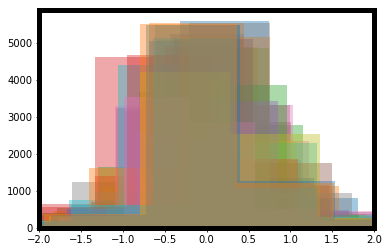

In [54]:
for a in range(32):
    plt = sns.distplot(encoded_dat[:, a], kde=False)
    ax = plt.axes
    ax.set_xlim(-2, 2)


In [55]:
autoencoder.save("aev4.h5py")

In [56]:
diagnoses.head()

P_ID  DX_TIME      DX_ID                                          DX_GROUP
0  2651    17112  121139420  OTHER PERSONAL HISTORY PRESENTING HAZARDS HEALTH
1  9894    12216   12127993       SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS
2  2281    21886   12015508       ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY
3  2281    21886   12015508       ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY
4  3442    25902   12015508       ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY

In [57]:
vitals.P_ID.nunique()

7433

In [58]:
labs.P_ID.nunique()

5532

In [59]:
labs.P_ID.append(vitals.P_ID).append(diagnoses.P_ID).nunique()

7905

In [60]:
pats = pd.read_csv('pats.tsv', delimiter='\t')

In [61]:
pats.sort_values('P_ID').tail()

P_ID  AGE  FEMALE
3285   9996   21       0
4861   9997   27       1
2684   9998   19       0
4546   9999   56       0
5710  10000   75       1

In [69]:
#df =df.reset_index([0])
df = df.merge(pats, right_on='P_ID', left_on='P_ID', how='left').drop(['level_0', 'index', 'AGE_x', 'FEMALE_x'], axis=1)

In [70]:
df.tail()

P_ID  enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  PULSE  WEIGHT  \
7900  9816       NaN          NaN           NaN          NaN    NaN     NaN   
7901  9845       NaN          NaN           NaN          NaN    NaN     NaN   
7902  9856       NaN          NaN           NaN          NaN    NaN     NaN   
7903  9892       NaN          NaN           NaN          NaN    NaN     NaN   
7904  9900       NaN          NaN           NaN          NaN    NaN     NaN   

      HEIGHT  BMI  ALT  ...  SYMPTOMS INVOLVING SKIN&OTH INTEGUMENTARY TISSUE  \
7900     NaN  NaN  NaN  ...                                               0.0   
7901     NaN  NaN  NaN  ...                                               0.0   
7902     NaN  NaN  NaN  ...                                               0.0   
7903     NaN  NaN  NaN  ...                                               0.0   
7904     NaN  NaN  NaN  ...                                               0.0   

      SYMPTOMS INVOLVING URINARY SYSTEM  \
7900                                0.0   
7901                                0.0   
7902                                0.0   
7903                                0.0   
7904                                0.0   

      SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  \
7900                                          0.0   
7901                                          0.0   
7902                                          0.0   
7903                                          0.0   
7904                                          0.0   

      TOXIC EFF OTH SBSTNC CHIEFLY NONMEDICINAL AS SRC  \
7900                                               0.0   
7901                                               0.0   
7902                                               0.0   
7903                                               0.0   
7904                                               0.0   

      UMBILICAL CORD COMPLICATIONS DURING L&D  URTICARIA  \
7900                                      0.0        0.0   
7901                                      0.0        0.0   
7902                                      0.0        0.0   
7903                                      0.0        0.0   
7904                                      0.0        0.0   

      VIRAL AND CHLAMYDIAL INFECTION IN CCE & UNS SITE  VISUAL DISTURBANCES  \
7900                                               0.0                  0.0   
7901                                               0.0                  0.0   
7902                                               0.0                  0.0   
7903                                               0.0                  0.0   
7904                                               0.0                  0.0   

      AGE_y  FEMALE_y  
7900     41         0  
7901     28         1  
7902     43         0  
7903     52         1  
7904     22         0  

[5 rows x 281 columns]

In [71]:
df['AGE'] = df['AGE_y']
df['FEMALE'] = df['FEMALE_y']

In [72]:
df = df.drop(['AGE_y', 'FEMALE_y'], axis=1)

In [73]:
df.tail()

P_ID  enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  PULSE  WEIGHT  \
7900  9816       NaN          NaN           NaN          NaN    NaN     NaN   
7901  9845       NaN          NaN           NaN          NaN    NaN     NaN   
7902  9856       NaN          NaN           NaN          NaN    NaN     NaN   
7903  9892       NaN          NaN           NaN          NaN    NaN     NaN   
7904  9900       NaN          NaN           NaN          NaN    NaN     NaN   

      HEIGHT  BMI  ALT  ...  SYMPTOMS INVOLVING SKIN&OTH INTEGUMENTARY TISSUE  \
7900     NaN  NaN  NaN  ...                                               0.0   
7901     NaN  NaN  NaN  ...                                               0.0   
7902     NaN  NaN  NaN  ...                                               0.0   
7903     NaN  NaN  NaN  ...                                               0.0   
7904     NaN  NaN  NaN  ...                                               0.0   

      SYMPTOMS INVOLVING URINARY SYSTEM  \
7900                                0.0   
7901                                0.0   
7902                                0.0   
7903                                0.0   
7904                                0.0   

      SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  \
7900                                          0.0   
7901                                          0.0   
7902                                          0.0   
7903                                          0.0   
7904                                          0.0   

      TOXIC EFF OTH SBSTNC CHIEFLY NONMEDICINAL AS SRC  \
7900                                               0.0   
7901                                               0.0   
7902                                               0.0   
7903                                               0.0   
7904                                               0.0   

      UMBILICAL CORD COMPLICATIONS DURING L&D  URTICARIA  \
7900                                      0.0        0.0   
7901                                      0.0        0.0   
7902                                      0.0        0.0   
7903                                      0.0        0.0   
7904                                      0.0        0.0   

      VIRAL AND CHLAMYDIAL INFECTION IN CCE & UNS SITE  VISUAL DISTURBANCES  \
7900                                               0.0                  0.0   
7901                                               0.0                  0.0   
7902                                               0.0                  0.0   
7903                                               0.0                  0.0   
7904                                               0.0                  0.0   

      AGE  FEMALE  
7900   41       0  
7901   28       1  
7902   43       0  
7903   52       1  
7904   22       0  

[5 rows x 281 columns]

In [74]:
df = df.drop(['enc_date'], axis=1)

In [75]:
vitals.head()
## continous variables
## discrete variables

P_ID  AGE  FEMALE  enc_date  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE  PULSE  \
0  8323   25       1      8949        128.0          69.0         98.0   67.0   
1  7532   22       0      8030        126.0          66.0         97.7   94.0   
2  7506   34       1     12332        109.0          66.0         97.0   65.0   
3  8323   25       1      8979        134.0          76.0         99.1   65.0   
4  6960   26       1      9558        111.0          72.0         98.6   88.0   

    WEIGHT  HEIGHT        BMI  
0  2758.40    62.0  31.528928  
1  2250.46    66.0  22.699630  
2  2289.26    60.0  27.940100  
3  2673.74    62.0  30.561252  
4  3238.12    71.0  28.223546

In [76]:
diabetes = df[df['DIABETES MELLITUS'] == 1]
others = df[df['DIABETES MELLITUS'] != 1]


In [77]:
diabetes.head()

P_ID  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE      PULSE       WEIGHT  \
11      14       129.65         75.05    97.977778  64.600000  2031.758846   
306    373       144.90         69.80    97.500000  75.900000  3069.644286   
511    635       114.06         68.22    97.358333  96.640000  2759.646327   
982   1277       138.00         70.00    97.966667  84.250000  3287.500000   
1544  2036       140.75         68.00    98.050000  84.636364  1499.876429   

         HEIGHT        BMI        ALT  ANION GAP (NA - (CL + CO2))  ...  \
11    64.646000  21.429486  17.000000                     9.333333  ...   
306   66.428571  30.570625        NaN                    10.000000  ...   
511   67.476426  26.643345  16.285714                    10.885714  ...   
982   69.000000  30.339116        NaN                    13.000000  ...   
1544  59.357143  18.727781  28.500000                    12.000000  ...   

      SYMPTOMS INVOLVING SKIN&OTH INTEGUMENTARY TISSUE  \
11                                                 0.0   
306                                                0.0   
511                                                0.0   
982                                                0.0   
1544                                               0.0   

      SYMPTOMS INVOLVING URINARY SYSTEM  \
11                                  0.0   
306                                 0.0   
511                                 0.0   
982                                 0.0   
1544                                0.0   

      SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  \
11                                            1.0   
306                                           1.0   
511                                           1.0   
982                                           0.0   
1544                                          1.0   

      TOXIC EFF OTH SBSTNC CHIEFLY NONMEDICINAL AS SRC  \
11                                                 0.0   
306                                                0.0   
511                                                0.0   
982                                                0.0   
1544                                               0.0   

      UMBILICAL CORD COMPLICATIONS DURING L&D  URTICARIA  \
11                                        0.0        0.0   
306                                       0.0        0.0   
511                                       0.0        0.0   
982                                       0.0        0.0   
1544                                      0.0        0.0   

      VIRAL AND CHLAMYDIAL INFECTION IN CCE & UNS SITE  VISUAL DISTURBANCES  \
11                                                 0.0                  0.0   
306                                                0.0                  0.0   
511                                                0.0                  0.0   
982                                                0.0                  0.0   
1544                                               0.0                  0.0   

      AGE  FEMALE  
11     85       1  
306    72       0  
511    61       0  
982    57       1  
1544   73       1  

[5 rows x 280 columns]

In [78]:
columns_cont = set(list(vitals.drop(['FEMALE', 'P_ID', 'enc_date'], axis=1).columns) + (list(labs[(labs.COMPONENT_NAME != "RACE") & (labs.COMPONENT_NAME != "COMMENT 01")].COMPONENT_NAME)))

columns_disc = set(list(diagnoses[diagnoses.DX_GROUP !='DIABETES MELLITUS'].DX_GROUP) + ['FEMALE'])

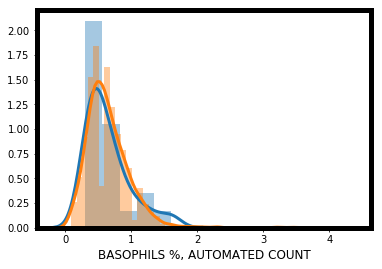

In [79]:
sns.distplot(diabetes[list(columns_cont)[0]].dropna())
sns.distplot(others[list(columns_cont)[0]].dropna())

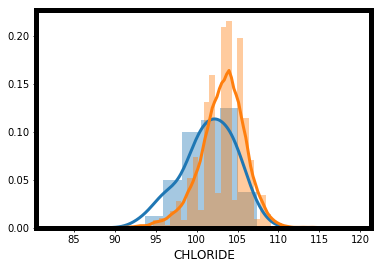

In [80]:
sns.distplot(diabetes[list(columns_cont)[10]].dropna())
sns.distplot(others[list(columns_cont)[10]].dropna())

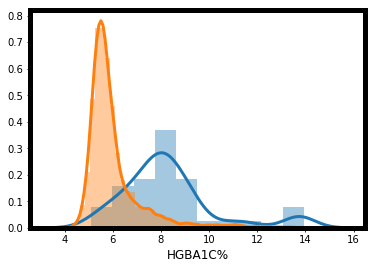

In [81]:
sns.distplot(diabetes[list(columns_cont)[20]].dropna())
sns.distplot(others[list(columns_cont)[20]].dropna())

# Use a Kolmogorov–Smirnov test to determine if distributions are the same (no assumption of normality)

In [82]:
from scipy.stats import ks_2samp

columns_cont = list(columns_cont)
columns_disc = list(columns_disc)

for col in columns_cont:
    p = ks_2samp(diabetes[col].dropna(), others[col].dropna())[1]
    if p <= 0.05:
        print(col)
        print("PVALUE: ", p, '\n')
    
    

HCT, AUTO
PVALUE:  0.011610862184908076 

AGE
PVALUE:  0.0005286548640236608 

CHOLESTEROL
PVALUE:  0.018275299794838152 

CHLORIDE
PVALUE:  0.01815893619257669 

SODIUM
PVALUE:  0.012743270771660629 

LDL
PVALUE:  0.01045839866662751 

BP_DIASTOLIC
PVALUE:  0.004301726470108533 

HGBA1C%
PVALUE:  8.81271516792007e-20 

GLUCOSE, RANDOM
PVALUE:  3.42919050336754e-07 

ESTIMATED AVERAGE GLUCOSE
PVALUE:  4.394483221589414e-05 

HGB
PVALUE:  0.023631072391325926 

HDL
PVALUE:  0.04134460425195114 

EOSINOPHILS %, AUTOMATED COUNT
PVALUE:  0.02861149309488007 

CHOLESTEROL, NON-HDL
PVALUE:  0.012730034328827593 

RBC, AUTO
PVALUE:  0.005175359015369295 



In [99]:
print(len(columns_cont))

53


In [83]:
dI['BP_SYSTOLIC'].dropna()

0       123.411765
1       143.400000
2       131.333333
3       145.600000
4       120.000000
5       137.400000
6       116.444444
7       140.428571
8       139.363636
9       126.000000
10      121.714286
12      144.454545
13      131.000000
14      140.000000
15      131.714286
16      139.000000
17      123.200000
18      122.666667
19      124.666667
20      124.000000
21      120.000000
22      147.500000
23      113.000000
24      132.000000
25      153.666667
26      142.375000
27      124.692308
28      140.761905
29      150.000000
30      134.083333
           ...    
7495    111.500000
7496    130.000000
7497    103.000000
7498    127.000000
7499    128.500000
7500    139.000000
7501    107.750000
7502    128.571429
7503    149.200000
7504    143.714286
7505    109.500000
7506    109.500000
7507    132.666667
7508    153.000000
7509    110.500000
7510    127.500000
7511    106.000000
7512    137.000000
7513    143.000000
7514    129.000000
7515    116.000000
7516    114.

In [86]:
from numpy import f2py

In [90]:

for col in columns_disc:
    p = abs(diabetes[col].dropna().sum()/len(diabetes[col].dropna()) - others[col].dropna().sum()/len(others[col].dropna()))
    if p > 0.04:
        print(col, p)

OTHER DIAGNOSES 0.3829858319082189
NEOPLASMS 0.06399990939669525
RESPIRATORY SYSTEM 0.12454556779958548
SKIN AND SUBCUTANEOUS TISSUE 0.11063229781306277
GENITOURINARY SYSTEM 0.16725370057872857
DIGESTIVE SYSTEM 0.25918207866631937
OTHER DISORDERS OF EYE 0.041133900359015596
ENCOUNTERS FOR ADMINISTRATIVE PURPOSES 0.18165962603485963
SPONDYLOSIS AND ALLIED DISORDERS 0.050500016988119636
MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE 0.119109369514253
NEED PROPH VACCINATION&INOCULAT AGAINST COMB DZ 0.0758123152541989
NERVOUS SYSTEM AND SENSE ORGANS 0.2115983555500187
INFECTIOUS AND PARASITIC DISEASES 0.12398495985141059
SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS 0.1770275320792326
EPISODIC MOOD DISORDERS 0.10149835215239475
ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY 0.4832327259136777
CIRCULATORY SYSTEM 0.33892997497083704
BLOOD AND BLOOD-FORMING ORGANS 0.11698585455904505
MENTAL DISORDERS 0.0951787716456958
NONSPECIFIC FINDINGS ON EXAMINATION OF BLOOD 0.09847446685617858
ENCOUNTER OTHER&

In [91]:
col = 'MENTAL DISORDERS'

diabetes[col].dropna().sum()/len(diabetes[col].dropna())

0.30434782608695654

In [92]:
others[col].dropna().sum()/len(others[col].dropna())

0.20916905444126074

In [96]:
diabetes

P_ID  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE       PULSE       WEIGHT  \
11      14   129.650000     75.050000    97.977778   64.600000  2031.758846   
306    373   144.900000     69.800000    97.500000   75.900000  3069.644286   
511    635   114.060000     68.220000    97.358333   96.640000  2759.646327   
982   1277   138.000000     70.000000    97.966667   84.250000  3287.500000   
1544  2036   140.750000     68.000000    98.050000   84.636364  1499.876429   
1774  2314   137.000000     56.500000    98.475000   94.000000  1767.205000   
1844  2408   133.000000     78.800000    97.925000  101.400000  3768.627500   
2191  2853   139.000000     77.000000    98.025000   86.000000  2474.265000   
2533  3352   126.357143     57.928571    97.116667   70.857143  2662.358889   
2712  3566   146.000000     71.400000    98.280000   80.800000  3801.788000   
3129  4119   138.666667     79.666667    97.500000   80.833333  2496.261667   
3229  4247   122.000000     63.000000    98.100000   92.500000  2366.860000   
3700  4873   135.600000     75.333333    97.792308   75.466667  2916.597500   
3861  5074   123.500000     84.000000    98.350000   98.000000  2587.320000   
3955  5197   107.000000     70.000000    97.400000   58.666667  1625.723333   
4399  5770   128.500000     67.500000    98.266667   67.750000  3244.460000   
4503  5920   119.000000     68.000000    98.300000   77.000000  3342.175000   
4619  6106   134.200000     59.600000    98.130000   66.000000  2261.389000   
4698  6203   118.208333     59.875000    98.015789   73.666667  2726.966429   
4774  6287   131.666667     57.166667    98.100000   63.666667  2884.144286   
4993  6564   135.000000     84.000000    98.500000   89.000000  2321.000000   
5073  6667   132.272727     60.545455    97.966667   73.363636  2918.094545   
5371  7072   130.227273     57.454545    97.093478   75.068182  2998.681667   
5445  7179   135.000000     59.333333    97.950000   71.333333  2458.900000   
5532  7302   134.666667     66.000000    98.450000   73.333333  3042.953333   
5590  7378   121.568182     79.204545    98.070588   84.953488  3245.500652   
5597  7386   106.812500     64.500000    97.842857   86.200000  1961.158000   
5735  7570   113.000000     66.000000    98.200000   65.000000  2216.000000   
5783  7637   121.900000     62.150000    98.230000   85.650000  3456.839773   
6117  8076   123.142857     68.285714    98.037500   75.571429  3833.442222   
6124  8085   115.200000     71.000000    98.100000   75.800000  2124.600000   
6396  8498   144.375000     71.250000    97.712500   74.500000  3199.320000   
6452  8559   125.428571     66.000000    97.900000   78.142857  2741.301538   
6453  8560   114.000000     68.333333          NaN   82.000000  3321.600000   
6497  8615   133.769231     67.538462    97.333333   73.416667  3686.350000   
6799  8998   154.000000     71.600000    98.400000   75.600000  2570.270000   
6904  9154   140.400000     93.400000    97.885714   70.800000  2240.225455   
6977  9244   121.750000     67.250000          NaN   95.000000  2331.582500   
7146  9472   121.865385     67.846154    98.142000   79.250000  1497.577857   
7176  9510   118.000000     72.000000    98.066667   63.666667  2719.593333   
7295  9672   116.000000     70.750000    96.600000   79.000000  2508.832500   
7345  9742   117.333333     63.833333    97.700000   58.833333  3582.432222   
7346  9743   139.500000     85.750000    97.900000   93.250000  3347.466000   
7556  1015          NaN           NaN          NaN         NaN          NaN   
7617  2563          NaN           NaN          NaN         NaN          NaN   
7812  7621          NaN           NaN          NaN         NaN          NaN   

         HEIGHT        BMI        ALT  ANION GAP (NA - (CL + CO2))  ...  \
11    64.646000  21.429486  17.000000                     9.333333  ...   
306   66.428571  30.570625        NaN                    10.000000  ...   
511   67.476426  26.643345  16.285714                    10.885714 

In [98]:
import numpy
import poisson_etest

ImportError: DLL load failed: The specified module could not be found.

In [105]:
df[df['HGBA1C%'] > 6.5]

P_ID  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE       PULSE       WEIGHT  \
11       14   129.650000     75.050000    97.977778   64.600000  2031.758846   
12       15   144.454545     74.909091    97.525000   82.454545  3204.609091   
14       17   140.000000     68.333333    97.850000   86.750000  3154.342500   
19       22   124.666667     66.500000    97.162500   86.714286  3515.369286   
27       31   124.692308     66.384615    97.738462   70.153846  3802.332500   
28       33   140.761905     62.476190    97.965000   82.238095  2757.086316   
31       36   118.333333     67.333333    98.400000   78.000000  2151.691429   
40       48   137.333333     64.500000    97.040000   65.857143  4302.840000   
42       50   134.000000     80.250000    97.575000   81.800000  2920.223846   
50       60   124.750000     68.750000    98.033333   75.750000  4824.547500   
51       61   144.250000     69.125000    97.871429   60.875000  2991.672857   
53       64   137.777778     64.444444    98.322222   71.000000  3401.641111   
63       79   133.000000     69.750000    97.560000   72.500000  3378.758000   
64       80   139.272727     80.000000    97.911111   86.363636  3267.600000   
66       83          NaN           NaN          NaN         NaN          NaN   
74       92   128.833333     79.333333    97.583333   82.666667  2533.240000   
81      100   130.250000     69.500000    98.475000   83.000000  3946.100000   
94      115   123.818182     62.363636    97.558333   84.090909  3551.155385   
97      118   122.240000     62.720000    97.616667   86.461538  2439.196923   
125     148   122.000000     78.500000    97.300000   91.750000  3864.222500   
133     158   123.666667     74.666667    98.600000   78.000000  2664.925000   
144     170   136.750000     73.875000    97.290909   78.666667  3341.908571   
145     171   138.000000     69.750000    97.200000   59.500000  2744.042500   
147     173   134.000000     76.750000    98.100000   76.000000  3324.540000   
148     174   133.192308     53.269231    98.325000   61.461538  3548.367600   
155     181   117.000000     72.000000    97.300000   81.500000  3082.915000   
159     187   127.125000     73.000000    98.100000   72.875000  2490.561111   
160     188   133.500000     73.666667    97.966667   78.666667  3341.121667   
165     194          NaN           NaN          NaN         NaN          NaN   
170     200   126.000000     82.571429    97.625000   75.461538  3325.979091   
...     ...          ...           ...          ...         ...          ...   
7215   9558   142.666667     91.666667    97.785714   83.444444  4068.614444   
7224   9575   124.190476     72.380952    98.033333   86.666667  4198.810000   
7233   9584   124.388889     81.388889    97.800000   86.588235  3120.861176   
7268   9630   141.222222     84.777778    97.657143   78.666667  2655.355000   
7269   9632          NaN           NaN          NaN         NaN          NaN   
7272   9636   119.454545     62.909091    98.290000   72.636364  3408.667143   
7296   9673   138.000000     74.000000    97.800000   52.000000  2448.000000   
7302   9681   137.250000     60.000000    98.450000   58.000000  1706.391667   
7320   9705   122.350000     58.650000    97.918750   67.300000  3026.269000   
7322   9707   162.000000     81.000000    98.200000   55.000000  3950.640000   
7336   9727   142.000000     65.750000    97.950000   88.750000  2515.010000   
7340   9733   130.500000     82.000000    98.700000   88.000000  3082.910000   
7341   9735   159.333333     77.666667    97.766667   92.666667  3234.587500   
7345   9742   117.333333     63.833333    97.700000   58.833333  3582.432222   
7346   9743   139.500000     85.750000    97.900000   93.250000  3347.466000   
7359   9760   122.500000     72.000000    99.000000   88.500000  2380.965000   
7360   9761   124.500000     70.000000    97.550000   83.500000  2953.490000   
7365   9767   116.600000     65.800000    97.540000   84.400000  4222.051818   
7369   

In [107]:
diagnoses.P_ID.nunique()

7724

In [108]:
vitals.P_ID.nunique()

7433

In [111]:
df.isnull().sum()/df.shape[0]

P_ID                                                0.000000
BP_SYSTOLIC                                         0.067552
BP_DIASTOLIC                                        0.067552
TEMPERATURE                                         0.096395
PULSE                                               0.069450
WEIGHT                                              0.078558
HEIGHT                                              0.088805
BMI                                                 0.095256
ALT                                                 0.643390
ANION GAP (NA - (CL + CO2))                         0.551929
AST                                                 0.859836
BASOPHILS %, AUTOMATED COUNT                        0.749146
BASOPHILS, AUTOMATED COUNT                          0.749146
BUN                                                 0.801645
CHLORIDE                                            0.551929
CHOLESTEROL                                         0.568880
CHOLESTEROL, NON-HDL    

In [110]:
df.head()

P_ID  BP_SYSTOLIC  BP_DIASTOLIC  TEMPERATURE      PULSE       WEIGHT  \
0     1   123.411765     65.470588        97.89  75.421053  2975.609333   
1     2   143.400000     65.600000        98.22  85.400000  2715.430000   
2     3   131.333333     67.000000        98.20  82.666667  3460.340000   
3     4   145.600000     81.600000        98.15  80.600000  3157.828000   
4     6   120.000000     70.000000        97.45  73.000000  4003.550000   

      HEIGHT        BMI   ALT  ANION GAP (NA - (CL + CO2))  ...  \
0  62.466667  33.511791   NaN                       11.000  ...   
1  68.000000  25.802164   NaN                        9.375  ...   
2  68.000000  32.880339   NaN                       11.000  ...   
3  68.384800  29.685919  13.0                       11.000  ...   
4  67.500000  38.607622   NaN                          NaN  ...   

   SYMPTOMS INVOLVING SKIN&OTH INTEGUMENTARY TISSUE  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   SYMPTOMS INVOLVING URINARY SYSTEM  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   

   SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   TOXIC EFF OTH SBSTNC CHIEFLY NONMEDICINAL AS SRC  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   UMBILICAL CORD COMPLICATIONS DURING L&D  URTICARIA  \
0                                      0.0        0.0   
1                                      0.0        0.0   
2                                      0.0        0.0   
3                                      0.0        0.0   
4                                      0.0        0.0   

   VIRAL AND CHLAMYDIAL INFECTION IN CCE & UNS SITE  VISUAL DISTURBANCES  AGE  \
0                                               1.0                  0.0   78   
1                                               0.0                  0.0   88   
2                                               0.0                  0.0   67   
3                                               0.0                  0.0   61   
4                                               0.0                  0.0   60   

   FEMALE  
0       1  
1       0  
2       1  
3       0  
4       1  

[5 rows x 280 columns]

In [112]:
#skip gram for diagnoses
#emdeddings size vocab size, embeddings

In [115]:
diagnoses.sort_values(['P_ID', 'DX_TIME'])

P_ID  DX_TIME      DX_ID  \
13023       1    28211   12014720   
103950      1    28228   12015529   
78335       1    28253   12124569   
79447       1    28253   12020756   
79448       1    28253   12124478   
132192      1    28268   12018836   
31215       1    28287   12018835   
74486       1    28287   12020846   
105765      1    28287   12015529   
34951       1    28289   12151699   
52327       1    28289   12018250   
57903       1    28289   12152787   
55528       1    28295   12015529   
105407      1    28331   12015508   
105408      1    28331   12015508   
130815      1    28333   12124478   
88766       1    28353   12019630   
148128      1    28357   12018836   
87584       1    28364   12134168   
105675      1    28364   12019633   
130437      1    28364   12015529   
139819      1    28364   12135675   
139820      1    28364   12124478   
141594      1    28364   12018836   
39963       1    28387   12155797   
39964       1    28387   12019630   
18041       1    28398   12128709   
18042       1    28398   12018835   
36673       1    28398   12018836   
27320       1    28402   12124478   
...       ...      ...        ...   
95265    9986    19381   12020542   
100344   9986    19381   12013950   
100615   9986    19381   12020610   
100616   9986    19381   12020610   
126955   9986    19381   12124478   
126956   9986    19381   12018907   
18386    9986    19382   12015508   
18387    9986    19382   12015508   
18388    9986    19382   12015508   
18389    9986    19382   12015508   
128244   9986    19382   12015508   
9030     9986    19423   12124478   
35021    9986    19423   12020610   
51448    9986    19433   12124397   
11464    9987    17554  121210410   
15776    9987    17554   12144991   
17997    9987    17554   12142496   
22660    9987    17554   12135136   
7605     9987    17624   12015440   
7606     9987    17624   12015440   
7616     9987    17639   12015440   
72923    9996     7722    1202988   
85512    9996     7722   12020953   
139624   9996     7722   12144991   
65876   10000    27599   12017069   
86200   10000    27599   12016218   
107849  10000    27599   12020951   
107866  10000    27599   12020610   
120337  10000    27599   12013950   
135670  10000    27599   12141461   

                                               DX_GROUP  
13023      MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE  
103950                               CIRCULATORY SYSTEM  
78335                              GENITOURINARY SYSTEM  
79447                                CIRCULATORY SYSTEM  
79448       ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY  
132192      SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
31215       SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
74486                              GENITOURINARY SYSTEM  
105765                               CIRCULATORY SYSTEM  
34951                   NERVOUS SYSTEM AND SENSE ORGANS  
52327                   NERVOUS SYSTEM AND SENSE ORGANS  
57903                   NERVOUS SYSTEM AND SENSE ORGANS  
55528                                CIRCULATORY SYSTEM  
105407      ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY  
105408      ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY  
130815      ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY  
88766                                RESPIRATORY SYSTEM  
148128      SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
87584                                   OTHER DIAGNOSES  
105675                               RESPIRATORY SYSTEM  
130437                               CIRCULATORY SYSTEM  
139819      ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY  
139820      ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY  
141594      SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
39963                                RESPIRATORY SYSTEM  
39964                                RESPIRATORY SYSTEM  
18041       SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
18042       SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS  
36673       SYMPTOMS, SIGNS, AND

In [119]:
list(diagnoses.DX_GROUP.unique())

['OTHER PERSONAL HISTORY PRESENTING HAZARDS HEALTH',
 'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS',
 'ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY',
 'ENCOUNTER OF ANTENATAL SCREENING OF MOTHER',
 'RESPIRATORY SYSTEM',
 'MENTAL DISORDERS',
 'CIRCULATORY SYSTEM',
 'BLOOD AND BLOOD-FORMING ORGANS',
 'ENCOUNTER OTHER&UNSPECIFIED PROCEDURE&AFTERCARE',
 'ENCOUNTERS FOR ADMINISTRATIVE PURPOSES',
 'GENITOURINARY SYSTEM',
 'NONSPECIFIC FINDINGS ON EXAMINATION OF BLOOD',
 'ACQUIRED ABSENCE OF OTHER ORGANS AND TISSUE',
 'NEED PROPH VACCINATION&INOCULAT AGAINST COMB DZ',
 'MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
 'SYMPTOMS CONCERNING NUTRITION METABOLISM&DVLP',
 'OTHER POSTPROCEDURAL STATUS',
 'NEOPLASMS',
 'OTHER DIAGNOSES',
 'ANXIETY DISSOCIATIVE AND SOMATOFORM DISORDERS',
 'PAIN NOT ELSEWHERE CLASSIFIED',
 'NERVOUS SYSTEM AND SENSE ORGANS',
 'PHYSIOLOGICAL MALFUNCTION ARISE FROM MENTAL FCT',
 'INFECTIOUS AND PARASITIC DISEASES',
 'SKIN AND SUBCUTANEOUS TISSUE',
 'NEED ISOLATION & OTH PR

In [126]:
y_new.sum(axis=1).mean()

5.407301916105645

In [127]:
diagnoses.head()

P_ID  DX_TIME      DX_ID                                          DX_GROUP
0  2651    17112  121139420  OTHER PERSONAL HISTORY PRESENTING HAZARDS HEALTH
1  9894    12216   12127993       SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS
2  2281    21886   12015508       ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY
3  2281    21886   12015508       ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY
4  3442    25902   12015508       ENDOCRINE, NUTRITIONAL, METABOLIC, IMMUNITY